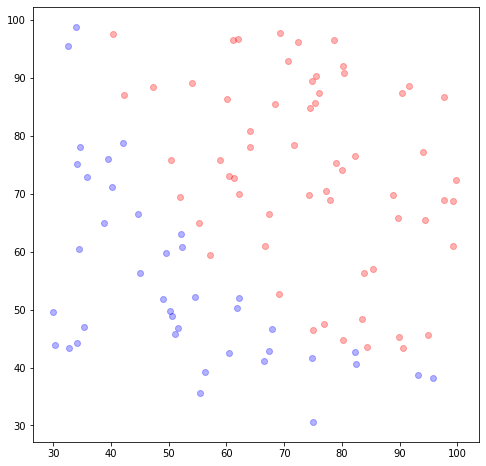

[34.62365962 30.28671077 35.84740877 45.08327748 95.86155507 75.01365839
 39.53833914 67.94685548 67.37202755 50.53478829 34.21206098 93.1143888
 61.83020602 38.7858038  52.10797973 40.23689374 54.63510555 33.91550011
 74.78925296 34.18364003 51.54772027 82.36875376 51.04775177 62.22267576
 34.52451385 50.28649612 49.58667722 32.57720017 35.28611282 56.2538175
 30.05882245 44.66826172 66.56089447 49.07256322 32.72283304 60.45555629
 82.22666158 42.07545454 52.34800399 55.48216114]
[78.02469282 43.89499752 72.90219803 56.31637178 38.22527806 30.60326323
 76.03681085 46.67857411 42.83843832 48.85581153 44.2095286  38.80067034
 50.25610789 64.99568096 63.12762377 71.16774802 52.21388588 98.86943574
 41.57341523 75.23772034 46.85629026 40.61825516 45.82270146 52.06099195
 60.39634246 49.80453881 59.80895099 95.59854761 47.02051395 39.26147251
 49.59297387 66.45008615 41.09209808 51.88321182 43.30717306 42.50840944
 42.71987854 78.844786   60.76950526 35.57070347]


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

x_label0 = np.array(x_label0)
x_label1 = np.array(x_label1)
y_label0 = np.array(y_label0)
y_label1 = np.array(y_label1)

print(x_label0)
print(y_label0)


In [201]:
def sigma_z(theta0, theta1, theta2, x, y):
    tmp1 = theta1*x
    tmp2 = theta2*y
    tmp3 = tmp1+tmp2
    z = theta0 + tmp3
    t = (-1.0)*z
    return 1.0/(1.0+np.exp(t))

def objective(i, sigma_z):
    if(i == 0):
        tmp = 1-sigma_z
        result = np.log(tmp)
        tmp2 = np.sum(result)
        return (-1*tmp2)
    elif(i == 1):
        result = np.log(sigma_z)
        tmp = np.sum(result)
        return (-1*tmp)

def gradient0(sigma_z, i):
    return  np.sum(sigma_z - i)

def gradient1(sigma_z, i, step, x):
    tmp = sigma_z - i
    return  -1*step*np.sum(tmp*x)


    

In [202]:
theta0 = 0.0
theta1 = 0.0
theta2 = 0.0

threshold = 0.629

m0 = x_label0.size
m1 = x_label1.size

step = 0.000001

enough = False
i0 = 0
i1 = 1

theta0_iter = []
theta1_iter = []
theta2_iter = []
count_iter = []
loss_count = []
count = 0
loss_counted = 0 
loss_iter = []

#print(sigma_z(theta0, theta1, theta2, x_label0, y_label0))

while(enough == False):
    sigma0 = sigma_z(theta0, theta1, theta2, x_label0, y_label0)
    #print(sigma0)
    sigma1 = sigma_z(theta0, theta1, theta2, x_label1, y_label1)
    tmp0 = objective(i0, sigma0)
    tmp1 = objective(i1, sigma1)
    loss= (tmp0+tmp1)/(m0+m1)
    loss_counted = loss_counted + 1
    loss_count.append(loss_counted)
    loss_iter.append(loss)
    print(loss)
    if(loss > threshold):
        
        tmp0 = gradient0(sigma0, 0)
        tmp1 = gradient0(sigma1, 1)
        # theta1
        tmp2 = gradient1(sigma0, 0, step,  x_label0)
        tmp3 = gradient1(sigma1, 1, step,  x_label1)
        # theta2
        tmp4 = gradient1(sigma0, 0, step,  y_label0)
        tmp5 = gradient1(sigma1, 1, step,  y_label1)
        
        the0 = theta0 - (((tmp0 + tmp1)/(m0+m1))*step)
        theta0 = the0
        the1 = theta1 + ((tmp2 + tmp3)/(m0+m1))
        theta1 = the1
        the2 = theta2 + ((tmp4 + tmp5)/(m0+m1))
        theta2 = the2
        
        theta0_iter.append(theta0)
        theta1_iter.append(theta1)
        theta2_iter.append(theta2)
        count = count+1
        count_iter.append(count)
        #print(theta0, theta1, theta2)
    elif(loss < threshold):
        enough = True


0.6931471805599453
0.6928764038075431
0.6926068488681048
0.6923385102202048
0.6920713823656939
0.6918054598296292
0.6915407371602016
0.691277208928666
0.6910148697292684
0.6907537141791755
0.690493736918402
0.6902349326097401
0.6899772959386865
0.6897208216133706
0.6894655043644824
0.6892113389452011
0.6889583201311217
0.6887064427201834
0.6884557015325963
0.6882060914107702
0.6879576072192404
0.6877102438445968
0.6874639961954098
0.687218859202158
0.6869748278171552
0.6867318970144782
0.6864900617898937
0.6862493171607841
0.6860096581660762
0.6857710798661674
0.685533577342853
0.6852971456992525
0.6850617800597373
0.6848274755698575
0.6845942273962681
0.6843620307266566
0.6841308807696703
0.6839007727548421
0.6836717019325181
0.6834436635737845
0.6832166529703944
0.6829906654346951
0.6827656962995544
0.6825417409182886
0.6823187946645887
0.6820968529324475
0.6818759111360875
0.6816559647098873
0.6814370091083091
0.6812190398058254
0.6810020522968481
0.6807860420956525
0.68057100473630

0.6350500338546154
0.6350357804705696
0.6350215850406695
0.635007447318451
0.6349933670585339
0.6349793440166169
0.6349653779494727
0.6349514686149428
0.634937615771933
0.634923819180409
0.6349100786013898
0.6348963937969454
0.6348827645301895
0.634869190565277
0.6348556716673971
0.6348422076027702
0.6348287981386427
0.634815443043282
0.6348021420859723
0.6347888950370095
0.6347757016676973
0.6347625617503412
0.6347494750582462
0.63473644136571
0.6347234604480196
0.6347105320814468
0.6346976560432434
0.6346848321116364
0.6346720600658251
0.6346593396859745
0.6346466707532127
0.6346340530496255
0.6346214863582524
0.6346089704630822
0.6345965051490488
0.6345840902020266
0.6345717254088269
0.6345594105571926
0.6345471454357949
0.6345349298342288
0.6345227635430085
0.6345106463535638
0.6344985780582357
0.6344865584502721
0.6344745873238242
0.6344626644739417
0.6344507896965691
0.6344389627885418
0.6344271835475817
0.6344154517722937
0.6344037672621611
0.6343921298175417
0.6343805392396643


0.6315667650406674
0.631565876729843
0.6315649909407867
0.6315641076636003
0.6315632268884251
0.6315623486054425
0.6315614728048727
0.6315605994769763
0.6315597286120521
0.6315588602004386
0.6315579942325129
0.631557130698691
0.6315562695894272
0.6315554108952145
0.6315545546065838
0.6315537007141049
0.6315528492083844
0.6315520000800674
0.6315511533198367
0.631550308918412
0.6315494668665511
0.6315486271550484
0.6315477897747354
0.6315469547164807
0.6315461219711895
0.6315452915298034
0.631544463383301
0.631543637522696
0.6315428139390398
0.6315419926234181
0.6315411735669543
0.6315403567608058
0.6315395421961664
0.631538729864265
0.6315379197563658
0.6315371118637685
0.6315363061778072
0.631535502689851
0.631534701391304
0.6315339022736041
0.6315331053282247
0.6315323105466721
0.631531517920488
0.6315307274412474
0.6315299391005589
0.6315291528900656
0.6315283688014434
0.6315275868264022
0.6315268069566848
0.6315260291840675
0.631525253500359
0.6315244798974018
0.6315237083670701
0.6

0.6312490565597808
0.631248778973421
0.631248501590351
0.6312482244099124
0.6312479474314496
0.6312476706543103
0.6312473940778435
0.6312471177014015
0.631246841524339
0.6312465655460133
0.6312462897657842
0.6312460141830136
0.6312457387970665
0.6312454636073097
0.6312451886131132
0.631244913813849
0.6312446392088915
0.631244364797618
0.6312440905794077
0.6312438165536424
0.6312435427197065
0.6312432690769866
0.6312429956248715
0.6312427223627531
0.6312424492900248
0.6312421764060832
0.6312419037103263
0.6312416312021552
0.6312413588809731
0.6312410867461855
0.6312408147972003
0.6312405430334276
0.6312402714542799
0.6312400000591718
0.6312397288475204
0.6312394578187451
0.6312391869722673
0.6312389163075107
0.6312386458239017
0.6312383755208684
0.6312381053978412
0.631237835454253
0.6312375656895387
0.6312372961031354
0.6312370266944825
0.6312367574630212
0.6312364884081958
0.6312362195294517
0.6312359508262372
0.6312356822980022
0.6312354139441991
0.6312351457642823
0.6312348777577087

0.6310826269765981
0.6310824137663641
0.6310822005999314
0.6310819874772535
0.6310817743982838
0.6310815613629763
0.6310813483712845
0.631081135423162
0.6310809225185637
0.6310807096574433
0.6310804968397555
0.6310802840654549
0.6310800713344961
0.6310798586468341
0.6310796460024242
0.6310794334012212
0.6310792208431809
0.6310790083282585
0.6310787958564099
0.6310785834275908
0.6310783710417575
0.6310781586988656
0.6310779463988719
0.631077734141733
0.6310775219274047
0.6310773097558446
0.6310770976270091
0.6310768855408555
0.6310766734973408
0.6310764614964224
0.6310762495380581
0.6310760376222051
0.6310758257488213
0.6310756139178647
0.6310754021292935
0.6310751903830658
0.6310749786791398
0.6310747670174742
0.6310745553980276
0.6310743438207589
0.6310741322856268
0.6310739207925906
0.6310737093416092
0.6310734979326424
0.6310732865656493
0.6310730752405896
0.6310728639574233
0.6310726527161101
0.63107244151661
0.6310722303588835
0.6310720192428905
0.6310718081685915
0.63107159713594

0.6309424589699492
0.6309422702882557
0.6309420816369254
0.6309418930159513
0.6309417044253254
0.6309415158650405
0.6309413273350895
0.6309411388354643
0.6309409503661579
0.6309407619271632
0.6309405735184722
0.630940385140078
0.630940196791973
0.6309400084741499
0.6309398201866013
0.6309396319293199
0.6309394437022985
0.6309392555055297
0.6309390673390061
0.6309388792027206
0.6309386910966659
0.6309385030208345
0.6309383149752195
0.6309381269598134
0.630937938974609
0.630937751019599
0.6309375630947764
0.6309373752001339
0.6309371873356643
0.6309369995013604
0.630936811697215
0.6309366239232211
0.6309364361793713
0.6309362484656587
0.6309360607820759
0.6309358731286159
0.6309356855052717
0.630935497912036
0.6309353103489019
0.6309351228158622
0.6309349353129098
0.6309347478400377
0.6309345603972387
0.630934372984506
0.6309341856018326
0.630933998249211
0.6309338109266348
0.6309336236340964
0.6309334363715894
0.6309332491391062
0.6309330619366404
0.6309328747641847
0.6309326876217323
0

0.6307799594132869
0.6307797964290232
0.6307796334703286
0.6307794705371993
0.630779307629631
0.6307791447476192
0.63077898189116
0.6307788190602492
0.6307786562548825
0.6307784934750557
0.6307783307207645
0.630778167992005
0.6307780052887726
0.6307778426110636
0.6307776799588732
0.6307775173321979
0.6307773547310327
0.6307771921553741
0.6307770296052176
0.630776867080559
0.6307767045813942
0.6307765421077189
0.630776379659529
0.6307762172368204
0.6307760548395888
0.6307758924678298
0.6307757301215395
0.6307755678007138
0.6307754055053482
0.6307752432354387
0.630775080990981
0.630774918771971
0.6307747565784048
0.6307745944102777
0.6307744322675858
0.630774270150325
0.6307741080584909
0.6307739459920795
0.6307737839510864
0.6307736219355076
0.6307734599453392
0.6307732979805764
0.6307731360412155
0.6307729741272523
0.6307728122386824
0.6307726503755018
0.6307724885377063
0.6307723267252916
0.6307721649382537
0.6307720031765885
0.6307718414402916
0.6307716797293591
0.6307715180437866
0.

0.6306480992351853
0.6306479568807543
0.6306478145485355
0.6306476722385248
0.6306475299507192
0.6306473876851149
0.630647245441708
0.6306471032204953
0.6306469610214731
0.6306468188446378
0.6306466766899858
0.6306465345575134
0.630646392447217
0.6306462503590933
0.6306461082931384
0.6306459662493488
0.6306458242277209
0.6306456822282511
0.630645540250936
0.6306453982957716
0.6306452563627548
0.6306451144518815
0.6306449725631486
0.6306448306965522
0.6306446888520888
0.6306445470297549
0.6306444052295468
0.630644263451461
0.6306441216954937
0.6306439799616416
0.630643838249901
0.6306436965602682
0.6306435548927399
0.6306434132473123
0.6306432716239818
0.6306431300227451
0.6306429884435982
0.6306428468865378
0.6306427053515603
0.6306425638386619
0.6306424223478394
0.630642280879089
0.630642139432407
0.6306419980077901
0.6306418566052345
0.6306417152247369
0.6306415738662934
0.6306414325299005
0.6306412912155548
0.6306411499232527
0.6306410086529903
0.6306408674047645
0.6306407261785715


0.6305533032478364
0.6305531756533458
0.6305530480786764
0.6305529205238254
0.6305527929887894
0.6305526654735653
0.6305525379781496
0.6305524105025395
0.6305522830467316
0.6305521556107228
0.6305520281945097
0.6305519007980891
0.630551773421458
0.630551646064613
0.630551518727551
0.6305513914102688
0.6305512641127631
0.6305511368350308
0.6305510095770687
0.6305508823388736
0.6305507551204422
0.6305506279217714
0.630550500742858
0.6305503735836987
0.6305502464442904
0.6305501193246298
0.6305499922247138
0.6305498651445393
0.6305497380841029
0.6305496110434013
0.6305494840224317
0.6305493570211906
0.630549230039675
0.6305491030778815
0.6305489761358071
0.6305488492134483
0.6305487223108024
0.6305485954278659
0.6305484685646355
0.6305483417211082
0.6305482148972809
0.6305480880931499
0.6305479613087127
0.6305478345439657
0.6305477077989059
0.6305475810735299
0.6305474543678344
0.630547327681817
0.6305472010154735
0.6305470743688013
0.6305469477417971
0.6305468211344578
0.63054669454678
0

0.6304277034772258
0.6304275953243341
0.6304274871881161
0.6304273790685696
0.6304272709656915
0.6304271628794792
0.6304270548099301
0.6304269467570414
0.6304268387208104
0.6304267307012347
0.6304266226983111
0.6304265147120373
0.6304264067424105
0.6304262987894278
0.6304261908530867
0.6304260829333846
0.6304259750303186
0.6304258671438862
0.6304257592740844
0.6304256514209108
0.6304255435843628
0.6304254357644372
0.6304253279611319
0.630425220174444
0.6304251124043705
0.6304250046509092
0.630424896914057
0.6304247891938115
0.63042468149017
0.6304245738031296
0.6304244661326877
0.6304243584788416
0.6304242508415886
0.6304241432209263
0.6304240356168517
0.6304239280293621
0.630423820458455
0.6304237129041276
0.6304236053663772
0.6304234978452012
0.6304233903405969
0.6304232828525618
0.6304231753810927
0.6304230679261874
0.630422960487843
0.6304228530660569
0.6304227456608263
0.6304226382721487
0.6304225309000215
0.6304224235444416
0.6304223162054068
0.630422208882914
0.6304221015769607


0.630322091756889
0.6303219998184981
0.6303219078941569
0.6303218159838633
0.630321724087615
0.6303216322054097
0.6303215403372452
0.6303214484831191
0.6303213566430292
0.6303212648169734
0.6303211730049492
0.6303210812069543
0.6303209894229866
0.6303208976530438
0.6303208058971235
0.6303207141552235
0.6303206224273417
0.6303205307134756
0.6303204390136229
0.6303203473277815
0.6303202556559494
0.6303201639981235
0.6303200723543023
0.6303199807244834
0.6303198891086643
0.6303197975068429
0.6303197059190169
0.6303196143451838
0.6303195227853418
0.6303194312394882
0.6303193397076211
0.6303192481897381
0.6303191566858367
0.630319065195915
0.6303189737199704
0.630318882258001
0.6303187908100043
0.6303186993759782
0.6303186079559202
0.6303185165498283
0.6303184251577
0.6303183337795332
0.6303182424153256
0.6303181510650749
0.6303180597287789
0.6303179684064355
0.6303178770980421
0.6303177858035965
0.6303176945230967
0.6303176032565403
0.630317512003925
0.6303174207652487
0.6303173295405089
0

0.6302331098326082
0.6302330314270449
0.6302329530333423
0.6302328746514985
0.6302327962815116
0.6302327179233795
0.6302326395771004
0.6302325612426725
0.6302324829200937
0.630232404609362
0.6302323263104759
0.630232248023433
0.6302321697482318
0.63023209148487
0.630232013233346
0.6302319349936578
0.6302318567658035
0.630231778549781
0.6302317003455885
0.6302316221532241
0.630231543972686
0.630231465803972
0.6302313876470805
0.6302313095020096
0.6302312313687571
0.6302311532473212
0.6302310751376999
0.6302309970398916
0.6302309189538943
0.6302308408797057
0.6302307628173243
0.6302306847667483
0.6302306067279753
0.6302305287010036
0.6302304506858315
0.6302303726824569
0.6302302946908778
0.6302302167110926
0.6302301387430993
0.6302300607868957
0.63022998284248
0.6302299049098506
0.6302298269890053
0.6302297490799424
0.6302296711826598
0.6302295932971558
0.6302295154234281
0.6302294375614751
0.630229359711295
0.6302292818728857
0.6302292040462453
0.6302291262313721
0.6302290484282639
0.63

0.6301654102873517
0.6301653420725731
0.6301652738680075
0.6301652056736532
0.6301651374895083
0.6301650693155714
0.6301650011518406
0.6301649329983143
0.6301648648549913
0.6301647967218696
0.6301647285989473
0.6301646604862232
0.6301645923836953
0.6301645242913623
0.6301644562092221
0.6301643881372735
0.6301643200755147
0.6301642520239438
0.6301641839825596
0.6301641159513601
0.6301640479303439
0.630163979919509
0.6301639119188542
0.6301638439283775
0.6301637759480775
0.6301637079779523
0.6301636400180005
0.6301635720682205
0.6301635041286103
0.6301634361991687
0.6301633682798936
0.6301633003707836
0.6301632324718371
0.6301631645830524
0.6301630967044279
0.6301630288359619
0.6301629609776528
0.6301628931294989
0.6301628252914984
0.63016275746365
0.630162689645952
0.6301626218384025
0.6301625540410001
0.630162486253743
0.6301624184766298
0.6301623507096586
0.6301622829528278
0.630162215206136
0.6301621474695812
0.6301620797431621
0.6301620120268768
0.6301619443207238
0.6301618766247015

0.6301156048032506
0.6301155440102779
0.6301154832263187
0.6301154224513712
0.630115361685434
0.6301153009285057
0.6301152401805847
0.6301151794416698
0.6301151187117593
0.6301150579908521
0.6301149972789462
0.6301149365760407
0.6301148758821337
0.6301148151972239
0.6301147545213099
0.6301146938543905
0.6301146331964637
0.6301145725475282
0.630114511907583
0.6301144512766261
0.6301143906546564
0.6301143300416723
0.6301142694376723
0.630114208842655
0.6301141482566188
0.6301140876795628
0.6301140271114849
0.6301139665523838
0.6301139060022584
0.6301138454611067
0.6301137849289279
0.6301137244057199
0.6301136638914817
0.6301136033862117
0.6301135428899084
0.6301134824025705
0.6301134219241964
0.6301133614547845
0.6301133009943338
0.6301132405428426
0.6301131801003095
0.6301131196667328
0.6301130592421115
0.6301129988264438
0.6301129384197283
0.6301128780219636
0.6301128176331484
0.6301127572532811
0.6301126968823604
0.6301126365203845
0.6301125761673525
0.6301125158232624
0.6301124554881

0.6300733145820464
0.6300732600280087
0.6300732054819762
0.6300731509439477
0.6300730964139217
0.6300730418918971
0.6300729873778724
0.6300729328718464
0.630072878373818
0.6300728238837856
0.6300727694017482
0.6300727149277043
0.6300726604616526
0.6300726060035918
0.6300725515535208
0.6300724971114381
0.6300724426773426
0.6300723882512329
0.6300723338331078
0.6300722794229657
0.6300722250208057
0.6300721706266262
0.6300721162404262
0.6300720618622043
0.6300720074919591
0.6300719531296894
0.6300718987753939
0.6300718444290715
0.6300717900907206
0.6300717357603399
0.6300716814379284
0.6300716271234847
0.6300715728170074
0.6300715185184954
0.6300714642279472
0.6300714099453617
0.6300713556707374
0.6300713014040733
0.6300712471453679
0.6300711928946199
0.6300711386518281
0.6300710844169913
0.6300710301901081
0.6300709759711773
0.6300709217601974
0.6300708675571673
0.6300708133620858
0.6300707591749515
0.630070704995763
0.6300706508245192
0.6300705966612186
0.6300705425058603
0.630070488358

0.6300368166668523
0.6300367674402487
0.6300367182207897
0.6300366690084743
0.6300366198033014
0.6300365706052696
0.6300365214143779
0.6300364722306252
0.6300364230540102
0.6300363738845319
0.6300363247221891
0.6300362755669806
0.6300362264189052
0.6300361772779618
0.6300361281441494
0.6300360790174666
0.6300360298979125
0.6300359807854858
0.6300359316801852
0.6300358825820098
0.6300358334909584
0.6300357844070298
0.6300357353302227
0.6300356862605363
0.6300356371979693
0.6300355881425205
0.6300355390941885
0.6300354900529728
0.6300354410188715
0.6300353919918841
0.630035342972009
0.6300352939592452
0.6300352449535916
0.630035195955047
0.6300351469636104
0.6300350979792805
0.6300350490020561
0.6300350000319361
0.6300349510689195
0.6300349021130051
0.6300348531641915
0.6300348042224776
0.6300347552878627
0.6300347063603452
0.6300346574399242
0.6300346085265984
0.6300345596203666
0.6300345107212278
0.630034461829181
0.6300344129442247
0.630034364066358
0.6300343151955797
0.63003426633188

0.6300016925458539
0.6300016483853867
0.6300016042312462
0.6300015600834312
0.6300015159419412
0.6300014718067747
0.6300014276779308
0.6300013835554085
0.6300013394392068
0.6300012953293246
0.6300012512257611
0.6300012071285149
0.6300011630375855
0.6300011189529713
0.6300010748746717
0.6300010308026854
0.6300009867370118
0.6300009426776494
0.6300008986245974
0.6300008545778548
0.6300008105374205
0.6300007665032936
0.6300007224754731
0.6300006784539578
0.6300006344387468
0.6300005904298388
0.6300005464272335
0.630000502430929
0.630000458440925
0.63000041445722
0.6300003704798133
0.6300003265087036
0.6300002825438902
0.6300002385853719
0.6300001946331477
0.6300001506872167
0.6300001067475774
0.6300000628142296
0.6300000188871716
0.6299999749664026
0.6299999310519218
0.6299998871437278
0.6299998432418199
0.629999799346197
0.629999755456858
0.6299997115738019
0.6299996676970278
0.6299996238265345
0.6299995799623211
0.6299995361043869
0.6299994922527302
0.6299994484073506
0.6299994045682467

0.6299696850171776
0.6299696454100957
0.6299696058086057
0.6299695662127065
0.6299695266223975
0.6299694870376774
0.6299694474585454
0.6299694078850009
0.6299693683170424
0.6299693287546697
0.6299692891978813
0.6299692496466767
0.6299692101010548
0.6299691705610148
0.6299691310265557
0.6299690914976768
0.6299690519743768
0.6299690124566553
0.629968972944511
0.6299689334379432
0.629968893936951
0.6299688544415334
0.6299688149516895
0.6299687754674186
0.6299687359887196
0.6299686965155915
0.6299686570480337
0.6299686175860453
0.629968578129625
0.6299685386787722
0.6299684992334861
0.6299684597937656
0.6299684203596098
0.629968380931018
0.6299683415079891
0.6299683020905222
0.6299682626786165
0.6299682232722711
0.6299681838714851
0.6299681444762576
0.6299681050865875
0.6299680657024744
0.6299680263239169
0.6299679869509144
0.6299679475834659
0.6299679082215702
0.6299678688652272
0.6299678295144352
0.6299677901691937
0.6299677508295016
0.6299677114953582
0.6299676721667626
0.62996763284371

0.6299440333104301
0.6299439972998375
0.6299439612942566
0.6299439252936859
0.6299438892981254
0.6299438533075739
0.6299438173220305
0.6299437813414946
0.6299437453659654
0.6299437093954421
0.6299436734299237
0.6299436374694096
0.6299436015138987
0.6299435655633906
0.6299435296178842
0.6299434936773788
0.6299434577418737
0.6299434218113678
0.6299433858858606
0.6299433499653512
0.6299433140498385
0.6299432781393222
0.6299432422338012
0.6299432063332746
0.6299431704377417
0.6299431345472019
0.6299430986616542
0.6299430627810978
0.6299430269055318
0.6299429910349557
0.6299429551693683
0.629942919308769
0.6299428834531572
0.6299428476025316
0.6299428117568919
0.629942775916237
0.629942740080566
0.6299427042498784
0.6299426684241733
0.62994263260345
0.6299425967877074
0.6299425609769448
0.6299425251711616
0.6299424893703567
0.6299424535745295
0.6299424177836791
0.6299423819978048
0.6299423462169057
0.629942310440981
0.6299422746700301
0.6299422389040518
0.6299422031430456
0.6299421673870106

0.6299200399024258
0.629920007204845
0.6299199745117413
0.629919941823114
0.6299199091389623
0.6299198764592855
0.6299198437840831
0.629919811113354
0.6299197784470979
0.6299197457853137
0.6299197131280009
0.6299196804751586
0.6299196478267863
0.6299196151828832
0.6299195825434485
0.6299195499084815
0.6299195172779817
0.6299194846519481
0.62991945203038
0.6299194194132767
0.6299193868006375
0.6299193541924619
0.6299193215887489
0.6299192889894978
0.6299192563947081
0.6299192238043788
0.6299191912185094
0.6299191586370992
0.6299191260601471
0.6299190934876528
0.6299190609196156
0.6299190283560344
0.6299189957969087
0.6299189632422378
0.6299189306920211
0.6299188981462576
0.6299188656049467
0.6299188330680878
0.6299188005356801
0.6299187680077227
0.6299187354842153
0.6299187029651567
0.6299186704505467
0.629918637940384
0.6299186054346685
0.6299185729333989
0.6299185404365749
0.6299185079441956
0.6299184754562603
0.6299184429727682
0.6299184104937189
0.6299183780191113
0.6299183455489449

0.6298978207269373
0.6298977910450934
0.6298977613672401
0.6298977316933769
0.6298977020235035
0.629897672357619
0.6298976426957226
0.6298976130378139
0.6298975833838922
0.629897553733957
0.6298975240880073
0.6298974944460427
0.6298974648080624
0.6298974351740659
0.6298974055440528
0.629897375918022
0.629897346295973
0.6298973166779053
0.6298972870638181
0.6298972574537107
0.6298972278475827
0.6298971982454333
0.629897168647262
0.6298971390530679
0.6298971094628506
0.6298970798766094
0.6298970502943435
0.6298970207160525
0.6298969911417356
0.6298969615713922
0.6298969320050217
0.6298969024426234
0.6298968728841967
0.6298968433297409
0.6298968137792555
0.6298967842327395
0.6298967546901929
0.6298967251516145
0.6298966956170038
0.6298966660863603
0.6298966365596832
0.6298966070369719
0.6298965775182258
0.6298965480034444
0.6298965184926267
0.6298964889857724
0.6298964594828808
0.629896429983951
0.6298964004889825
0.629896370997975
0.6298963415109274
0.6298963120278392
0.6298962825487099


0.6298751910210005
0.6298751643487944
0.6298751376800941
0.6298751110148987
0.6298750843532082
0.6298750576950216
0.6298750310403384
0.629875004389158
0.6298749777414802
0.6298749510973038
0.629874924456629
0.6298748978194547
0.6298748711857803
0.6298748445556056
0.6298748179289297
0.6298747913057525
0.629874764686073
0.6298747380698906
0.6298747114572049
0.6298746848480156
0.6298746582423215
0.6298746316401226
0.6298746050414181
0.6298745784462075
0.6298745518544903
0.6298745252662655
0.6298744986815333
0.6298744721002925
0.6298744455225429
0.6298744189482837
0.6298743923775144
0.6298743658102346
0.6298743392464435
0.6298743126861407
0.6298742861293256
0.6298742595759975
0.6298742330261561
0.6298742064798007
0.6298741799369307
0.6298741533975456
0.629874126861645
0.6298741003292279
0.6298740738002941
0.6298740472748429
0.6298740207528738
0.6298739942343861
0.6298739677193794
0.6298739412078532
0.6298739146998067
0.6298738881952396
0.629873861694151
0.6298738351965407
0.629873808702408

0.6298566662213623
0.6298566419574918
0.6298566176967391
0.6298565934391035
0.6298565691845845
0.6298565449331819
0.6298565206848948
0.6298564964397229
0.6298564721976656
0.6298564479587224
0.629856423722893
0.6298563994901766
0.6298563752605729
0.6298563510340813
0.6298563268107013
0.6298563025904325
0.6298562783732743
0.6298562541592262
0.6298562299482878
0.6298562057404585
0.6298561815357377
0.6298561573341253
0.6298561331356204
0.6298561089402226
0.6298560847479314
0.6298560605587464
0.629856036372667
0.6298560121896928
0.629855988009823
0.6298559638330574
0.6298559396593957
0.6298559154888368
0.6298558913213806
0.6298558671570267
0.6298558429957742
0.629855818837623
0.6298557946825722
0.6298557705306217
0.6298557463817709
0.629855722236019
0.629855698093366
0.6298556739538109
0.6298556498173535
0.6298556256839932
0.6298556015537297
0.6298555774265622
0.6298555533024903
0.6298555291815136
0.6298555050636314
0.6298554809488436
0.6298554568371492
0.6298554327285482
0.6298554086230397

0.6298380348556711
0.6298380129539924
0.629837991055051
0.6298379691588463
0.6298379472653778
0.6298379253746451
0.6298379034866479
0.6298378816013858
0.629837859718858
0.6298378378390642
0.6298378159620042
0.6298377940876773
0.6298377722160831
0.6298377503472213
0.6298377284810912
0.6298377066176929
0.6298376847570253
0.6298376628990883
0.6298376410438815
0.6298376191914042
0.6298375973416563
0.6298375754946371
0.6298375536503462
0.6298375318087832
0.629837509969948
0.6298374881338394
0.6298374663004577
0.6298374444698019
0.629837422641872
0.6298374008166674
0.6298373789941876
0.6298373571744321
0.6298373353574006
0.6298373135430927
0.6298372917315077
0.6298372699226455
0.6298372481165055
0.6298372263130874
0.6298372045123903
0.6298371827144141
0.6298371609191588
0.6298371391266231
0.6298371173368071
0.6298370955497102
0.6298370737653322
0.6298370519836723
0.6298370302047303
0.6298370084285057
0.6298369866549979
0.6298369648842066
0.6298369431161315
0.6298369213507721
0.62983689958812

0.6298230077325989
0.6298229876845375
0.6298229676389147
0.6298229475957302
0.6298229275549834
0.6298229075166742
0.6298228874808022
0.6298228674473667
0.6298228474163676
0.6298228273878046
0.629822807361677
0.6298227873379845
0.6298227673167266
0.6298227472979033
0.6298227272815139
0.629822707267558
0.6298226872560353
0.6298226672469454
0.6298226472402879
0.6298226272360624
0.6298226072342685
0.6298225872349059
0.6298225672379739
0.6298225472434725
0.6298225272514011
0.6298225072617594
0.6298224872745469
0.6298224672897633
0.6298224473074082
0.6298224273274812
0.6298224073499818
0.6298223873749099
0.6298223674022647
0.6298223474320461
0.6298223274642537
0.6298223074988871
0.6298222875359456
0.6298222675754291
0.6298222476173374
0.6298222276616698
0.6298222077084259
0.6298221877576055
0.629822167809208
0.6298221478632332
0.6298221279196806
0.6298221079785499
0.6298220880398406
0.6298220681035523
0.6298220481696848
0.6298220282382375
0.6298220083092101
0.6298219883826022
0.6298219684584

0.6298089969143348
0.6298089785459993
0.6298089601798322
0.6298089418158329
0.6298089234540012
0.6298089050943367
0.6298088867368391
0.6298088683815081
0.6298088500283431
0.6298088316773439
0.6298088133285104
0.6298087949818418
0.629808776637338
0.6298087582949986
0.6298087399548234
0.629808721616812
0.6298087032809638
0.6298086849472786
0.6298086666157563
0.6298086482863963
0.6298086299591981
0.6298086116341617
0.6298085933112865
0.6298085749905722
0.6298085566720186
0.6298085383556251
0.6298085200413917
0.6298085017293178
0.629808483419403
0.629808465111647
0.6298084468060499
0.6298084285026105
0.6298084102013292
0.6298083919022052
0.6298083736052384
0.6298083553104283
0.6298083370177747
0.6298083187272772
0.6298083004389354
0.6298082821527491
0.6298082638687176
0.6298082455868409
0.6298082273071186
0.6298082090295503
0.6298081907541356
0.6298081724808742
0.6298081542097658
0.6298081359408099
0.6298081176740064
0.6298080994093548
0.6298080811468547
0.6298080628865058
0.62980804462830

0.6297966502247747
0.6297966332919551
0.629796616361073
0.6297965994321277
0.629796582505119
0.6297965655800466
0.6297965486569103
0.6297965317357095
0.629796514816444
0.6297964978991137
0.6297964809837182
0.629796464070257
0.6297964471587301
0.6297964302491367
0.6297964133414771
0.6297963964357504
0.6297963795319568
0.6297963626300956
0.6297963457301669
0.6297963288321697
0.6297963119361046
0.6297962950419707
0.6297962781497676
0.6297962612594952
0.6297962443711534
0.6297962274847415
0.6297962106002595
0.629796193717707
0.6297961768370834
0.6297961599583889
0.6297961430816228
0.6297961262067848
0.6297961093338749
0.6297960924628925
0.6297960755938373
0.6297960587267092
0.6297960418615076
0.6297960249982324
0.6297960081368834
0.62979599127746
0.629795974419962
0.6297959575643892
0.6297959407107412
0.6297959238590176
0.6297959070092182
0.6297958901613427
0.6297958733153909
0.6297958564713622
0.6297958396292564
0.6297958227890733
0.6297958059508126
0.6297957891144738
0.6297957722800568
0

0.6297851287847364
0.6297851131483363
0.6297850975136647
0.6297850818807217
0.6297850662495066
0.6297850506200194
0.6297850349922598
0.6297850193662272
0.6297850037419218
0.6297849881193431
0.6297849724984907
0.6297849568793644
0.629784941261964
0.6297849256462894
0.6297849100323399
0.6297848944201156
0.629784878809616
0.6297848632008408
0.6297848475937898
0.6297848319884628
0.6297848163848594
0.6297848007829793
0.6297847851828223
0.6297847695843883
0.6297847539876765
0.6297847383926872
0.62978472279942
0.6297847072078743
0.6297846916180501
0.629784676029947
0.6297846604435648
0.6297846448589033
0.629784629275962
0.6297846136947407
0.6297845981152393
0.6297845825374573
0.6297845669613945
0.6297845513870507
0.6297845358144256
0.6297845202435188
0.6297845046743301
0.6297844891068592
0.629784473541106
0.62978445797707
0.6297844424147511
0.6297844268541486
0.6297844112952629
0.6297843957380932
0.6297843801826395
0.6297843646289013
0.6297843490768786
0.6297843335265708
0.6297843179779778
0.

0.6297745473516616
0.6297745328643917
0.6297745183786656
0.629774503894483
0.6297744894118439
0.6297744749307476
0.6297744604511942
0.6297744459731834
0.629774431496715
0.6297744170217885
0.629774402548404
0.6297743880765608
0.6297743736062593
0.6297743591374986
0.6297743446702786
0.6297743302045994
0.6297743157404605
0.6297743012778616
0.6297742868168027
0.6297742723572832
0.6297742578993032
0.6297742434428621
0.6297742289879601
0.6297742145345964
0.6297742000827714
0.6297741856324842
0.629774171183735
0.6297741567365233
0.6297741422908492
0.6297741278467118
0.6297741134041117
0.629774098963048
0.6297740845235207
0.6297740700855294
0.6297740556490742
0.6297740412141545
0.6297740267807701
0.6297740123489209
0.6297739979186068
0.6297739834898272
0.6297739690625819
0.6297739546368707
0.6297739402126936
0.6297739257900501
0.6297739113689399
0.629773896949363
0.6297738825313189
0.6297738681148075
0.6297738536998286
0.6297738392863819
0.6297738248744671
0.6297738104640839
0.6297737960552321

0.6297645952694735
0.6297645818222506
0.6297645683764042
0.6297645549319341
0.62976454148884
0.6297645280471219
0.6297645146067795
0.6297645011678125
0.6297644877302208
0.629764474294004
0.6297644608591618
0.6297644474256944
0.6297644339936014
0.6297644205628824
0.6297644071335372
0.6297643937055658
0.6297643802789679
0.6297643668537432
0.6297643534298913
0.6297643400074124
0.6297643265863061
0.6297643131665721
0.6297642997482101
0.6297642863312202
0.6297642729156019
0.6297642595013551
0.6297642460884795
0.6297642326769748
0.6297642192668412
0.629764205858078
0.6297641924506852
0.6297641790446626
0.6297641656400098
0.6297641522367268
0.6297641388348133
0.6297641254342689
0.6297641120350937
0.6297640986372873
0.6297640852408495
0.62976407184578
0.6297640584520788
0.6297640450597455
0.6297640316687798
0.6297640182791817
0.6297640048909509
0.6297639915040871
0.6297639781185902
0.62976396473446
0.6297639513516962
0.6297639379702984
0.6297639245902666
0.6297639112116006
0.6297638978343001
0

0.6297546695432903
0.62975465708945
0.6297546446368267
0.6297546321854199
0.6297546197352297
0.6297546072862558
0.6297545948384977
0.6297545823919557
0.6297545699466293
0.6297545575025183
0.6297545450596226
0.629754532617942
0.6297545201774762
0.6297545077382253
0.6297544953001887
0.6297544828633664
0.6297544704277583
0.6297544579933642
0.6297544455601836
0.6297544331282167
0.6297544206974629
0.6297544082679224
0.6297543958395948
0.62975438341248
0.6297543709865776
0.6297543585618877
0.6297543461384099
0.6297543337161439
0.6297543212950898
0.6297543088752472
0.6297542964566162
0.6297542840391962
0.6297542716229871
0.629754259207989
0.6297542467942014
0.629754234381624
0.6297542219702572
0.6297542095601003
0.6297541971511529
0.6297541847434154
0.6297541723368874
0.6297541599315685
0.6297541475274585
0.6297541351245575
0.6297541227228651
0.6297541103223813
0.6297540979231055
0.629754085525038
0.6297540731281783
0.6297540607325263
0.6297540483380818
0.6297540359448446
0.6297540235528144
0

0.6297450561841474
0.6297450446459959
0.629745033108914
0.6297450215729018
0.6297450100379588
0.6297449985040849
0.62974498697128
0.6297449754395438
0.6297449639088764
0.6297449523792773
0.6297449408507466
0.629744929323284
0.6297449177968893
0.6297449062715624
0.629744894747303
0.6297448832241112
0.6297448717019865
0.6297448601809289
0.6297448486609383
0.6297448371420143
0.6297448256241569
0.629744814107366
0.6297448025916412
0.6297447910769827
0.6297447795633897
0.6297447680508629
0.6297447565394013
0.629744745029005
0.6297447335196741
0.6297447220114082
0.6297447105042071
0.6297446989980707
0.6297446874929988
0.6297446759889912
0.6297446644860479
0.6297446529841685
0.6297446414833529
0.6297446299836011
0.6297446184849127
0.6297446069872876
0.6297445954907256
0.6297445839952267
0.6297445725007905
0.6297445610074169
0.629744549515106
0.6297445380238571
0.6297445265336705
0.6297445150445458
0.6297445035564828
0.6297444920694816
0.6297444805835417
0.629744469098663
0.6297444576148454
0.

0.6297371017573348
0.6297370909388795
0.6297370801213783
0.6297370693048309
0.6297370584892373
0.6297370476745972
0.6297370368609105
0.6297370260481769
0.6297370152363966
0.6297370044255691
0.6297369936156945
0.6297369828067724
0.6297369719988027
0.6297369611917856
0.6297369503857204
0.6297369395806075
0.6297369287764463
0.6297369179732367
0.6297369071709789
0.6297368963696722
0.629736885569317
0.6297368747699127
0.6297368639714597
0.6297368531739571
0.6297368423774052
0.629736831581804
0.6297368207871531
0.6297368099934522
0.6297367992007014
0.6297367884089007
0.6297367776180495
0.6297367668281478
0.6297367560391958
0.6297367452511928
0.629736734464139
0.6297367236780342
0.6297367128928782
0.6297367021086708
0.6297366913254119
0.6297366805431015
0.6297366697617391
0.6297366589813249
0.6297366482018585
0.6297366374233399
0.6297366266457689
0.6297366158691452
0.629736605093469
0.6297365943187399
0.6297365835449577
0.6297365727721222
0.6297365620002335
0.6297365512292914
0.62973654045929

0.6297288807889947
0.6297288706750277
0.6297288605619016
0.6297288504496161
0.6297288403381712
0.6297288302275668
0.6297288201178026
0.6297288100088784
0.6297287999007944
0.6297287897935503
0.6297287796871458
0.6297287695815811
0.6297287594768557
0.6297287493729697
0.6297287392699231
0.6297287291677152
0.6297287190663465
0.6297287089658166
0.6297286988661251
0.6297286887672725
0.6297286786692581
0.629728668572082
0.629728658475744
0.6297286483802439
0.6297286382855819
0.6297286281917575
0.6297286180987706
0.6297286080066213
0.6297285979153093
0.6297285878248345
0.6297285777351965
0.6297285676463957
0.6297285575584316
0.6297285474713042
0.6297285373850133
0.6297285272995586
0.6297285172149405
0.6297285071311582
0.629728497048212
0.6297284869661016
0.6297284768848269
0.6297284668043879
0.6297284567247842
0.6297284466460158
0.6297284365680826
0.6297284264909845
0.6297284164147213
0.6297284063392928
0.629728396264699
0.6297283861909396
0.6297283761180147
0.6297283660459239
0.62972835597466

0.6297219992425381
0.6297219896853077
0.6297219801288285
0.6297219705731006
0.6297219610181242
0.6297219514638983
0.6297219419104237
0.6297219323576999
0.6297219228057267
0.629721913254504
0.6297219037040318
0.6297218941543099
0.6297218846053381
0.6297218750571164
0.6297218655096448
0.629721855962923
0.6297218464169508
0.6297218368717283
0.6297218273272551
0.6297218177835315
0.629721808240557
0.6297217986983317
0.6297217891568553
0.6297217796161276
0.6297217700761489
0.6297217605369189
0.6297217509984372
0.6297217414607039
0.6297217319237189
0.6297217223874821
0.6297217128519934
0.6297217033172524
0.6297216937832593
0.629721684250014
0.6297216747175161
0.6297216651857656
0.6297216556547625
0.6297216461245065
0.6297216365949976
0.6297216270662357
0.6297216175382205
0.6297216080109522
0.6297215984844303
0.6297215889586549
0.6297215794336259
0.6297215699093432
0.6297215603858066
0.629721550863016
0.6297215413409711
0.629721531819672
0.6297215222991186
0.6297215127793108
0.6297215032602483

0.6297155588321693
0.6297155497670939
0.6297155407026908
0.6297155316389599
0.6297155225759012
0.6297155135135146
0.6297155044517999
0.629715495390757
0.629715486330386
0.6297154772706862
0.6297154682116584
0.6297154591533017
0.6297154500956164
0.6297154410386021
0.629715431982259
0.6297154229265868
0.6297154138715855
0.6297154048172551
0.6297153957635951
0.6297153867106058
0.6297153776582867
0.6297153686066381
0.6297153595556597
0.6297153505053514
0.6297153414557131
0.6297153324067446
0.629715323358446
0.629715314310817
0.6297153052638574
0.6297152962175676
0.6297152871719469
0.6297152781269955
0.6297152690827132
0.6297152600391
0.6297152509961557
0.6297152419538802
0.6297152329122733
0.6297152238713352
0.6297152148310654
0.6297152057914641
0.6297151967525311
0.629715187714266
0.6297151786766694
0.6297151696397404
0.6297151606034794
0.6297151515678859
0.6297151425329605
0.6297151334987022
0.6297151244651115
0.629715115432188
0.6297151063999319
0.6297150973683427
0.6297150883374206
0.6

0.6297096911547839
0.6297096825126105
0.6297096738710418
0.6297096652300772
0.6297096565897171
0.6297096479499609
0.629709639310809
0.6297096306722608
0.6297096220343168
0.6297096133969765
0.6297096047602397
0.6297095961241067
0.6297095874885771
0.629709578853651
0.6297095702193282
0.6297095615856083
0.6297095529524918
0.6297095443199782
0.6297095356880676
0.6297095270567596
0.6297095184260546
0.6297095097959521
0.6297095011664521
0.6297094925375545
0.6297094839092593
0.6297094752815664
0.6297094666544755
0.6297094580279867
0.6297094494020997
0.6297094407768147
0.6297094321521314
0.6297094235280498
0.6297094149045698
0.6297094062816911
0.6297093976594139
0.6297093890377381
0.6297093804166631
0.6297093717961895
0.6297093631763166
0.6297093545570449
0.6297093459383738
0.6297093373203034
0.6297093287028336
0.6297093200859645
0.6297093114696954
0.6297093028540268
0.6297092942389585
0.6297092856244904
0.629709277010622
0.6297092683973537
0.6297092597846852
0.6297092511726163
0.6297092425611

0.6297029707986741
0.6297029626098086
0.6297029544214745
0.6297029462336722
0.6297029380464013
0.6297029298596618
0.6297029216734538
0.629702913487777
0.6297029053026313
0.6297028971180169
0.6297028889339332
0.6297028807503807
0.6297028725673589
0.6297028643848678
0.6297028562029076
0.6297028480214777
0.6297028398405785
0.6297028316602098
0.6297028234803712
0.6297028153010629
0.6297028071222848
0.6297027989440367
0.6297027907663186
0.6297027825891305
0.6297027744124722
0.6297027662363436
0.6297027580607445
0.6297027498856752
0.6297027417111353
0.6297027335371248
0.6297027253636435
0.6297027171906916
0.6297027090182687
0.6297027008463748
0.62970269267501
0.6297026845041741
0.629702676333867
0.6297026681640885
0.6297026599948385
0.6297026518261174
0.6297026436579246
0.6297026354902601
0.629702627323124
0.629702619156516
0.6297026109904361
0.6297026028248844
0.6297025946598604
0.6297025864953646
0.6297025783313963
0.6297025701679558
0.6297025620050429
0.6297025538426576
0.6297025456807996

0.6296965903960969
0.6296965826059708
0.6296965748163125
0.6296965670271217
0.6296965592383984
0.6296965514501426
0.6296965436623543
0.6296965358750333
0.6296965280881794
0.6296965203017927
0.6296965125158733
0.6296965047304206
0.6296964969454352
0.6296964891609165
0.6296964813768645
0.6296964735932792
0.6296964658101607
0.6296964580275087
0.6296964502453233
0.6296964424636041
0.6296964346823514
0.6296964269015649
0.6296964191212446
0.6296964113413906
0.6296964035620024
0.6296963957830802
0.629696388004624
0.6296963802266337
0.629696372449109
0.62969636467205
0.6296963568954567
0.6296963491193288
0.6296963413436665
0.6296963335684693
0.6296963257937375
0.629696318019471
0.6296963102456696
0.6296963024723332
0.629696294699462
0.6296962869270557
0.6296962791551141
0.6296962713836374
0.6296962636126253
0.6296962558420778
0.629696248071995
0.6296962403023766
0.6296962325332225
0.6296962247645329
0.6296962169963076
0.6296962092285463
0.6296962014612493
0.6296961936944162
0.6296961859280471


0.629689331291683
0.629689323916898
0.6296893165425143
0.6296893091685313
0.6296893017949492
0.6296892944217681
0.6296892870489877
0.6296892796766081
0.6296892723046291
0.6296892649330508
0.6296892575618729
0.6296892501910956
0.6296892428207186
0.629689235450742
0.6296892280811656
0.6296892207119894
0.6296892133432134
0.6296892059748374
0.6296891986068615
0.6296891912392856
0.6296891838721095
0.6296891765053333
0.6296891691389567
0.62968916177298
0.6296891544074029
0.6296891470422252
0.6296891396774472
0.6296891323130686
0.6296891249490894
0.6296891175855093
0.6296891102223288
0.6296891028595472
0.6296890954971649
0.6296890881351814
0.6296890807735972
0.6296890734124116
0.6296890660516251
0.6296890586912374
0.6296890513312483
0.629689043971658
0.6296890366124663
0.6296890292536732
0.6296890218952784
0.6296890145372821
0.6296890071796841
0.6296889998224846
0.6296889924656831
0.6296889851092798
0.6296889777532747
0.6296889703976676
0.6296889630424584
0.629688955687647
0.6296889483332336


0.6296815245070596
0.6296815175330197
0.6296815105593165
0.6296815035859501
0.6296814966129203
0.6296814896402272
0.6296814826678703
0.6296814756958503
0.6296814687241665
0.6296814617528192
0.6296814547818081
0.6296814478111333
0.6296814408407948
0.6296814338707926
0.6296814269011262
0.6296814199317958
0.6296814129628017
0.6296814059941434
0.629681399025821
0.6296813920578345
0.6296813850901838
0.6296813781228687
0.6296813711558894
0.6296813641892457
0.6296813572229375
0.6296813502569648
0.6296813432913275
0.6296813363260259
0.6296813293610595
0.6296813223964284
0.6296813154321325
0.6296813084681717
0.6296813015045462
0.6296812945412558
0.6296812875783003
0.6296812806156799
0.6296812736533943
0.6296812666914436
0.6296812597298278
0.6296812527685467
0.6296812458076003
0.6296812388469887
0.6296812318867115
0.629681224926769
0.6296812179671609
0.6296812110078873
0.6296812040489481
0.6296811970903432
0.6296811901320725
0.6296811831741361
0.629681176216534
0.6296811692592659
0.6296811623023

0.6296740584430167
0.6296740518080302
0.6296740451733259
0.6296740385389041
0.6296740319047646
0.6296740252709072
0.6296740186373323
0.6296740120040392
0.6296740053710284
0.6296739987382997
0.6296739921058528
0.629673985473688
0.6296739788418051
0.629673972210204
0.6296739655788851
0.6296739589478476
0.629673952317092
0.629673945686618
0.6296739390564257
0.6296739324265149
0.6296739257968859
0.6296739191675382
0.6296739125384722
0.6296739059096875
0.6296738992811841
0.629673892652962
0.6296738860250214
0.629673879397362
0.6296738727699837
0.6296738661428866
0.6296738595160706
0.6296738528895357
0.6296738462632817
0.6296738396373088
0.6296738330116168
0.6296738263862056
0.6296738197610754
0.629673813136226
0.6296738065116573
0.629673799887369
0.6296737932633618
0.6296737866396351
0.6296737800161888
0.6296737733930232
0.629673766770138
0.6296737601475333
0.6296737535252089
0.629673746903165
0.6296737402814013
0.6296737336599177
0.6296737270387146
0.6296737204177915
0.6296737137971484
0.6

0.6296693773908593
0.629669370946893
0.6296693645031786
0.6296693580597159
0.6296693516165048
0.6296693451735453
0.6296693387308376
0.6296693322883813
0.6296693258461765
0.6296693194042232
0.6296693129625213
0.6296693065210708
0.6296693000798714
0.6296692936389237
0.629669287198227
0.6296692807577817
0.6296692743175875
0.6296692678776442
0.6296692614379523
0.6296692549985113
0.6296692485593215
0.6296692421203827
0.6296692356816945
0.6296692292432574
0.6296692228050713
0.6296692163671359
0.6296692099294513
0.6296692034920174
0.629669197054834
0.6296691906179016
0.6296691841812196
0.6296691777447883
0.6296691713086076
0.6296691648726771
0.6296691584369972
0.6296691520015678
0.6296691455663889
0.62966913913146
0.6296691326967817
0.6296691262623534
0.6296691198281755
0.6296691133942476
0.62966910696057
0.6296691005271424
0.629669094093965
0.6296690876610375
0.6296690812283599
0.6296690747959324
0.6296690683637547
0.6296690619318268
0.6296690555001487
0.6296690490687206
0.629669042637542
0.

0.6296649008613936
0.6296648945850319
0.6296648883088952
0.6296648820329834
0.6296648757572963
0.629664869481834
0.6296648632065964
0.6296648569315835
0.6296648506567952
0.6296648443822316
0.6296648381078925
0.6296648318337781
0.6296648255598881
0.6296648192862226
0.6296648130127817
0.6296648067395649
0.6296648004665727
0.6296647941938047
0.6296647879212611
0.6296647816489416
0.6296647753768465
0.6296647691049755
0.6296647628333287
0.629664756561906
0.6296647502907073
0.6296647440197327
0.6296647377489822
0.6296647314784556
0.6296647252081528
0.6296647189380741
0.6296647126682192
0.6296647063985881
0.6296647001291809
0.6296646938599973
0.6296646875910376
0.6296646813223014
0.6296646750537889
0.6296646687855001
0.6296646625174349
0.6296646562495931
0.6296646499819749
0.6296646437145802
0.6296646374474087
0.6296646311804609
0.6296646249137364
0.6296646186472351
0.6296646123809572
0.6296646061149025
0.6296645998490711
0.6296645935834628
0.6296645873180777
0.6296645810529157
0.629664574787

0.6296601197628242
0.6296601136497637
0.6296601075369022
0.6296601014242392
0.629660095311775
0.6296600891995096
0.6296600830874424
0.6296600769755738
0.6296600708639037
0.6296600647524322
0.629660058641159
0.6296600525300843
0.6296600464192079
0.6296600403085298
0.6296600341980504
0.6296600280877688
0.6296600219776858
0.6296600158678008
0.6296600097581139
0.6296600036486254
0.6296599975393348
0.6296599914302425
0.6296599853213481
0.6296599792126518
0.6296599731041534
0.629659966995853
0.6296599608877507
0.6296599547798462
0.6296599486721395
0.6296599425646306
0.6296599364573197
0.6296599303502064
0.6296599242432909
0.6296599181365733
0.629659912030053
0.6296599059237306
0.6296598998176057
0.6296598937116785
0.6296598876059487
0.6296598815004165
0.6296598753950817
0.6296598692899447
0.6296598631850047
0.6296598570802623
0.6296598509757172
0.6296598448713695
0.6296598387672191
0.6296598326632659
0.6296598265595099
0.6296598204559511
0.6296598143525896
0.629659808249425
0.629659802146457

0.6296556125031352
0.6296556065297927
0.6296556005566266
0.6296555945836367
0.6296555886108229
0.6296555826381856
0.6296555766657245
0.6296555706934392
0.6296555647213303
0.6296555587493975
0.6296555527776406
0.6296555468060601
0.6296555408346554
0.6296555348634266
0.629655528892374
0.6296555229214971
0.6296555169507961
0.6296555109802712
0.629655505009922
0.6296554990397485
0.6296554930697511
0.6296554870999294
0.6296554811302831
0.6296554751608129
0.6296554691915182
0.6296554632223992
0.6296554572534557
0.6296554512846879
0.6296554453160956
0.629655439347679
0.6296554333794377
0.6296554274113721
0.629655421443482
0.6296554154757671
0.6296554095082275
0.6296554035408635
0.6296553975736748
0.6296553916066614
0.6296553856398234
0.6296553796731605
0.6296553737066729
0.6296553677403605
0.6296553617742232
0.6296553558082612
0.6296553498424742
0.6296553438768622
0.6296553379114254
0.6296553319461635
0.6296553259810768
0.6296553200161651
0.6296553140514282
0.6296553080868662
0.62965530212247

0.6296512034904802
0.6296511976411098
0.6296511917918959
0.6296511859428384
0.6296511800939372
0.6296511742451925
0.6296511683966041
0.6296511625481719
0.6296511566998961
0.6296511508517766
0.6296511450038131
0.6296511391560061
0.6296511333083551
0.6296511274608604
0.6296511216135217
0.6296511157663391
0.6296511099193125
0.6296511040724423
0.6296510982257277
0.6296510923791695
0.629651086532767
0.6296510806865206
0.6296510748404301
0.6296510689944955
0.6296510631487168
0.629651057303094
0.6296510514576269
0.6296510456123158
0.6296510397671604
0.6296510339221606
0.6296510280773167
0.6296510222326285
0.629651016388096
0.629651010543719
0.6296510046994979
0.6296509988554322
0.629650993011522
0.6296509871677677
0.6296509813241686
0.6296509754807252
0.6296509696374373
0.6296509637943047
0.6296509579513276
0.6296509521085061
0.6296509462658396
0.6296509404233288
0.6296509345809732
0.6296509287387729
0.629650922896728
0.6296509170548381
0.6296509112131037
0.6296509053715243
0.6296508995301003

0.6296469103525167
0.629646904612455
0.6296468988725322
0.6296468931327484
0.6296468873931034
0.6296468816535972
0.62964687591423
0.6296468701750013
0.6296468644359117
0.6296468586969607
0.6296468529581484
0.629646847219475
0.6296468414809401
0.629646835742544
0.6296468300042865
0.6296468242661676
0.6296468185281873
0.6296468127903457
0.6296468070526425
0.6296468013150779
0.6296467955776519
0.6296467898403645
0.6296467841032155
0.6296467783662049
0.6296467726293326
0.6296467668925988
0.6296467611560035
0.6296467554195463
0.6296467496832278
0.6296467439470473
0.6296467382110054
0.6296467324751016
0.629646726739336
0.6296467210037088
0.6296467152682197
0.6296467095328687
0.6296467037976561
0.6296466980625813
0.6296466923276449
0.6296466865928465
0.6296466808581862
0.629646675123664
0.6296466693892797
0.6296466636550336
0.6296466579209254
0.6296466521869551
0.6296466464531228
0.6296466407194284
0.629646634985872
0.6296466292524534
0.6296466235191727
0.6296466177860297
0.6296466120530245
0

0.6296430719570985
0.6296430663057972
0.629643060654621
0.6296430550035691
0.6296430493526421
0.6296430437018397
0.6296430380511618
0.6296430324006086
0.6296430267501798
0.6296430210998757
0.6296430154496963
0.6296430097996413
0.6296430041497105
0.6296429984999046
0.629642992850223
0.6296429872006659
0.6296429815512331
0.6296429759019248
0.6296429702527407
0.6296429646036811
0.6296429589547459
0.629642953305935
0.6296429476572485
0.6296429420086861
0.629642936360248
0.6296429307119342
0.6296429250637445
0.6296429194156791
0.6296429137677378
0.6296429081199209
0.6296429024722279
0.629642896824659
0.6296428911772144
0.6296428855298938
0.6296428798826972
0.6296428742356245
0.629642868588676
0.6296428629418517
0.6296428572951511
0.6296428516485745
0.629642846002122
0.6296428403557932
0.6296428347095885
0.6296428290635075
0.6296428234175505
0.6296428177717173
0.6296428121260079
0.6296428064804225
0.6296428008349606
0.6296427951896226
0.6296427895444083
0.6296427838993178
0.629642778254351
0

0.6296386002406769
0.629638594682796
0.6296385891250249
0.6296385835673634
0.6296385780098117
0.6296385724523695
0.6296385668950372
0.6296385613378144
0.6296385557807014
0.6296385502236979
0.629638544666804
0.6296385391100197
0.6296385335533449
0.6296385279967796
0.629638522440324
0.6296385168839778
0.6296385113277411
0.6296385057716138
0.6296385002155961
0.6296384946596878
0.6296384891038889
0.6296384835481993
0.6296384779926193
0.6296384724371484
0.6296384668817872
0.629638461326535
0.6296384557713922
0.6296384502163588
0.6296384446614346
0.6296384391066197
0.629638433551914
0.6296384279973176
0.6296384224428304
0.6296384168884523
0.6296384113341835
0.6296384057800238
0.6296384002259733
0.6296383946720319
0.6296383891181995
0.6296383835644762
0.629638378010862
0.6296383724573569
0.6296383669039608
0.6296383613506736
0.6296383557974957
0.6296383502444265
0.6296383446914665
0.6296383391386153
0.6296383335858731
0.6296383280332397
0.6296383224807153
0.6296383169282997
0.629638311375993


0.6296340999640602
0.6296340944901263
0.6296340890162887
0.6296340835425472
0.6296340780689023
0.6296340725953533
0.6296340671219006
0.6296340616485443
0.629634056175284
0.6296340507021201
0.6296340452290521
0.6296340397560805
0.6296340342832049
0.6296340288104254
0.6296340233377421
0.6296340178651549
0.6296340123926637
0.6296340069202686
0.6296340014479695
0.6296339959757664
0.6296339905036595
0.6296339850316486
0.6296339795597334
0.6296339740879143
0.6296339686161914
0.6296339631445642
0.6296339576730329
0.6296339522015976
0.6296339467302581
0.6296339412590145
0.6296339357878667
0.629633930316815
0.629633924845859
0.6296339193749988
0.6296339139042344
0.6296339084335657
0.6296339029629929
0.6296338974925157
0.6296338920221345
0.6296338865518488
0.629633881081659
0.6296338756115647
0.6296338701415661
0.6296338646716633
0.629633859201856
0.6296338537321443
0.6296338482625283
0.6296338427930079
0.6296338373235831
0.6296338318542539
0.6296338263850201
0.629633820915882
0.6296338154468394

0.6296289787434708
0.6296289733538242
0.6296289679642605
0.6296289625747796
0.6296289571853814
0.6296289517960659
0.6296289464068332
0.6296289410176833
0.629628935628616
0.6296289302396315
0.6296289248507296
0.6296289194619105
0.6296289140731739
0.62962890868452
0.6296289032959489
0.6296288979074602
0.6296288925190542
0.629628887130731
0.6296288817424902
0.629628876354332
0.6296288709662562
0.6296288655782631
0.6296288601903525
0.6296288548025245
0.6296288494147788
0.6296288440271158
0.6296288386395352
0.629628833252037
0.6296288278646215
0.6296288224772882
0.6296288170900374
0.6296288117028691
0.629628806315783
0.6296288009287794
0.6296287955418581
0.6296287901550193
0.6296287847682628
0.6296287793815886
0.6296287739949968
0.6296287686084873
0.62962876322206
0.629628757835715
0.6296287524494523
0.6296287470632719
0.6296287416771738
0.6296287362911577
0.629628730905224
0.6296287255193723
0.6296287201336029
0.6296287147479158
0.6296287093623107
0.6296287039767878
0.6296286985913472
0.62

0.6296250708337925
0.6296250655011206
0.6296250601685226
0.6296250548359981
0.6296250495035474
0.6296250441711702
0.6296250388388667
0.6296250335066368
0.6296250281744803
0.6296250228423976
0.6296250175103886
0.629625012178453
0.6296250068465911
0.6296250015148026
0.6296249961830876
0.6296249908514463
0.6296249855198783
0.629624980188384
0.6296249748569631
0.6296249695256156
0.6296249641943418
0.6296249588631413
0.6296249535320143
0.6296249482009606
0.6296249428699805
0.6296249375390737
0.6296249322082401
0.6296249268774803
0.6296249215467935
0.6296249162161802
0.6296249108856403
0.6296249055551738
0.6296249002247803
0.6296248948944604
0.6296248895642137
0.6296248842340404
0.6296248789039403
0.6296248735739134
0.6296248682439598
0.6296248629140796
0.6296248575842723
0.6296248522545385
0.6296248469248777
0.6296248415952903
0.629624836265776
0.6296248309363349
0.6296248256069669
0.6296248202776721
0.6296248149484504
0.6296248096193018
0.6296248042902264
0.629624798961224
0.62962479363229

0.6296212179762617
0.6296212126940925
0.6296212074119891
0.6296212021299512
0.6296211968479788
0.629621191566072
0.6296211862842308
0.6296211810024552
0.629621175720745
0.6296211704391004
0.6296211651575212
0.6296211598760076
0.6296211545945595
0.6296211493131768
0.6296211440318598
0.6296211387506081
0.6296211334694217
0.6296211281883007
0.6296211229072455
0.6296211176262555
0.629621112345331
0.6296211070644717
0.6296211017836779
0.6296210965029495
0.6296210912222864
0.6296210859416886
0.6296210806611563
0.6296210753806892
0.6296210701002876
0.6296210648199512
0.6296210595396801
0.6296210542594742
0.6296210489793337
0.6296210436992584
0.6296210384192485
0.6296210331393037
0.6296210278594242
0.62962102257961
0.6296210172998609
0.629621012020177
0.6296210067405582
0.6296210014610049
0.6296209961815166
0.6296209909020933
0.6296209856227354
0.6296209803434426
0.6296209750642149
0.6296209697850523
0.6296209645059548
0.6296209592269224
0.6296209539479551
0.6296209486690529
0.6296209433902158

0.6296174102111091
0.6296174049737862
0.6296173997365215
0.6296173944993153
0.6296173892621676
0.6296173840250782
0.6296173787880472
0.6296173735510746
0.6296173683141604
0.6296173630773044
0.6296173578405069
0.6296173526037677
0.6296173473670867
0.6296173421304642
0.6296173368938999
0.6296173316573939
0.6296173264209464
0.6296173211845568
0.6296173159482257
0.6296173107119528
0.6296173054757381
0.6296173002395818
0.6296172950034836
0.6296172897674437
0.6296172845314619
0.6296172792955385
0.629617274059673
0.629617268823866
0.629617263588117
0.6296172583524262
0.6296172531167936
0.629617247881219
0.6296172426457027
0.6296172374102444
0.6296172321748443
0.6296172269395024
0.6296172217042185
0.6296172164689926
0.6296172112338251
0.6296172059987153
0.6296172007636638
0.6296171955286702
0.6296171902937346
0.6296171850588572
0.6296171798240379
0.6296171745892765
0.6296171693545731
0.6296171641199279
0.6296171588853404
0.629617153650811
0.6296171484163395
0.629617143181926
0.6296171379475705

0.6296136954794954
0.629613690281488
0.6296136850835327
0.6296136798856296
0.6296136746877785
0.6296136694899797
0.6296136642922328
0.629613659094538
0.6296136538968953
0.6296136486993048
0.6296136435017662
0.6296136383042797
0.6296136331068454
0.629613627909463
0.6296136227121325
0.6296136175148542
0.6296136123176279
0.6296136071204534
0.6296136019233312
0.6296135967262608
0.6296135915292425
0.629613586332276
0.6296135811353616
0.6296135759384992
0.6296135707416887
0.62961356554493
0.6296135603482234
0.6296135551515686
0.6296135499549658
0.6296135447584149
0.6296135395619159
0.6296135343654686
0.6296135291690734
0.6296135239727301
0.6296135187764385
0.6296135135801987
0.6296135083840109
0.6296135031878749
0.6296134979917909
0.6296134927957584
0.629613487599778
0.6296134824038494
0.6296134772079722
0.6296134720121472
0.6296134668163738
0.6296134616206522
0.6296134564249825
0.6296134512293644
0.629613446033798
0.6296134408382834
0.6296134356428206
0.6296134304474094
0.62961342525205
0.6

0.6296100020444121
0.6296099968815345
0.6296099917187032
0.6296099865559188
0.6296099813931807
0.629609976230489
0.6296099710678439
0.6296099659052453
0.629609960742693
0.6296099555801874
0.629609950417728
0.6296099452553152
0.6296099400929488
0.6296099349306288
0.6296099297683553
0.6296099246061282
0.6296099194439474
0.629609914281813
0.6296099091197251
0.6296099039576836
0.6296098987956884
0.6296098936337395
0.629609888471837
0.629609883309981
0.6296098781481713
0.6296098729864079
0.6296098678246907
0.62960986266302
0.6296098575013955
0.6296098523398175
0.6296098471782856
0.6296098420168001
0.6296098368553609
0.6296098316939678
0.6296098265326213
0.6296098213713208
0.6296098162100666
0.6296098110488587
0.6296098058876971
0.6296098007265818
0.6296097955655126
0.6296097904044895
0.6296097852435127
0.6296097800825823
0.6296097749216978
0.6296097697608597
0.6296097646000676
0.6296097594393218
0.6296097542786223
0.6296097491179689
0.6296097439573615
0.6296097387968003
0.6296097336362853
0

0.6296062604457034
0.6296062553147501
0.6296062501838384
0.6296062450529678
0.6296062399221387
0.629606234791351
0.6296062296606046
0.6296062245298997
0.6296062193992361
0.629606214268614
0.629606209138033
0.6296062040074935
0.6296061988769953
0.6296061937465385
0.6296061886161229
0.6296061834857487
0.6296061783554159
0.6296061732251242
0.6296061680948739
0.629606162964665
0.6296061578344972
0.6296061527043707
0.6296061475742856
0.6296061424442417
0.6296061373142392
0.6296061321842779
0.6296061270543576
0.6296061219244787
0.6296061167946412
0.6296061116648447
0.6296061065350895
0.6296061014053754
0.6296060962757027
0.6296060911460712
0.6296060860164807
0.6296060808869316
0.6296060757574236
0.6296060706279567
0.629606065498531
0.6296060603691465
0.6296060552398033
0.6296060501105011
0.62960604498124
0.62960603985202
0.6296060347228412
0.6296060295937035
0.629606024464607
0.6296060193355516
0.6296060142065373
0.629606009077564
0.6296060039486318
0.6296059988197408
0.6296059936908908
0.62

0.6296024234106667
0.629602418308981
0.6296024132073318
0.6296024081057195
0.6296024030041439
0.629602397902605
0.6296023928011028
0.6296023876996373
0.6296023825982082
0.6296023774968162
0.6296023723954608
0.6296023672941419
0.6296023621928597
0.6296023570916144
0.6296023519904055
0.6296023468892333
0.629602341788098
0.6296023366869989
0.6296023315859368
0.6296023264849113
0.6296023213839221
0.6296023162829698
0.6296023111820541
0.629602306081175
0.6296023009803324
0.6296022958795264
0.6296022907787572
0.6296022856780243
0.629602280577328
0.6296022754766684
0.6296022703760453
0.6296022652754588
0.6296022601749088
0.6296022550743955
0.6296022499739187
0.6296022448734783
0.6296022397730745
0.6296022346727072
0.6296022295723763
0.6296022244720821
0.6296022193718243
0.629602214271603
0.6296022091714183
0.62960220407127
0.6296021989711583
0.629602193871083
0.629602188771044
0.6296021836710416
0.6296021785710757
0.6296021734711462
0.6296021683712533
0.6296021632713966
0.6296021581715766
0.6

0.6295988558137203
0.629598850736393
0.6295988456590984
0.6295988405818366
0.6295988355046076
0.6295988304274115
0.6295988253502482
0.6295988202731178
0.6295988151960201
0.6295988101189551
0.6295988050419231
0.6295987999649238
0.6295987948879572
0.6295987898110236
0.6295987847341225
0.6295987796572543
0.6295987745804189
0.6295987695036163
0.6295987644268463
0.6295987593501091
0.6295987542734046
0.6295987491967329
0.6295987441200939
0.6295987390434877
0.629598733966914
0.6295987288903733
0.6295987238138652
0.6295987187373897
0.629598713660947
0.6295987085845371
0.6295987035081597
0.629598698431815
0.6295986933555031
0.6295986882792238
0.6295986832029772
0.6295986781267632
0.6295986730505819
0.6295986679744332
0.6295986628983172
0.6295986578222339
0.6295986527461831
0.6295986476701652
0.6295986425941795
0.6295986375182268
0.6295986324423066
0.6295986273664189
0.629598622290564
0.6295986172147415
0.6295986121389516
0.6295986070631945
0.6295986019874698
0.6295985969117778
0.629598591836118

0.6295949556073469
0.6295949505538114
0.6295949455003048
0.6295949404468275
0.6295949353933792
0.6295949303399597
0.6295949252865694
0.6295949202332081
0.6295949151798758
0.6295949101265724
0.6295949050732981
0.6295949000200527
0.6295948949668364
0.629594889913649
0.6295948848604905
0.6295948798073612
0.6295948747542606
0.6295948697011892
0.6295948646481466
0.6295948595951331
0.6295948545421485
0.6295948494891929
0.6295948444362662
0.6295948393833684
0.6295948343304993
0.6295948292776594
0.6295948242248486
0.6295948191720665
0.6295948141193133
0.6295948090665889
0.6295948040138936
0.6295947989612272
0.6295947939085896
0.629594788855981
0.6295947838034012
0.6295947787508502
0.6295947736983284
0.6295947686458352
0.6295947635933709
0.6295947585409354
0.6295947534885289
0.6295947484361512
0.6295947433838023
0.6295947383314824
0.6295947332791912
0.6295947282269289
0.6295947231746953
0.6295947181224907
0.6295947130703149
0.6295947080181677
0.6295947029660496
0.6295946979139602
0.629594692861

0.6295913947737218
0.6295913897395732
0.6295913847054506
0.6295913796713538
0.629591374637283
0.629591369603238
0.6295913645692192
0.6295913595352259
0.6295913545012588
0.6295913494673175
0.6295913444334021
0.6295913393995128
0.6295913343656493
0.6295913293318115
0.6295913242979999
0.629591319264214
0.6295913142304541
0.6295913091967199
0.6295913041630117
0.6295912991293293
0.6295912940956728
0.6295912890620421
0.6295912840284374
0.6295912789948584
0.6295912739613052
0.6295912689277781
0.6295912638942768
0.6295912588608011
0.6295912538273515
0.6295912487939276
0.6295912437605294
0.6295912387271572
0.6295912336938108
0.62959122866049
0.6295912236271952
0.6295912185939263
0.629591213560683
0.6295912085274655
0.6295912034942739
0.6295911984611081
0.629591193427968
0.6295911883948538
0.6295911833617653
0.6295911783287025
0.6295911732956655
0.6295911682626543
0.6295911632296689
0.629591158196709
0.6295911531637752
0.6295911481308669
0.6295911430979845
0.6295911380651278
0.6295911330322967
0

0.6295880726662978
0.6295880676484226
0.6295880626305709
0.6295880576127424
0.6295880525949373
0.6295880475771556
0.629588042559397
0.6295880375416619
0.6295880325239502
0.6295880275062617
0.6295880224885965
0.6295880174709546
0.6295880124533361
0.6295880074357407
0.6295880024181688
0.6295879974006201
0.6295879923830947
0.6295879873655927
0.6295879823481139
0.6295879773306584
0.6295879723132259
0.629587967295817
0.6295879622784313
0.6295879572610688
0.6295879522437297
0.6295879472264138
0.6295879422091208
0.6295879371918517
0.6295879321746054
0.6295879271573823
0.6295879221401826
0.6295879171230062
0.629587912105853
0.6295879070887228
0.629587902071616
0.6295878970545324
0.6295878920374721
0.629587887020435
0.6295878820034211
0.6295878769864303
0.6295878719694626
0.6295878669525183
0.6295878619355971
0.6295878569186992
0.6295878519018244
0.6295878468849729
0.6295878418681444
0.6295878368513392
0.6295878318345571
0.6295878268177982
0.6295878218010624
0.6295878167843498
0.629587811767660

0.6295845506508461
0.6295845456484946
0.6295845406461639
0.6295845356438541
0.629584530641565
0.6295845256392968
0.6295845206370497
0.6295845156348233
0.6295845106326178
0.6295845056304329
0.6295845006282691
0.629584495626126
0.6295844906240038
0.6295844856219023
0.6295844806198218
0.6295844756177621
0.6295844706157231
0.629584465613705
0.6295844606117076
0.6295844556097311
0.6295844506077755
0.6295844456058406
0.6295844406039265
0.6295844356020333
0.6295844306001607
0.629584425598309
0.6295844205964781
0.6295844155946678
0.6295844105928785
0.6295844055911098
0.629584400589362
0.6295843955876349
0.6295843905859286
0.629584385584243
0.6295843805825784
0.6295843755809344
0.6295843705793112
0.6295843655777087
0.6295843605761268
0.6295843555745658
0.6295843505730255
0.629584345571506
0.6295843405700071
0.629584335568529
0.6295843305670716
0.629584325565635
0.6295843205642191
0.6295843155628239
0.6295843105614494
0.6295843055600957
0.6295843005587625
0.6295842955574501
0.6295842905561584
0.

0.6295809192413059
0.6295809142532778
0.6295809092652686
0.6295809042772775
0.6295808992893054
0.6295808943013516
0.6295808893134165
0.6295808843255
0.629580879337602
0.6295808743497225
0.6295808693618616
0.6295808643740195
0.6295808593861956
0.6295808543983904
0.6295808494106037
0.6295808444228357
0.629580839435086
0.6295808344473549
0.6295808294596424
0.6295808244719484
0.629580819484273
0.6295808144966161
0.6295808095089777
0.6295808045213578
0.6295807995337563
0.6295807945461734
0.629580789558609
0.6295807845710633
0.629580779583536
0.6295807745960271
0.6295807696085367
0.6295807646210649
0.6295807596336115
0.6295807546461767
0.6295807496587602
0.6295807446713624
0.629580739683983
0.629580734696622
0.6295807297092796
0.6295807247219555
0.6295807197346499
0.6295807147473629
0.6295807097600943
0.6295807047728441
0.6295806997856124
0.6295806947983992
0.6295806898112045
0.6295806848240281
0.6295806798368703
0.6295806748497307
0.6295806698626097
0.6295806648755072
0.629580659888423
0.62

0.6295771732880395
0.6295771683131803
0.6295771633383377
0.6295771583635115
0.6295771533887019
0.6295771484139085
0.6295771434391318
0.6295771384643715
0.6295771334896275
0.6295771285149001
0.6295771235401892
0.6295771185654947
0.6295771135908167
0.6295771086161552
0.6295771036415101
0.6295770986668815
0.6295770936922693
0.6295770887176734
0.6295770837430942
0.6295770787685312
0.6295770737939848
0.6295770688194547
0.6295770638449412
0.629577058870444
0.6295770538959631
0.6295770489214989
0.6295770439470509
0.6295770389726194
0.6295770339982044
0.6295770290238056
0.6295770240494234
0.6295770190750575
0.6295770141007081
0.629577009126375
0.6295770041520585
0.6295769991777582
0.6295769942034743
0.6295769892292068
0.6295769842549558
0.6295769792807211
0.6295769743065028
0.6295769693323008
0.6295769643581153
0.6295769593839462
0.6295769544097932
0.6295769494356569
0.6295769444615367
0.629576939487433
0.6295769345133456
0.6295769295392746
0.6295769245652201
0.6295769195911818
0.6295769146171

0.6295733721479411
0.6295733671849534
0.6295733622219806
0.6295733572590221
0.6295733522960785
0.6295733473331494
0.6295733423702348
0.6295733374073346
0.6295733324444492
0.6295733274815783
0.6295733225187221
0.6295733175558803
0.6295733125930532
0.6295733076302408
0.6295733026674426
0.6295732977046592
0.6295732927418903
0.6295732877791359
0.6295732828163961
0.6295732778536709
0.6295732728909601
0.6295732679282641
0.6295732629655825
0.6295732580029154
0.6295732530402628
0.6295732480776249
0.6295732431150014
0.6295732381523925
0.6295732331897982
0.6295732282272184
0.6295732232646529
0.6295732183021021
0.629573213339566
0.6295732083770441
0.6295732034145369
0.6295731984520442
0.629573193489566
0.6295731885271023
0.6295731835646531
0.6295731786022185
0.6295731736397981
0.6295731686773925
0.6295731637150014
0.6295731587526247
0.6295731537902625
0.6295731488279148
0.6295731438655815
0.6295731389032628
0.6295731339409585
0.6295731289786688
0.6295731240163935
0.6295731190541326
0.629573114091

0.6295697231864039
0.6295697182335512
0.6295697132807112
0.6295697083278843
0.6295697033750703
0.6295696984222694
0.6295696934694813
0.6295696885167064
0.6295696835639442
0.6295696786111951
0.6295696736584588
0.6295696687057357
0.6295696637530255
0.6295696588003282
0.6295696538476439
0.6295696488949725
0.629569643942314
0.6295696389896684
0.6295696340370359
0.6295696290844163
0.6295696241318097
0.6295696191792161
0.6295696142266353
0.6295696092740674
0.6295696043215124
0.6295695993689705
0.6295695944164414
0.6295695894639253
0.6295695845114221
0.6295695795589318
0.6295695746064545
0.62956956965399
0.6295695647015385
0.6295695597490999
0.6295695547966741
0.6295695498442613
0.6295695448918615
0.6295695399394745
0.6295695349871004
0.6295695300347393
0.629569525082391
0.6295695201300556
0.6295695151777331
0.6295695102254235
0.6295695052731268
0.629569500320843
0.6295694953685722
0.6295694904163142
0.6295694854640689
0.6295694805118367
0.6295694755596173
0.6295694706074108
0.629569465655217

0.6295655671666008
0.6295655622239535
0.6295655572813175
0.6295655523386929
0.6295655473960796
0.6295655424534775
0.629565537510887
0.6295655325683077
0.6295655276257398
0.6295655226831832
0.6295655177406381
0.6295655127981042
0.6295655078555815
0.6295655029130703
0.6295654979705705
0.6295654930280818
0.6295654880856048
0.6295654831431389
0.6295654782006842
0.6295654732582411
0.6295654683158091
0.6295654633733885
0.6295654584309792
0.6295654534885812
0.6295654485461946
0.6295654436038192
0.6295654386614551
0.6295654337191025
0.629565428776761
0.6295654238344309
0.629565418892112
0.6295654139498046
0.6295654090075086
0.6295654040652235
0.62956539912295
0.6295653941806877
0.6295653892384366
0.629565384296197
0.6295653793539685
0.6295653744117514
0.6295653694695456
0.6295653645273511
0.6295653595851678
0.6295653546429958
0.6295653497008351
0.6295653447586855
0.6295653398165474
0.6295653348744206
0.629565329932305
0.6295653249902006
0.6295653200481075
0.6295653151060256
0.6295653101639551


0.6295606890893808
0.629560684157117
0.6295606792248628
0.6295606742926183
0.6295606693603836
0.6295606644281584
0.6295606594959431
0.6295606545637376
0.6295606496315415
0.6295606446993551
0.6295606397671786
0.6295606348350117
0.6295606299028546
0.6295606249707071
0.6295606200385692
0.6295606151064412
0.6295606101743226
0.6295606052422138
0.6295606003101148
0.6295605953780254
0.6295605904459456
0.6295605855138757
0.6295605805818153
0.6295605756497645
0.6295605707177235
0.6295605657856921
0.6295605608536704
0.6295605559216584
0.629560550989656
0.6295605460576634
0.6295605411256803
0.6295605361937071
0.6295605312617433
0.6295605263297892
0.6295605213978448
0.6295605164659099
0.6295605115339851
0.6295605066020695
0.6295605016701638
0.6295604967382676
0.6295604918063812
0.6295604868745044
0.6295604819426371
0.6295604770107796
0.6295604720789316
0.6295604671470935
0.6295604622152647
0.6295604572834458
0.6295604523516363
0.6295604474198367
0.6295604424880465
0.6295604375562661
0.629560432624

0.6295559042064263
0.6295558992828972
0.6295558943593766
0.6295558894358643
0.6295558845123603
0.6295558795888647
0.6295558746653772
0.6295558697418983
0.6295558648184274
0.6295558598949651
0.629555854971511
0.6295558500480651
0.6295558451246276
0.6295558402011984
0.6295558352777776
0.629555830354365
0.6295558254309607
0.6295558205075646
0.6295558155841771
0.6295558106607976
0.6295558057374265
0.6295558008140637
0.6295557958907092
0.629555790967363
0.6295557860440251
0.6295557811206954
0.6295557761973741
0.629555771274061
0.6295557663507563
0.6295557614274597
0.6295557565041716
0.6295557515808917
0.62955574665762
0.6295557417343568
0.6295557368111016
0.6295557318878547
0.6295557269646164
0.629555722041386
0.629555717118164
0.6295557121949504
0.6295557072717449
0.6295557023485479
0.6295556974253589
0.6295556925021782
0.6295556875790058
0.6295556826558417
0.629555677732686
0.6295556728095383
0.629555667886399
0.6295556629632679
0.6295556580401452
0.6295556531170305
0.6295556481939243
0.6

0.6295516876606763
0.6295516827438152
0.6295516778269616
0.6295516729101154
0.6295516679932761
0.6295516630764445
0.6295516581596199
0.6295516532428026
0.6295516483259925
0.6295516434091897
0.6295516384923941
0.629551633575606
0.6295516286588249
0.629551623742051
0.6295516188252845
0.6295516139085252
0.6295516089917732
0.6295516040750284
0.6295515991582908
0.6295515942415606
0.6295515893248376
0.6295515844081218
0.6295515794914132
0.6295515745747118
0.6295515696580176
0.6295515647413308
0.6295515598246513
0.6295515549079789
0.6295515499913137
0.6295515450746558
0.6295515401580052
0.6295515352413616
0.6295515303247256
0.6295515254080964
0.6295515204914747
0.6295515155748602
0.6295515106582529
0.6295515057416528
0.62955150082506
0.6295514959084741
0.6295514909918958
0.6295514860753245
0.6295514811587606
0.6295514762422039
0.6295514713256545
0.629551466409112
0.6295514614925767
0.6295514565760488
0.6295514516595282
0.6295514467430148
0.6295514418265085
0.6295514369100093
0.629551431993517

0.6295480118006336
0.6295480068888974
0.6295480019771678
0.6295479970654446
0.629547992153728
0.6295479872420177
0.6295479823303137
0.6295479774186165
0.6295479725069255
0.629547967595241
0.6295479626835631
0.6295479577718913
0.6295479528602262
0.6295479479485675
0.6295479430369152
0.6295479381252694
0.62954793321363
0.6295479283019971
0.6295479233903706
0.6295479184787506
0.6295479135671368
0.6295479086555297
0.6295479037439289
0.6295478988323346
0.6295478939207466
0.6295478890091651
0.6295478840975901
0.6295478791860215
0.6295478742744592
0.6295478693629035
0.6295478644513542
0.6295478595398112
0.6295478546282748
0.6295478497167447
0.6295478448052211
0.6295478398937038
0.629547834982193
0.6295478300706886
0.6295478251591906
0.6295478202476991
0.6295478153362138
0.6295478104247352
0.6295478055132628
0.629547800601797
0.6295477956903374
0.6295477907788843
0.6295477858674378
0.6295477809559974
0.6295477760445637
0.6295477711331361
0.629547766221715
0.6295477613103004
0.6295477563988922


0.6295444573303647
0.6295444524230441
0.6295444475157292
0.6295444426084202
0.629544437701117
0.6295444327938193
0.6295444278865275
0.6295444229792415
0.6295444180719612
0.6295444131646868
0.6295444082574179
0.6295444033501548
0.6295443984428976
0.629544393535646
0.6295443886284002
0.6295443837211601
0.6295443788139257
0.6295443739066973
0.6295443689994744
0.6295443640922572
0.6295443591850458
0.6295443542778402
0.6295443493706403
0.6295443444634462
0.6295443395562578
0.6295443346490751
0.6295443297418981
0.629544324834727
0.6295443199275614
0.6295443150204018
0.6295443101132477
0.6295443052060994
0.6295443002989569
0.62954429539182
0.629544290484689
0.6295442855775636
0.629544280670444
0.62954427576333
0.6295442708562219
0.6295442659491194
0.6295442610420227
0.6295442561349316
0.6295442512278463
0.6295442463207667
0.6295442414136928
0.6295442365066246
0.6295442315995622
0.6295442266925055
0.6295442217854545
0.6295442168784092
0.6295442119713696
0.6295442070643358
0.6295442021573077
0.

0.6295408764610616
0.6295408715577107
0.6295408666543649
0.6295408617510242
0.6295408568476887
0.6295408519443584
0.629540847041033
0.6295408421377128
0.6295408372343977
0.6295408323310878
0.6295408274277832
0.6295408225244834
0.6295408176211889
0.6295408127178995
0.6295408078146152
0.629540802911336
0.6295407980080618
0.6295407931047929
0.629540788201529
0.6295407832982705
0.6295407783950168
0.6295407734917683
0.629540768588525
0.6295407636852868
0.6295407587820536
0.6295407538788257
0.6295407489756027
0.6295407440723849
0.6295407391691722
0.6295407342659647
0.6295407293627622
0.6295407244595648
0.6295407195563725
0.6295407146531854
0.6295407097500033
0.6295407048468263
0.6295406999436546
0.6295406950404877
0.629540690137326
0.6295406852341696
0.6295406803310182
0.6295406754278718
0.6295406705247306
0.6295406656215944
0.6295406607184634
0.6295406558153375
0.6295406509122166
0.6295406460091009
0.6295406411059902
0.6295406362028846
0.6295406312997842
0.6295406263966887
0.629540621493598

0.6295374894256434
0.629537484525652
0.6295374796256651
0.629537474725683
0.6295374698257054
0.6295374649257326
0.6295374600257642
0.6295374551258004
0.6295374502258412
0.6295374453258866
0.6295374404259365
0.6295374355259912
0.6295374306260503
0.6295374257261143
0.6295374208261826
0.6295374159262557
0.6295374110263332
0.6295374061264154
0.629537401226502
0.6295373963265933
0.6295373914266894
0.6295373865267899
0.629537381626895
0.6295373767270047
0.629537371827119
0.6295373669272378
0.6295373620273614
0.6295373571274895
0.6295373522276221
0.6295373473277592
0.629537342427901
0.6295373375280474
0.6295373326281983
0.6295373277283539
0.629537322828514
0.6295373179286785
0.6295373130288479
0.6295373081290218
0.6295373032292002
0.6295372983293832
0.6295372934295709
0.6295372885297629
0.6295372836299596
0.629537278730161
0.6295372738303668
0.6295372689305773
0.6295372640307922
0.6295372591310118
0.629537254231236
0.6295372493314647
0.6295372444316979
0.6295372395319357
0.6295372346321781
0.

0.6295337569149911
0.6295337520183051
0.6295337471216231
0.6295337422249452
0.6295337373282713
0.6295337324316016
0.6295337275349361
0.6295337226382745
0.6295337177416168
0.6295337128449635
0.6295337079483141
0.6295337030516689
0.6295336981550278
0.6295336932583906
0.6295336883617576
0.6295336834651286
0.6295336785685037
0.629533673671883
0.6295336687752662
0.6295336638786535
0.6295336589820448
0.6295336540854405
0.6295336491888399
0.6295336442922435
0.6295336393956513
0.629533634499063
0.6295336296024788
0.6295336247058987
0.6295336198093227
0.6295336149127507
0.6295336100161828
0.6295336051196189
0.6295336002230592
0.6295335953265034
0.6295335904299517
0.6295335855334042
0.6295335806368607
0.6295335757403211
0.6295335708437858
0.6295335659472543
0.6295335610507271
0.6295335561542039
0.6295335512576847
0.6295335463611695
0.6295335414646585
0.6295335365681515
0.6295335316716485
0.6295335267751496
0.6295335218786547
0.629533516982164
0.6295335120856773
0.6295335071891945
0.6295335022927

0.6295299484788336
0.6295299435851384
0.6295299386914468
0.629529933797759
0.6295299289040748
0.629529924010394
0.629529919116717
0.6295299142230435
0.6295299093293736
0.6295299044357074
0.6295298995420449
0.6295298946483858
0.6295298897547305
0.6295298848610787
0.6295298799674305
0.6295298750737859
0.629529870180145
0.6295298652865076
0.6295298603928738
0.6295298554992437
0.6295298506056171
0.6295298457119941
0.6295298408183748
0.6295298359247592
0.629529831031147
0.6295298261375385
0.6295298212439335
0.6295298163503322
0.6295298114567345
0.6295298065631404
0.6295298016695499
0.629529796775963
0.6295297918823796
0.6295297869887999
0.6295297820952237
0.6295297772016512
0.6295297723080822
0.6295297674145169
0.6295297625209552
0.6295297576273969
0.6295297527338424
0.6295297478402915
0.629529742946744
0.6295297380532002
0.6295297331596601
0.6295297282661234
0.6295297233725904
0.629529718479061
0.6295297135855352
0.629529708692013
0.6295297037984943
0.6295296989049791
0.6295296940114676
0.

0.6295258879035421
0.629525883012661
0.6295258781217832
0.6295258732309086
0.629525868340037
0.6295258634491687
0.6295258585583037
0.6295258536674416
0.6295258487765828
0.6295258438857272
0.6295258389948747
0.6295258341040254
0.6295258292131792
0.6295258243223363
0.6295258194314965
0.6295258145406599
0.6295258096498264
0.6295258047589962
0.629525799868169
0.6295257949773451
0.6295257900865243
0.6295257851957067
0.6295257803048923
0.6295257754140811
0.6295257705232729
0.629525765632468
0.6295257607416661
0.6295257558508677
0.6295257509600721
0.6295257460692798
0.6295257411784906
0.6295257362877047
0.6295257313969219
0.6295257265061422
0.6295257216153657
0.6295257167245925
0.6295257118338222
0.6295257069430551
0.6295257020522914
0.6295256971615306
0.629525692270773
0.6295256873800186
0.6295256824892674
0.6295256775985193
0.6295256727077745
0.6295256678170327
0.629525662926294
0.6295256580355586
0.6295256531448262
0.6295256482540971
0.629525643363371
0.6295256384726481
0.6295256335819285


0.629521707309889
0.6295217024215503
0.6295216975332142
0.6295216926448809
0.6295216877565505
0.6295216828682227
0.6295216779798979
0.6295216730915759
0.6295216682032564
0.6295216633149399
0.6295216584266261
0.6295216535383151
0.6295216486500068
0.6295216437617015
0.6295216388733986
0.6295216339850989
0.6295216290968016
0.6295216242085073
0.6295216193202157
0.6295216144319269
0.6295216095436409
0.6295216046553577
0.629521599767077
0.6295215948787994
0.6295215899905243
0.6295215851022522
0.6295215802139829
0.6295215753257162
0.6295215704374522
0.6295215655491911
0.6295215606609328
0.6295215557726773
0.6295215508844244
0.6295215459961745
0.6295215411079271
0.6295215362196827
0.6295215313314408
0.6295215264432018
0.6295215215549657
0.6295215166667322
0.6295215117785016
0.6295215068902735
0.6295215020020484
0.629521497113826
0.6295214922256065
0.6295214873373896
0.6295214824491753
0.629521477560964
0.6295214726727554
0.6295214677845496
0.6295214628963465
0.6295214580081462
0.62952145311994

0.6295174652325387
0.6295174603464576
0.6295174554603791
0.629517450574303
0.6295174456882293
0.6295174408021581
0.6295174359160893
0.6295174310300229
0.629517426143959
0.6295174212578973
0.6295174163718382
0.6295174114857816
0.6295174065997273
0.6295174017136754
0.629517396827626
0.629517391941579
0.6295173870555345
0.6295173821694923
0.6295173772834527
0.6295173723974155
0.6295173675113804
0.6295173626253481
0.629517357739318
0.6295173528532904
0.6295173479672652
0.6295173430812424
0.6295173381952222
0.6295173333092043
0.6295173284231887
0.6295173235371757
0.629517318651165
0.6295173137651568
0.629517308879151
0.6295173039931475
0.6295172991071465
0.629517294221148
0.6295172893351519
0.6295172844491581
0.6295172795631668
0.629517274677178
0.6295172697911915
0.6295172649052074
0.6295172600192258
0.6295172551332464
0.6295172502472698
0.6295172453612953
0.6295172404753232
0.6295172355893538
0.6295172307033866
0.6295172258174219
0.6295172209314595
0.6295172160454995
0.629517211159542
0.6

0.6295131761482616
0.6295131712641762
0.629513166380093
0.6295131614960119
0.6295131566119329
0.6295131517278559
0.6295131468437811
0.6295131419597085
0.6295131370756378
0.6295131321915695
0.6295131273075032
0.6295131224234389
0.6295131175393769
0.6295131126553168
0.6295131077712591
0.6295131028872034
0.6295130980031498
0.6295130931190983
0.6295130882350489
0.6295130833510016
0.6295130784669566
0.6295130735829136
0.6295130686988727
0.629513063814834
0.6295130589307972
0.6295130540467627
0.6295130491627303
0.6295130442786998
0.6295130393946716
0.6295130345106457
0.6295130296266216
0.6295130247425998
0.6295130198585801
0.6295130149745624
0.6295130100905467
0.6295130052065334
0.6295130003225221
0.629512995438513
0.6295129905545059
0.6295129856705008
0.629512980786498
0.6295129759024973
0.6295129710184987
0.6295129661345019
0.6295129612505076
0.6295129563665153
0.6295129514825252
0.629512946598537
0.629512941714551
0.6295129368305671
0.6295129319465853
0.6295129270626056
0.6295129221786281

0.6295094941278567
0.6295094892452826
0.6295094843627104
0.62950947948014
0.6295094745975717
0.629509469715005
0.6295094648324405
0.6295094599498777
0.6295094550673168
0.6295094501847579
0.6295094453022007
0.6295094404196455
0.6295094355370923
0.6295094306545408
0.6295094257719913
0.6295094208894436
0.6295094160068979
0.6295094111243539
0.629509406241812
0.6295094013592718
0.6295093964767337
0.6295093915941973
0.6295093867116628
0.6295093818291302
0.6295093769465996
0.6295093720640709
0.6295093671815439
0.6295093622990189
0.6295093574164957
0.6295093525339744
0.629509347651455
0.6295093427689377
0.6295093378864219
0.6295093330039083
0.6295093281213964
0.6295093232388864
0.6295093183563784
0.6295093134738721
0.6295093085913678
0.6295093037088653
0.6295092988263647
0.629509293943866
0.6295092890613693
0.6295092841788744
0.6295092792963812
0.6295092744138902
0.6295092695314009
0.6295092646489133
0.6295092597664278
0.629509254883944
0.6295092500014623
0.6295092451189823
0.6295092402365045


0.6295055203130624
0.6295055154319357
0.6295055105508105
0.6295055056696871
0.6295055007885654
0.6295054959074453
0.6295054910263269
0.6295054861452101
0.629505481264095
0.6295054763829816
0.6295054715018698
0.6295054666207597
0.6295054617396513
0.6295054568585445
0.6295054519774395
0.629505447096336
0.6295054422152343
0.6295054373341342
0.6295054324530358
0.6295054275719388
0.6295054226908438
0.6295054178097504
0.6295054129286587
0.6295054080475686
0.6295054031664802
0.6295053982853934
0.6295053934043082
0.6295053885232248
0.6295053836421431
0.6295053787610629
0.6295053738799844
0.6295053689989076
0.6295053641178324
0.629505359236759
0.6295053543556872
0.6295053494746171
0.6295053445935486
0.6295053397124818
0.6295053348314166
0.6295053299503531
0.6295053250692912
0.629505320188231
0.6295053153071726
0.6295053104261156
0.6295053055450605
0.6295053006640069
0.6295052957829551
0.6295052909019049
0.6295052860208563
0.6295052811398094
0.6295052762587641
0.6295052713777206
0.62950526649667

0.6295018550398092
0.6295018501598676
0.6295018452799278
0.6295018403999894
0.6295018355200525
0.629501830640117
0.6295018257601829
0.6295018208802506
0.6295018160003195
0.62950181112039
0.6295018062404621
0.6295018013605356
0.6295017964806106
0.629501791600687
0.6295017867207651
0.6295017818408444
0.6295017769609254
0.6295017720810078
0.6295017672010916
0.6295017623211772
0.6295017574412638
0.6295017525613522
0.6295017476814422
0.6295017428015335
0.6295017379216262
0.6295017330417205
0.6295017281618163
0.6295017232819137
0.6295017184020124
0.6295017135221126
0.6295017086422144
0.6295017037623175
0.6295016988824222
0.6295016940025284
0.629501689122636
0.6295016842427452
0.6295016793628558
0.629501674482968
0.6295016696030815
0.6295016647231967
0.6295016598433132
0.6295016549634311
0.6295016500835506
0.6295016452036717
0.6295016403237942
0.6295016354439181
0.6295016305640435
0.6295016256841706
0.629501620804299
0.6295016159244288
0.62950161104456
0.6295016061646931
0.6295016012848274
0.

0.6294981662137391
0.6294981613348625
0.6294981564559873
0.6294981515771135
0.6294981466982409
0.6294981418193697
0.6294981369404998
0.6294981320616313
0.6294981271827641
0.6294981223038982
0.6294981174250336
0.6294981125461705
0.6294981076673086
0.6294981027884481
0.6294980979095888
0.6294980930307309
0.6294980881518744
0.629498083273019
0.629498078394165
0.6294980735153125
0.6294980686364613
0.6294980637576113
0.6294980588787626
0.6294980539999153
0.6294980491210693
0.6294980442422247
0.6294980393633813
0.6294980344845394
0.6294980296056987
0.6294980247268593
0.6294980198480213
0.6294980149691847
0.6294980100903493
0.6294980052115151
0.6294980003326824
0.6294979954538512
0.6294979905750211
0.6294979856961923
0.6294979808173649
0.6294979759385387
0.629497971059714
0.6294979661808905
0.6294979613020684
0.6294979564232475
0.629497951544428
0.6294979466656098
0.629497941786793
0.6294979369079775
0.6294979320291633
0.6294979271503502
0.6294979222715387
0.6294979173927285
0.629497912513919

0.6294946537548846
0.6294946488769159
0.6294946439989484
0.6294946391209822
0.6294946342430171
0.6294946293650532
0.6294946244870906
0.6294946196091291
0.6294946147311689
0.6294946098532097
0.6294946049752517
0.629494600097295
0.6294945952193395
0.6294945903413852
0.629494585463432
0.62949458058548
0.6294945757075294
0.6294945708295798
0.6294945659516312
0.6294945610736842
0.6294945561957382
0.6294945513177934
0.6294945464398498
0.6294945415619072
0.629494536683966
0.629494531806026
0.6294945269280872
0.6294945220501497
0.629494517172213
0.6294945122942778
0.6294945074163437
0.6294945025384108
0.6294944976604792
0.6294944927825487
0.6294944879046193
0.6294944830266911
0.629494478148764
0.6294944732708384
0.6294944683929138
0.6294944635149904
0.6294944586370681
0.6294944537591471
0.6294944488812274
0.6294944440033087
0.6294944391253913
0.6294944342474749
0.6294944293695599
0.629494424491646
0.6294944196137332
0.6294944147358217
0.6294944098579113
0.6294944049800022
0.6294944001020942
0.

0.6294910297416334
0.629491024864505
0.6294910199873776
0.6294910151102513
0.629491010233126
0.629491005356002
0.629491000478879
0.6294909956017569
0.629490990724636
0.6294909858475161
0.6294909809703974
0.6294909760932796
0.629490971216163
0.6294909663390474
0.629490961461933
0.6294909565848195
0.6294909517077072
0.6294909468305957
0.6294909419534855
0.6294909370763765
0.6294909321992682
0.6294909273221613
0.6294909224450552
0.6294909175679504
0.6294909126908464
0.6294909078137438
0.629490902936642
0.6294908980595415
0.6294908931824419
0.6294908883053433
0.6294908834282459
0.6294908785511494
0.6294908736740541
0.6294908687969599
0.6294908639198666
0.6294908590427746
0.6294908541656835
0.6294908492885934
0.6294908444115046
0.6294908395344166
0.62949083465733
0.6294908297802442
0.6294908249031594
0.6294908200260758
0.6294908151489933
0.6294908102719119
0.6294908053948315
0.6294908005177521
0.6294907956406738
0.6294907907635965
0.6294907858865204
0.6294907810094452
0.6294907761323713
0.6

0.6294875087237858
0.62948750384739
0.6294874989709954
0.6294874940946019
0.6294874892182092
0.6294874843418174
0.6294874794654268
0.629487474589037
0.629487469712648
0.6294874648362601
0.6294874599598732
0.6294874550834872
0.6294874502071024
0.6294874453307183
0.6294874404543352
0.6294874355779531
0.629487430701572
0.6294874258251918
0.6294874209488125
0.6294874160724343
0.629487411196057
0.6294874063196806
0.6294874014433052
0.6294873965669308
0.6294873916905573
0.6294873868141848
0.6294873819378133
0.6294873770614428
0.629487372185073
0.6294873673087044
0.6294873624323367
0.62948735755597
0.629487352679604
0.6294873478032392
0.6294873429268754
0.6294873380505124
0.6294873331741504
0.6294873282977894
0.6294873234214293
0.6294873185450703
0.629487313668712
0.6294873087923548
0.6294873039159986
0.6294872990396434
0.629487294163289
0.6294872892869356
0.6294872844105833
0.6294872795342319
0.6294872746578813
0.6294872697815319
0.6294872649051833
0.6294872600288355
0.6294872551524889
0.629

0.6294834616335668
0.6294834567579237
0.6294834518822812
0.6294834470066397
0.6294834421309989
0.629483437255359
0.6294834323797202
0.6294834275040819
0.6294834226284448
0.6294834177528082
0.6294834128771727
0.6294834080015379
0.629483403125904
0.629483398250271
0.6294833933746388
0.6294833884990074
0.629483383623377
0.6294833787477474
0.6294833738721186
0.6294833689964906
0.6294833641208635
0.6294833592452374
0.6294833543696119
0.6294833494939874
0.6294833446183639
0.629483339742741
0.629483334867119
0.629483329991498
0.6294833251158777
0.6294833202402581
0.6294833153646395
0.6294833104890217
0.6294833056134048
0.6294833007377889
0.6294832958621738
0.6294832909865593
0.6294832861109458
0.6294832812353333
0.6294832763597215
0.6294832714841105
0.6294832666085005
0.6294832617328912
0.6294832568572829
0.6294832519816753
0.6294832471060685
0.6294832422304627
0.6294832373548579
0.6294832324792536
0.6294832276036503
0.6294832227280478
0.6294832178524462
0.6294832129768454
0.6294832081012455


0.6294795418814164
0.6294795370064209
0.6294795321314259
0.6294795272564317
0.6294795223814386
0.6294795175064459
0.6294795126314541
0.629479507756463
0.6294795028814728
0.6294794980064833
0.6294794931314945
0.6294794882565065
0.6294794833815192
0.6294794785065326
0.629479473631547
0.629479468756562
0.6294794638815777
0.6294794590065943
0.6294794541316115
0.6294794492566296
0.6294794443816484
0.629479439506668
0.6294794346316884
0.6294794297567093
0.6294794248817313
0.6294794200067538
0.6294794151317772
0.6294794102568013
0.6294794053818262
0.6294794005068518
0.6294793956318782
0.6294793907569053
0.6294793858819331
0.6294793810069619
0.6294793761319913
0.6294793712570215
0.6294793663820524
0.6294793615070841
0.6294793566321165
0.6294793517571498
0.6294793468821837
0.6294793420072183
0.6294793371322538
0.62947933225729
0.6294793273823269
0.6294793225073647
0.6294793176324032
0.6294793127574424
0.6294793078824824
0.6294793030075232
0.6294792981325646
0.6294792932576069
0.6294792883826499

0.6294760856940603
0.6294760808195774
0.6294760759450951
0.6294760710706135
0.6294760661961328
0.6294760613216526
0.6294760564471731
0.6294760515726944
0.6294760466982162
0.6294760418237388
0.6294760369492621
0.6294760320747861
0.6294760272003107
0.6294760223258361
0.6294760174513621
0.6294760125768888
0.6294760077024161
0.6294760028279442
0.629475997953473
0.6294759930790025
0.6294759882045325
0.6294759833300634
0.6294759784555949
0.6294759735811271
0.6294759687066599
0.6294759638321935
0.6294759589577277
0.6294759540832626
0.6294759492087982
0.6294759443343345
0.6294759394598716
0.6294759345854092
0.6294759297109476
0.6294759248364867
0.6294759199620263
0.6294759150875668
0.6294759102131079
0.6294759053386497
0.6294759004641921
0.6294758955897352
0.629475890715279
0.6294758858408236
0.6294758809663688
0.6294758760919147
0.6294758712174612
0.6294758663430084
0.6294758614685564
0.629475856594105
0.6294758517196543
0.6294758468452043
0.629475841970755
0.6294758370963062
0.62947583222185

0.6294725811125099
0.6294725762384973
0.6294725713644854
0.629472566490474
0.6294725616164633
0.6294725567424532
0.6294725518684436
0.6294725469944347
0.6294725421204265
0.6294725372464188
0.6294725323724119
0.6294725274984054
0.6294725226243997
0.6294725177503945
0.62947251287639
0.6294725080023861
0.6294725031283828
0.62947249825438
0.629472493380378
0.6294724885063766
0.6294724836323757
0.6294724787583755
0.629472473884376
0.629472469010377
0.6294724641363787
0.6294724592623809
0.629472454388384
0.6294724495143875
0.6294724446403915
0.6294724397663964
0.6294724348924017
0.6294724300184078
0.6294724251444144
0.6294724202704216
0.6294724153964295
0.629472410522438
0.6294724056484471
0.6294724007744567
0.6294723959004671
0.6294723910264781
0.6294723861524897
0.629472381278502
0.6294723764045146
0.6294723715305282
0.6294723666565422
0.6294723617825568
0.6294723569085722
0.6294723520345881
0.6294723471606045
0.6294723422866217
0.6294723374126394
0.6294723325386579
0.6294723276646768
0.62

0.629468735703073
0.6294687308295255
0.6294687259559784
0.6294687210824318
0.6294687162088859
0.6294687113353404
0.6294687064617956
0.6294687015882513
0.6294686967147076
0.6294686918411645
0.6294686869676218
0.6294686820940798
0.6294686772205382
0.6294686723469973
0.6294686674734571
0.6294686625999172
0.629468657726378
0.6294686528528392
0.629468647979301
0.6294686431057634
0.6294686382322264
0.62946863335869
0.629468628485154
0.6294686236116186
0.6294686187380837
0.6294686138645494
0.6294686089910159
0.6294686041174827
0.6294685992439502
0.6294685943704181
0.6294685894968866
0.6294685846233558
0.6294685797498253
0.6294685748762955
0.6294685700027663
0.6294685651292374
0.6294685602557094
0.6294685553821818
0.6294685505086548
0.6294685456351283
0.6294685407616023
0.6294685358880769
0.6294685310145522
0.629468526141028
0.6294685212675043
0.6294685163939812
0.6294685115204586
0.6294685066469365
0.6294685017734152
0.6294684968998941
0.6294684920263737
0.629468487152854
0.6294684822793347
0

0.629464841910198
0.6294648370370731
0.6294648321639487
0.6294648272908248
0.6294648224177013
0.6294648175445784
0.629464812671456
0.629464807798334
0.6294648029252126
0.6294647980520917
0.6294647931789713
0.6294647883058514
0.6294647834327318
0.6294647785596129
0.6294647736864946
0.6294647688133765
0.6294647639402591
0.6294647590671422
0.6294647541940257
0.6294647493209097
0.6294647444477944
0.6294647395746794
0.6294647347015652
0.629464729828451
0.6294647249553377
0.6294647200822248
0.6294647152091123
0.6294647103360004
0.6294647054628889
0.629464700589778
0.6294646957166675
0.6294646908435577
0.6294646859704482
0.6294646810973392
0.6294646762242307
0.6294646713511228
0.6294646664780155
0.6294646616049084
0.629464656731802
0.6294646518586959
0.6294646469855907
0.6294646421124857
0.6294646372393814
0.6294646323662773
0.6294646274931739
0.629464622620071
0.6294646177469684
0.6294646128738665
0.6294646080007651
0.6294646031276642
0.6294645982545637
0.6294645933814637
0.6294645885083642


0.6294607048009554
0.6294606999282328
0.6294606950555109
0.6294606901827894
0.6294606853100682
0.6294606804373474
0.6294606755646274
0.6294606706919076
0.6294606658191882
0.6294606609464692
0.6294606560737509
0.6294606512010329
0.6294606463283153
0.6294606414555982
0.6294606365828815
0.6294606317101653
0.6294606268374495
0.6294606219647343
0.6294606170920194
0.629460612219305
0.629460607346591
0.6294606024738775
0.6294605976011646
0.6294605927284519
0.6294605878557397
0.629460582983028
0.6294605781103166
0.6294605732376057
0.6294605683648955
0.6294605634921855
0.629460558619476
0.629460553746767
0.6294605488740583
0.6294605440013502
0.6294605391286425
0.6294605342559352
0.6294605293832284
0.6294605245105219
0.6294605196378161
0.6294605147651107
0.6294605098924057
0.629460505019701
0.6294605001469968
0.629460495274293
0.6294604904015899
0.6294604855288871
0.6294604806561848
0.6294604757834827
0.6294604709107814
0.6294604660380805
0.6294604611653798
0.6294604562926795
0.62946045141998
0.

0.6294567775271126
0.6294567726547333
0.6294567677823543
0.6294567629099757
0.6294567580375976
0.6294567531652197
0.6294567482928423
0.6294567434204653
0.6294567385480887
0.6294567336757125
0.6294567288033367
0.6294567239309614
0.6294567190585864
0.6294567141862119
0.6294567093138377
0.6294567044414641
0.6294566995690906
0.6294566946967176
0.6294566898243451
0.629456684951973
0.6294566800796012
0.6294566752072299
0.6294566703348589
0.6294566654624885
0.6294566605901182
0.6294566557177486
0.6294566508453792
0.6294566459730103
0.6294566411006418
0.6294566362282736
0.6294566313559059
0.6294566264835386
0.6294566216111717
0.6294566167388053
0.6294566118664391
0.6294566069940734
0.6294566021217081
0.6294565972493431
0.6294565923769787
0.6294565875046146
0.6294565826322508
0.6294565777598876
0.6294565728875248
0.6294565680151623
0.6294565631428001
0.6294565582704384
0.6294565533980773
0.6294565485257163
0.6294565436533559
0.6294565387809957
0.6294565339086361
0.6294565290362768
0.62945652416

0.6294531282246458
0.6294531233525553
0.629453118480465
0.6294531136083753
0.6294531087362858
0.6294531038641966
0.629453098992108
0.6294530941200196
0.6294530892479316
0.6294530843758439
0.6294530795037566
0.6294530746316698
0.6294530697595832
0.629453064887497
0.6294530600154112
0.6294530551433257
0.6294530502712407
0.6294530453991559
0.6294530405270716
0.6294530356549878
0.629453030782904
0.6294530259108209
0.629453021038738
0.6294530161666555
0.6294530112945733
0.6294530064224916
0.6294530015504101
0.6294529966783291
0.6294529918062485
0.6294529869341682
0.6294529820620882
0.6294529771900088
0.6294529723179295
0.6294529674458507
0.6294529625737723
0.6294529577016941
0.6294529528296163
0.6294529479575389
0.6294529430854618
0.6294529382133852
0.629452933341309
0.6294529284692332
0.6294529235971577
0.6294529187250825
0.6294529138530076
0.6294529089809332
0.629452904108859
0.6294528992367855
0.6294528943647122
0.6294528894926391
0.6294528846205665
0.6294528797484944
0.6294528748764223


0.6294475499110198
0.6294475450393224
0.6294475401676253
0.6294475352959286
0.6294475304242321
0.6294475255525359
0.6294475206808401
0.6294475158091447
0.6294475109374497
0.6294475060657547
0.6294475011940602
0.629447496322366
0.629447491450672
0.6294474865789784
0.6294474817072853
0.6294474768355923
0.6294474719638998
0.6294474670922076
0.6294474622205155
0.6294474573488239
0.6294474524771325
0.6294474476054416
0.629447442733751
0.6294474378620605
0.6294474329903705
0.6294474281186807
0.6294474232469913
0.6294474183753022
0.6294474135036136
0.629447408631925
0.629447403760237
0.6294473988885492
0.6294473940168617
0.6294473891451745
0.6294473842734876
0.6294473794018011
0.6294473745301148
0.629447369658429
0.6294473647867433
0.6294473599150581
0.6294473550433733
0.6294473501716886
0.6294473453000043
0.6294473404283204
0.6294473355566367
0.6294473306849533
0.6294473258132703
0.6294473209415876
0.6294473160699053
0.6294473111982232
0.6294473063265413
0.6294473014548599
0.6294472965831788

0.6294419866323249
0.6294419817609702
0.6294419768896156
0.6294419720182614
0.6294419671469074
0.6294419622755538
0.6294419574042004
0.6294419525328472
0.6294419476614942
0.6294419427901417
0.6294419379187894
0.6294419330474375
0.6294419281760858
0.6294419233047343
0.6294419184333832
0.6294419135620322
0.6294419086906816
0.6294419038193313
0.6294418989479813
0.6294418940766315
0.6294418892052821
0.6294418843339329
0.629441879462584
0.6294418745912352
0.6294418697198868
0.6294418648485389
0.629441859977191
0.6294418551058435
0.6294418502344962
0.6294418453631492
0.6294418404918026
0.6294418356204562
0.6294418307491101
0.6294418258777643
0.6294418210064187
0.6294418161350734
0.6294418112637284
0.6294418063923838
0.6294418015210392
0.6294417966496951
0.6294417917783512
0.6294417869070076
0.6294417820356644
0.6294417771643213
0.6294417722929785
0.629441767421636
0.6294417625502937
0.6294417576789519
0.6294417528076102
0.6294417479362688
0.6294417430649278
0.6294417381935871
0.6294417333222

0.6294368864718475
0.6294368816007704
0.6294368767296935
0.629436871858617
0.6294368669875405
0.6294368621164643
0.6294368572453886
0.6294368523743129
0.6294368475032375
0.6294368426321624
0.6294368377610876
0.629436832890013
0.6294368280189385
0.6294368231478644
0.6294368182767905
0.6294368134057169
0.6294368085346436
0.6294368036635705
0.6294367987924977
0.6294367939214252
0.6294367890503527
0.6294367841792806
0.6294367793082087
0.6294367744371371
0.6294367695660658
0.6294367646949947
0.6294367598239238
0.629436754952853
0.6294367500817829
0.6294367452107127
0.6294367403396428
0.6294367354685733
0.6294367305975039
0.6294367257264347
0.629436720855366
0.6294367159842972
0.6294367111132289
0.6294367062421606
0.629436701371093
0.6294366965000253
0.6294366916289579
0.6294366867578909
0.629436681886824
0.6294366770157573
0.629436672144691
0.6294366672736248
0.6294366624025589
0.6294366575314934
0.629436652660428
0.6294366477893628
0.629436642918298
0.6294366380472334
0.6294366331761689
0.

0.6294321080615652
0.6294321031907216
0.6294320983198783
0.6294320934490351
0.6294320885781921
0.6294320837073494
0.629432078836507
0.6294320739656648
0.6294320690948229
0.629432064223981
0.6294320593531393
0.6294320544822982
0.629432049611457
0.6294320447406162
0.6294320398697755
0.629432034998935
0.6294320301280949
0.629432025257255
0.6294320203864152
0.6294320155155756
0.6294320106447364
0.6294320057738972
0.6294320009030585
0.6294319960322199
0.6294319911613815
0.6294319862905432
0.6294319814197052
0.6294319765488676
0.6294319716780301
0.6294319668071928
0.6294319619363558
0.629431957065519
0.6294319521946824
0.629431947323846
0.62943194245301
0.6294319375821741
0.6294319327113382
0.6294319278405028
0.6294319229696677
0.6294319180988326
0.629431913227998
0.6294319083571632
0.6294319034863289
0.6294318986154949
0.6294318937446609
0.6294318888738273
0.6294318840029939
0.6294318791321607
0.6294318742613276
0.6294318693904949
0.6294318645196624
0.6294318596488302
0.629431854777998
0.62

0.6294283478359606
0.629428342965285
0.6294283380946097
0.6294283332239349
0.62942832835326
0.6294283234825854
0.6294283186119111
0.6294283137412369
0.6294283088705629
0.6294283039998892
0.6294282991292156
0.6294282942585423
0.6294282893878692
0.6294282845171963
0.6294282796465236
0.629428274775851
0.6294282699051787
0.6294282650345067
0.6294282601638348
0.6294282552931633
0.6294282504224917
0.6294282455518205
0.6294282406811494
0.6294282358104786
0.6294282309398079
0.6294282260691376
0.6294282211984674
0.6294282163277974
0.6294282114571277
0.629428206586458
0.6294282017157887
0.6294281968451196
0.6294281919744507
0.6294281871037819
0.6294281822331134
0.629428177362445
0.629428172491777
0.6294281676211091
0.6294281627504414
0.6294281578797739
0.6294281530091066
0.6294281481384395
0.6294281432677727
0.6294281383971061
0.6294281335264398
0.6294281286557734
0.6294281237851074
0.6294281189144416
0.629428114043776
0.6294281091731107
0.6294281043024454
0.6294280994317805
0.6294280945611157
0

0.6294248750964312
0.6294248702259003
0.6294248653553697
0.6294248604848393
0.6294248556143089
0.629424850743779
0.6294248458732493
0.6294248410027194
0.6294248361321899
0.6294248312616608
0.6294248263911318
0.629424821520603
0.6294248166500742
0.6294248117795456
0.6294248069090175
0.6294248020384893
0.6294247971679615
0.6294247922974336
0.6294247874269062
0.629424782556379
0.6294247776858518
0.6294247728153249
0.6294247679447982
0.6294247630742716
0.6294247582037454
0.6294247533332192
0.6294247484626934
0.6294247435921676
0.6294247387216421
0.6294247338511169
0.6294247289805915
0.6294247241100667
0.6294247192395419
0.6294247143690173
0.6294247094984929
0.6294247046279687
0.6294246997574449
0.629424694886921
0.6294246900163974
0.6294246851458741
0.6294246802753508
0.6294246754048278
0.6294246705343051
0.6294246656637825
0.6294246607932601
0.6294246559227378
0.6294246510522158
0.6294246461816939
0.6294246413111724
0.6294246364406509
0.6294246315701295
0.6294246266996086
0.62942462182908

0.6294212904376402
0.6294212855672491
0.6294212806968581
0.6294212758264673
0.6294212709560767
0.6294212660856863
0.6294212612152961
0.6294212563449061
0.6294212514745162
0.6294212466041266
0.629421241733737
0.6294212368633478
0.6294212319929586
0.6294212271225698
0.629421222252181
0.6294212173817924
0.629421212511404
0.6294212076410157
0.6294212027706279
0.62942119790024
0.6294211930298523
0.6294211881594649
0.6294211832890775
0.6294211784186905
0.6294211735483035
0.6294211686779169
0.6294211638075303
0.6294211589371439
0.6294211540667577
0.6294211491963716
0.6294211443259857
0.6294211394556002
0.6294211345852148
0.6294211297148296
0.6294211248444445
0.6294211199740596
0.6294211151036749
0.6294211102332903
0.629421105362906
0.6294211004925218
0.6294210956221379
0.6294210907517539
0.6294210858813704
0.6294210810109868
0.6294210761406036
0.6294210712702205
0.6294210663998377
0.629421061529455
0.6294210566590724
0.6294210517886901
0.6294210469183079
0.629421042047926
0.6294210371775442
0

0.6294172480747191
0.629417243204475
0.6294172383342314
0.6294172334639877
0.6294172285937443
0.629417223723501
0.629417218853258
0.6294172139830151
0.6294172091127722
0.6294172042425298
0.6294171993722872
0.629417194502045
0.629417189631803
0.6294171847615612
0.6294171798913195
0.629417175021078
0.6294171701508364
0.6294171652805953
0.6294171604103542
0.6294171555401133
0.6294171506698728
0.6294171457996321
0.6294171409293918
0.6294171360591516
0.6294171311889116
0.6294171263186717
0.6294171214484321
0.6294171165781927
0.6294171117079533
0.629417106837714
0.6294171019674752
0.6294170970972364
0.6294170922269977
0.6294170873567592
0.6294170824865211
0.6294170776162828
0.6294170727460449
0.6294170678758071
0.6294170630055694
0.6294170581353319
0.6294170532650947
0.6294170483948576
0.6294170435246206
0.629417038654384
0.6294170337841473
0.6294170289139109
0.6294170240436746
0.6294170191734385
0.6294170143032026
0.6294170094329669
0.6294170045627312
0.629416999692496
0.6294169948222607
0.

0.6294131863494576
0.6294131814793518
0.6294131766092462
0.6294131717391409
0.6294131668690355
0.6294131619989305
0.6294131571288255
0.6294131522587207
0.6294131473886161
0.6294131425185115
0.6294131376484073
0.629413132778303
0.6294131279081991
0.6294131230380953
0.6294131181679916
0.6294131132978881
0.6294131084277848
0.6294131035576815
0.6294130986875784
0.6294130938174757
0.629413088947373
0.6294130840772704
0.629413079207168
0.6294130743370657
0.6294130694669637
0.6294130645968617
0.6294130597267602
0.6294130548566585
0.6294130499865571
0.6294130451164558
0.6294130402463547
0.6294130353762537
0.6294130305061529
0.6294130256360524
0.629413020765952
0.6294130158958515
0.6294130110257514
0.6294130061556514
0.6294130012855516
0.6294129964154519
0.6294129915453525
0.629412986675253
0.6294129818051537
0.6294129769350547
0.629412972064956
0.6294129671948572
0.6294129623247586
0.6294129574546602
0.6294129525845621
0.629412947714464
0.6294129428443661
0.6294129379742682
0.6294129331041707


0.6294085013801021
0.6294084965101452
0.6294084916401884
0.6294084867702319
0.6294084819002754
0.6294084770303192
0.6294084721603631
0.6294084672904071
0.6294084624204513
0.6294084575504957
0.62940845268054
0.6294084478105847
0.6294084429406294
0.6294084380706744
0.6294084332007194
0.6294084283307647
0.6294084234608102
0.6294084185908556
0.6294084137209013
0.6294084088509471
0.629408403980993
0.6294083991110391
0.6294083942410854
0.6294083893711319
0.6294083845011783
0.6294083796312252
0.6294083747612721
0.629408369891319
0.6294083650213662
0.6294083601514134
0.629408355281461
0.6294083504115087
0.6294083455415563
0.6294083406716041
0.6294083358016522
0.6294083309317006
0.6294083260617489
0.6294083211917973
0.629408316321846
0.6294083114518948
0.6294083065819437
0.6294083017119928
0.6294082968420421
0.6294082919720916
0.629408287102141
0.6294082822321907
0.6294082773622406
0.6294082724922906
0.6294082676223408
0.629408262752391
0.6294082578824415
0.629408253012492
0.6294082481425428
0.

0.62940281336968
0.6294028084998909
0.629402803630102
0.6294027987603132
0.6294027938905247
0.6294027890207363
0.6294027841509479
0.6294027792811596
0.6294027744113716
0.6294027695415836
0.6294027646717959
0.6294027598020082
0.6294027549322208
0.6294027500624333
0.629402745192646
0.629402740322859
0.629402735453072
0.6294027305832851
0.6294027257134984
0.629402720843712
0.6294027159739255
0.6294027111041394
0.6294027062343531
0.6294027013645672
0.6294026964947812
0.6294026916249956
0.6294026867552099
0.6294026818854246
0.6294026770156392
0.629402672145854
0.6294026672760691
0.6294026624062842
0.6294026575364994
0.6294026526667147
0.6294026477969303
0.629402642927146
0.6294026380573619
0.6294026331875777
0.6294026283177936
0.6294026234480101
0.6294026185782263
0.6294026137084429
0.6294026088386595
0.6294026039688763
0.6294025990990931
0.6294025942293101
0.6294025893595275
0.6294025844897447
0.6294025796199623
0.6294025747501797
0.6294025698803974
0.6294025650106154
0.6294025601408333
0.

0.6293982309581944
0.6293982260885318
0.6293982212188693
0.629398216349207
0.6293982114795448
0.6293982066098828
0.6293982017402209
0.6293981968705592
0.6293981920008974
0.6293981871312359
0.6293981822615745
0.6293981773919133
0.6293981725222522
0.629398167652591
0.6293981627829303
0.6293981579132694
0.6293981530436088
0.6293981481739483
0.629398143304288
0.6293981384346279
0.6293981335649675
0.6293981286953076
0.6293981238256479
0.6293981189559881
0.6293981140863286
0.6293981092166692
0.6293981043470098
0.6293980994773506
0.6293980946076916
0.6293980897380327
0.6293980848683739
0.6293980799987152
0.6293980751290568
0.6293980702593983
0.62939806538974
0.6293980605200818
0.629398055650424
0.629398050780766
0.6293980459111083
0.6293980410414507
0.6293980361717932
0.6293980313021359
0.6293980264324786
0.6293980215628215
0.6293980166931645
0.6293980118235077
0.6293980069538511
0.6293980020841944
0.6293979972145379
0.6293979923448816
0.6293979874752255
0.6293979826055695
0.6293979777359135


0.6293937119665748
0.6293937070970302
0.629393702227486
0.6293936973579419
0.6293936924883979
0.6293936876188541
0.6293936827493104
0.6293936778797666
0.6293936730102232
0.6293936681406798
0.6293936632711365
0.6293936584015934
0.6293936535320505
0.6293936486625076
0.6293936437929647
0.6293936389234221
0.6293936340538796
0.6293936291843373
0.629393624314795
0.6293936194452528
0.6293936145757109
0.6293936097061689
0.6293936048366272
0.6293935999670857
0.6293935950975441
0.6293935902280026
0.6293935853584613
0.6293935804889201
0.6293935756193793
0.6293935707498384
0.6293935658802975
0.6293935610107568
0.6293935561412164
0.6293935512716761
0.6293935464021357
0.6293935415325955
0.6293935366630555
0.6293935317935155
0.6293935269239759
0.6293935220544362
0.6293935171848967
0.6293935123153572
0.6293935074458179
0.6293935025762789
0.6293934977067398
0.6293934928372009
0.629393487967662
0.6293934830981235
0.6293934782285848
0.6293934733590465
0.6293934684895082
0.6293934636199701
0.6293934587504

0.6293883409332554
0.6293883360638445
0.6293883311944336
0.6293883263250227
0.629388321455612
0.6293883165862014
0.629388311716791
0.6293883068473806
0.6293883019779705
0.6293882971085604
0.6293882922391503
0.6293882873697403
0.6293882825003307
0.629388277630921
0.6293882727615115
0.6293882678921021
0.6293882630226928
0.6293882581532837
0.6293882532838747
0.6293882484144656
0.6293882435450568
0.6293882386756482
0.6293882338062396
0.6293882289368312
0.6293882240674229
0.6293882191980146
0.6293882143286065
0.6293882094591985
0.6293882045897906
0.6293881997203828
0.6293881948509753
0.6293881899815678
0.6293881851121603
0.629388180242753
0.629388175373346
0.6293881705039388
0.6293881656345319
0.629388160765125
0.6293881558957183
0.6293881510263118
0.6293881461569053
0.6293881412874991
0.6293881364180929
0.6293881315486867
0.6293881266792807
0.6293881218098748
0.629388116940469
0.6293881120710634
0.6293881072016579
0.6293881023322525
0.6293880974628472
0.6293880925934421
0.629388087724037
0

0.6293839536409915
0.6293839487716844
0.6293839439023774
0.6293839390330704
0.6293839341637637
0.6293839292944571
0.6293839244251507
0.6293839195558442
0.629383914686538
0.6293839098172317
0.6293839049479257
0.6293839000786198
0.6293838952093139
0.6293838903400082
0.6293838854707026
0.629383880601397
0.6293838757320916
0.6293838708627864
0.6293838659934812
0.6293838611241762
0.6293838562548711
0.6293838513855664
0.6293838465162618
0.6293838416469572
0.6293838367776526
0.6293838319083482
0.629383827039044
0.6293838221697399
0.6293838173004359
0.629383812431132
0.6293838075618281
0.6293838026925245
0.6293837978232208
0.6293837929539173
0.629383788084614
0.6293837832153107
0.6293837783460077
0.6293837734767045
0.6293837686074018
0.6293837637380989
0.6293837588687963
0.6293837539994936
0.6293837491301911
0.6293837442608889
0.6293837393915868
0.6293837345222846
0.6293837296529826
0.6293837247836807
0.6293837199143789
0.6293837150450773
0.6293837101757758
0.6293837053064744
0.629383700437173

0.6293803990766385
0.6293803942074129
0.6293803893381873
0.6293803844689618
0.6293803795997366
0.6293803747305112
0.6293803698612861
0.6293803649920612
0.6293803601228363
0.6293803552536115
0.6293803503843869
0.6293803455151622
0.6293803406459377
0.6293803357767135
0.6293803309074891
0.6293803260382651
0.6293803211690411
0.629380316299817
0.6293803114305934
0.6293803065613696
0.629380301692146
0.6293802968229226
0.6293802919536993
0.629380287084476
0.6293802822152529
0.6293802773460296
0.629380272476807
0.629380267607584
0.6293802627383615
0.6293802578691388
0.6293802529999163
0.6293802481306939
0.6293802432614717
0.6293802383922494
0.6293802335230275
0.6293802286538055
0.6293802237845837
0.629380218915362
0.6293802140461404
0.6293802091769188
0.6293802043076976
0.6293801994384761
0.6293801945692551
0.629380189700034
0.629380184830813
0.6293801799615923
0.6293801750923715
0.6293801702231508
0.6293801653539305
0.62938016048471
0.6293801556154897
0.6293801507462695
0.6293801458770494
0.6

0.6293766644125454
0.6293766595434028
0.6293766546742604
0.6293766498051181
0.6293766449359759
0.6293766400668339
0.6293766351976919
0.62937663032855
0.6293766254594082
0.6293766205902664
0.6293766157211249
0.6293766108519836
0.6293766059828421
0.629376601113701
0.6293765962445599
0.6293765913754189
0.6293765865062778
0.6293765816371372
0.6293765767679964
0.6293765718988559
0.6293765670297153
0.629376562160575
0.6293765572914347
0.6293765524222945
0.6293765475531545
0.6293765426840146
0.6293765378148748
0.6293765329457349
0.6293765280765953
0.6293765232074557
0.6293765183383164
0.6293765134691771
0.6293765086000378
0.6293765037308987
0.6293764988617597
0.629376493992621
0.6293764891234822
0.6293764842543434
0.6293764793852048
0.6293764745160665
0.6293764696469282
0.6293764647777899
0.6293764599086518
0.6293764550395137
0.6293764501703758
0.6293764453012379
0.6293764404321003
0.6293764355629627
0.6293764306938251
0.6293764258246878
0.6293764209555505
0.6293764160864133
0.629376411217276

0.6293727691324074
0.6293727642633493
0.6293727593942914
0.6293727545252336
0.6293727496561757
0.629372744787118
0.6293727399180605
0.629372735049003
0.6293727301799457
0.6293727253108884
0.6293727204418311
0.6293727155727741
0.6293727107037173
0.6293727058346604
0.6293727009656037
0.629372696096547
0.6293726912274904
0.6293726863584341
0.6293726814893777
0.6293726766203214
0.6293726717512654
0.6293726668822094
0.6293726620131536
0.6293726571440977
0.629372652275042
0.6293726474059864
0.6293726425369309
0.6293726376678755
0.6293726327988203
0.629372627929765
0.6293726230607101
0.629372618191655
0.6293726133226001
0.6293726084535455
0.6293726035844908
0.629372598715436
0.6293725938463818
0.6293725889773274
0.6293725841082732
0.6293725792392191
0.629372574370165
0.6293725695011111
0.6293725646320573
0.6293725597630035
0.6293725548939499
0.6293725500248964
0.629372545155843
0.6293725402867897
0.6293725354177365
0.6293725305486834
0.6293725256796304
0.6293725208105775
0.6293725159415247
0.

0.6293694581967899
0.629369453327802
0.6293694484588142
0.6293694435898263
0.6293694387208386
0.6293694338518511
0.6293694289828636
0.6293694241138763
0.6293694192448891
0.6293694143759018
0.6293694095069148
0.6293694046379279
0.6293693997689409
0.6293693948999541
0.6293693900309676
0.6293693851619812
0.6293693802929945
0.6293693754240083
0.629369370555022
0.6293693656860359
0.6293693608170499
0.629369355948064
0.629369351079078
0.6293693462100923
0.6293693413411067
0.6293693364721211
0.6293693316031357
0.6293693267341505
0.6293693218651651
0.62936931699618
0.629369312127195
0.6293693072582102
0.6293693023892254
0.6293692975202406
0.629369292651256
0.6293692877822715
0.6293692829132871
0.6293692780443029
0.6293692731753187
0.6293692683063346
0.6293692634373504
0.6293692585683666
0.6293692536993829
0.6293692488303991
0.6293692439614156
0.629369239092432
0.6293692342234487
0.6293692293544655
0.6293692244854823
0.6293692196164992
0.6293692147475162
0.6293692098785334
0.6293692050095505
0.

0.6293656798925998
0.6293656750236903
0.6293656701547808
0.6293656652858713
0.6293656604169622
0.6293656555480529
0.6293656506791439
0.6293656458102349
0.629365640941326
0.6293656360724171
0.6293656312035085
0.6293656263345998
0.6293656214656913
0.629365616596783
0.6293656117278746
0.6293656068589665
0.6293656019900584
0.6293655971211504
0.6293655922522424
0.6293655873833346
0.6293655825144269
0.6293655776455194
0.629365572776612
0.6293655679077045
0.6293655630387973
0.62936555816989
0.629365553300983
0.6293655484320759
0.629365543563169
0.6293655386942621
0.6293655338253555
0.6293655289564489
0.6293655240875424
0.6293655192186361
0.6293655143497296
0.6293655094808236
0.6293655046119174
0.6293654997430115
0.6293654948741056
0.6293654900051997
0.6293654851362941
0.6293654802673885
0.6293654753984831
0.6293654705295776
0.6293654656606723
0.629365460791767
0.629365455922862
0.6293654510539569
0.6293654461850521
0.6293654413161474
0.6293654364472425
0.6293654315783379
0.6293654267094335
0.

0.6293616387317919
0.6293616338629644
0.629361628994137
0.6293616241253097
0.6293616192564825
0.6293616143876555
0.6293616095188285
0.6293616046500016
0.6293615997811748
0.6293615949123481
0.6293615900435214
0.6293615851746951
0.6293615803058686
0.6293615754370424
0.6293615705682162
0.6293615656993901
0.629361560830564
0.6293615559617382
0.6293615510929124
0.6293615462240867
0.629361541355261
0.6293615364864356
0.6293615316176101
0.6293615267487849
0.6293615218799595
0.6293615170111344
0.6293615121423095
0.6293615072734846
0.6293615024046598
0.629361497535835
0.6293614926670104
0.6293614877981858
0.6293614829293613
0.6293614780605371
0.6293614731917129
0.6293614683228888
0.6293614634540647
0.6293614585852407
0.6293614537164168
0.6293614488475932
0.6293614439787695
0.6293614391099459
0.6293614342411225
0.6293614293722992
0.6293614245034758
0.6293614196346526
0.6293614147658296
0.6293614098970066
0.6293614050281838
0.629361400159361
0.6293613952905384
0.6293613904217158
0.629361385552893

0.6293570426019647
0.6293570377332287
0.6293570328644928
0.6293570279957572
0.6293570231270215
0.6293570182582859
0.6293570133895505
0.629357008520815
0.6293570036520798
0.6293569987833447
0.6293569939146095
0.6293569890458747
0.6293569841771398
0.6293569793084051
0.6293569744396702
0.6293569695709357
0.6293569647022013
0.6293569598334667
0.6293569549647324
0.6293569500959982
0.629356945227264
0.6293569403585301
0.6293569354897962
0.6293569306210623
0.6293569257523286
0.6293569208835951
0.6293569160148614
0.629356911146128
0.6293569062773947
0.6293569014086614
0.6293568965399282
0.6293568916711952
0.6293568868024623
0.6293568819337294
0.6293568770649967
0.629356872196264
0.6293568673275314
0.629356862458799
0.6293568575900665
0.6293568527213342
0.629356847852602
0.6293568429838701
0.629356838115138
0.6293568332464061
0.6293568283776741
0.6293568235089425
0.6293568186402109
0.6293568137714793
0.6293568089027479
0.6293568040340166
0.6293567991652853
0.6293567942965542
0.6293567894278231


0.6293536539848661
0.6293536491161965
0.6293536442475269
0.6293536393788576
0.6293536345101883
0.6293536296415191
0.62935362477285
0.629353619904181
0.629353615035512
0.6293536101668433
0.6293536052981746
0.6293536004295059
0.6293535955608374
0.629353590692169
0.6293535858235008
0.6293535809548324
0.6293535760861643
0.6293535712174961
0.6293535663488283
0.6293535614801604
0.6293535566114926
0.6293535517428249
0.6293535468741572
0.6293535420054899
0.6293535371368225
0.6293535322681553
0.629353527399488
0.6293535225308209
0.6293535176621539
0.629353512793487
0.6293535079248201
0.6293535030561535
0.6293534981874868
0.6293534933188202
0.6293534884501537
0.6293534835814873
0.6293534787128212
0.629353473844155
0.6293534689754889
0.6293534641068229
0.629353459238157
0.6293534543694913
0.6293534495008256
0.62935344463216
0.6293534397634946
0.6293534348948291
0.6293534300261637
0.6293534251574985
0.6293534202888335
0.6293534154201684
0.6293534105515035
0.6293534056828386
0.6293534008141739
0.62

0.6293494718324367
0.6293494669638479
0.6293494620952592
0.6293494572266706
0.629349452358082
0.6293494474894936
0.6293494426209053
0.629349437752317
0.6293494328837288
0.6293494280151407
0.6293494231465528
0.629349418277965
0.6293494134093772
0.6293494085407895
0.6293494036722019
0.6293493988036144
0.6293493939350269
0.6293493890664397
0.6293493841978524
0.6293493793292653
0.6293493744606783
0.6293493695920912
0.6293493647235044
0.6293493598549176
0.629349354986331
0.6293493501177444
0.6293493452491581
0.6293493403805716
0.6293493355119852
0.6293493306433992
0.629349325774813
0.629349320906227
0.6293493160376411
0.6293493111690553
0.6293493063004696
0.6293493014318838
0.6293492965632983
0.6293492916947129
0.6293492868261275
0.6293492819575424
0.6293492770889572
0.6293492722203721
0.6293492673517871
0.6293492624832022
0.6293492576146175
0.6293492527460327
0.6293492478774482
0.6293492430088635
0.6293492381402791
0.6293492332716948
0.6293492284031106
0.6293492235345265
0.6293492186659424

0.6293457814687932
0.6293457766002746
0.6293457717317563
0.6293457668632381
0.6293457619947198
0.6293457571262018
0.6293457522576837
0.6293457473891658
0.6293457425206479
0.6293457376521302
0.6293457327836127
0.6293457279150951
0.6293457230465775
0.6293457181780602
0.629345713309543
0.6293457084410258
0.6293457035725086
0.6293456987039916
0.6293456938354748
0.629345688966958
0.6293456840984412
0.6293456792299246
0.629345674361408
0.6293456694928916
0.6293456646243752
0.629345659755859
0.629345654887343
0.6293456500188268
0.6293456451503108
0.6293456402817948
0.629345635413279
0.6293456305447634
0.6293456256762479
0.6293456208077324
0.6293456159392167
0.6293456110707015
0.6293456062021864
0.6293456013336711
0.6293455964651561
0.629345591596641
0.6293455867281262
0.6293455818596114
0.6293455769910967
0.629345572122582
0.6293455672540677
0.6293455623855532
0.629345557517039
0.6293455526485247
0.6293455477800106
0.6293455429114965
0.6293455380429824
0.6293455331744687
0.6293455283059548
0.

0.6293423151069162
0.629342310238463
0.62934230537001
0.629342300501557
0.6293422956331043
0.6293422907646515
0.6293422858961989
0.6293422810277463
0.6293422761592937
0.6293422712908415
0.6293422664223891
0.629342261553937
0.6293422566854849
0.6293422518170328
0.629342246948581
0.6293422420801291
0.6293422372116774
0.6293422323432257
0.6293422274747742
0.6293422226063227
0.6293422177378712
0.62934221286942
0.6293422080009689
0.6293422031325178
0.6293421982640668
0.6293421933956158
0.6293421885271651
0.6293421836587144
0.6293421787902637
0.6293421739218131
0.6293421690533626
0.6293421641849123
0.629342159316462
0.6293421544480118
0.6293421495795617
0.6293421447111117
0.6293421398426617
0.629342134974212
0.6293421301057623
0.6293421252373126
0.6293421203688632
0.6293421155004136
0.6293421106319643
0.629342105763515
0.6293421008950658
0.6293420960266167
0.6293420911581677
0.6293420862897188
0.62934208142127
0.6293420765528213
0.6293420716843727
0.6293420668159242
0.6293420619474758
0.6293

0.6293386151088225
0.6293386102404385
0.6293386053720545
0.6293386005036707
0.629338595635287
0.6293385907669033
0.6293385858985198
0.6293385810301363
0.629338576161753
0.6293385712933697
0.6293385664249865
0.6293385615566034
0.6293385566882205
0.6293385518198376
0.6293385469514547
0.6293385420830719
0.6293385372146894
0.6293385323463068
0.6293385274779244
0.6293385226095419
0.6293385177411597
0.6293385128727774
0.6293385080043954
0.6293385031360134
0.6293384982676316
0.6293384933992496
0.6293384885308678
0.6293384836624863
0.6293384787941048
0.6293384739257233
0.6293384690573418
0.6293384641889606
0.6293384593205793
0.6293384544521983
0.6293384495838172
0.6293384447154363
0.6293384398470556
0.6293384349786748
0.6293384301102941
0.6293384252419135
0.629338420373533
0.6293384155051528
0.6293384106367724
0.6293384057683922
0.6293384009000121
0.6293383960316321
0.6293383911632521
0.6293383862948724
0.6293383814264927
0.6293383765581129
0.6293383716897334
0.6293383668213539
0.6293383619529

0.6293349248996455
0.6293349200313298
0.6293349151630143
0.6293349102946988
0.6293349054263834
0.629334900558068
0.6293348956897528
0.6293348908214377
0.6293348859531226
0.6293348810848076
0.6293348762164926
0.629334871348178
0.6293348664798633
0.6293348616115486
0.6293348567432341
0.6293348518749197
0.6293348470066055
0.629334842138291
0.629334837269977
0.6293348324016628
0.6293348275333489
0.629334822665035
0.6293348177967214
0.6293348129284075
0.629334808060094
0.6293348031917805
0.629334798323467
0.6293347934551536
0.6293347885868402
0.6293347837185271
0.6293347788502142
0.6293347739819011
0.6293347691135882
0.6293347642452755
0.6293347593769627
0.6293347545086501
0.6293347496403375
0.6293347447720251
0.6293347399037128
0.6293347350354005
0.6293347301670883
0.6293347252987762
0.6293347204304642
0.6293347155621523
0.6293347106938404
0.6293347058255288
0.6293347009572172
0.6293346960889056
0.629334691220594
0.6293346863522827
0.6293346814839714
0.6293346766156602
0.629334671747349
0.

0.629331346711772
0.6293313418435221
0.6293313369752722
0.6293313321070225
0.6293313272387728
0.6293313223705231
0.6293313175022736
0.6293313126340243
0.6293313077657748
0.6293313028975257
0.6293312980292766
0.6293312931610275
0.6293312882927785
0.6293312834245296
0.6293312785562808
0.6293312736880321
0.6293312688197835
0.629331263951535
0.6293312590832866
0.6293312542150383
0.62933124934679
0.6293312444785418
0.6293312396102938
0.6293312347420458
0.6293312298737979
0.62933122500555
0.6293312201373022
0.6293312152690547
0.6293312104008071
0.6293312055325597
0.6293312006643123
0.6293311957960651
0.6293311909278179
0.6293311860595707
0.6293311811913237
0.6293311763230769
0.62933117145483
0.6293311665865832
0.6293311617183366
0.62933115685009
0.6293311519818435
0.6293311471135971
0.6293311422453508
0.6293311373771046
0.6293311325088585
0.6293311276406124
0.6293311227723666
0.6293311179041207
0.629331113035875
0.6293311081676292
0.6293311032993836
0.6293310984311382
0.6293310935628927
0.62

0.6293274326675078
0.6293274277993293
0.6293274229311508
0.6293274180629724
0.6293274131947941
0.6293274083266158
0.6293274034584379
0.6293273985902598
0.6293273937220817
0.6293273888539039
0.6293273839857262
0.6293273791175484
0.6293273742493709
0.6293273693811934
0.629327364513016
0.6293273596448387
0.6293273547766615
0.6293273499084843
0.6293273450403072
0.6293273401721302
0.6293273353039535
0.6293273304357767
0.6293273255675998
0.6293273206994232
0.6293273158312468
0.6293273109630704
0.6293273060948938
0.6293273012267178
0.6293272963585416
0.6293272914903654
0.6293272866221894
0.6293272817540135
0.6293272768858377
0.629327272017662
0.6293272671494863
0.6293272622813108
0.6293272574131353
0.6293272525449599
0.6293272476767846
0.6293272428086094
0.6293272379404343
0.6293272330722592
0.6293272282040843
0.6293272233359094
0.6293272184677348
0.62932721359956
0.6293272087313855
0.6293272038632111
0.6293271989950366
0.6293271941268622
0.6293271892586881
0.6293271843905139
0.62932717952234

0.6293229929253276
0.6293229880572295
0.6293229831891315
0.6293229783210335
0.6293229734529356
0.6293229685848378
0.62932296371674
0.6293229588486424
0.6293229539805448
0.6293229491124473
0.6293229442443501
0.6293229393762527
0.6293229345081557
0.6293229296400585
0.6293229247719614
0.6293229199038646
0.6293229150357678
0.629322910167671
0.6293229052995742
0.6293229004314775
0.6293228955633812
0.6293228906952849
0.6293228858271885
0.6293228809590923
0.6293228760909961
0.6293228712229002
0.6293228663548043
0.6293228614867082
0.6293228566186125
0.6293228517505169
0.6293228468824212
0.6293228420143256
0.6293228371462304
0.6293228322781349
0.6293228274100398
0.6293228225419445
0.6293228176738493
0.6293228128057544
0.6293228079376596
0.6293228030695647
0.62932279820147
0.6293227933333754
0.6293227884652808
0.6293227835971862
0.6293227787290919
0.6293227738609976
0.6293227689929034
0.6293227641248094
0.6293227592567153
0.6293227543886214
0.6293227495205277
0.6293227446524337
0.629322739784340

0.6293178668665191
0.6293178619985131
0.6293178571305071
0.6293178522625014
0.6293178473944958
0.6293178425264903
0.6293178376584847
0.6293178327904791
0.6293178279224737
0.6293178230544686
0.6293178181864634
0.6293178133184583
0.6293178084504534
0.6293178035824483
0.6293177987144435
0.6293177938464387
0.6293177889784342
0.6293177841104296
0.6293177792424252
0.6293177743744206
0.6293177695064164
0.629317764638412
0.629317759770408
0.6293177549024039
0.6293177500344
0.629317745166396
0.6293177402983925
0.6293177354303886
0.629317730562385
0.6293177256943817
0.629317720826378
0.6293177159583749
0.6293177110903715
0.6293177062223684
0.6293177013543653
0.6293176964863622
0.6293176916183593
0.6293176867503565
0.6293176818823538
0.629317677014351
0.6293176721463485
0.6293176672783461
0.6293176624103437
0.6293176575423414
0.6293176526743391
0.629317647806337
0.6293176429383349
0.629317638070333
0.6293176332023311
0.6293176283343294
0.6293176234663278
0.6293176185983262
0.6293176137303246
0.62

0.6293133250548191
0.6293133201868943
0.6293133153189696
0.629313310451045
0.6293133055831204
0.6293133007151961
0.6293132958472717
0.6293132909793474
0.6293132861114232
0.6293132812434993
0.6293132763755751
0.6293132715076513
0.6293132666397274
0.6293132617718037
0.6293132569038801
0.6293132520359564
0.629313247168033
0.6293132423001095
0.6293132374321863
0.6293132325642631
0.6293132276963399
0.629313222828417
0.6293132179604939
0.6293132130925712
0.6293132082246483
0.6293132033567255
0.629313198488803
0.6293131936208806
0.6293131887529579
0.6293131838850357
0.6293131790171135
0.6293131741491912
0.6293131692812691
0.6293131644133472
0.6293131595454252
0.6293131546775034
0.6293131498095816
0.6293131449416599
0.6293131400737384
0.6293131352058168
0.6293131303378956
0.6293131254699742
0.629313120602053
0.6293131157341318
0.6293131108662108
0.6293131059982897
0.629313101130369
0.6293130962624481
0.6293130913945275
0.6293130865266068
0.6293130816586864
0.629313076790766
0.6293130719228455


0.6293090267109824
0.6293090218431341
0.6293090169752859
0.6293090121074377
0.6293090072395897
0.6293090023717416
0.6293089975038937
0.6293089926360459
0.6293089877681983
0.6293089829003508
0.6293089780325031
0.6293089731646557
0.6293089682968083
0.629308963428961
0.6293089585611138
0.6293089536932668
0.6293089488254197
0.6293089439575728
0.629308939089726
0.6293089342218791
0.6293089293540325
0.6293089244861859
0.6293089196183393
0.629308914750493
0.6293089098826466
0.6293089050148004
0.6293089001469542
0.6293088952791082
0.6293088904112623
0.6293088855434162
0.6293088806755704
0.6293088758077248
0.6293088709398791
0.6293088660720336
0.629308861204188
0.6293088563363426
0.6293088514684974
0.6293088466006522
0.6293088417328072
0.6293088368649621
0.629308831997117
0.6293088271292722
0.6293088222614275
0.6293088173935827
0.6293088125257381
0.6293088076578935
0.6293088027900492
0.6293087979222048
0.6293087930543605
0.6293087881865165
0.6293087833186723
0.6293087784508283
0.629308773582984

0.6293052444188596
0.6293052395510784
0.6293052346832971
0.6293052298155161
0.6293052249477349
0.629305220079954
0.6293052152121732
0.6293052103443924
0.6293052054766117
0.629305200608831
0.6293051957410506
0.6293051908732701
0.6293051860054898
0.6293051811377096
0.6293051762699293
0.6293051714021491
0.6293051665343693
0.6293051616665893
0.6293051567988095
0.6293051519310298
0.6293051470632501
0.6293051421954705
0.6293051373276911
0.6293051324599117
0.6293051275921324
0.6293051227243531
0.6293051178565741
0.6293051129887949
0.6293051081210159
0.6293051032532371
0.6293050983854581
0.6293050935176795
0.629305088649901
0.6293050837821224
0.6293050789143438
0.6293050740465655
0.6293050691787873
0.6293050643110091
0.6293050594432311
0.6293050545754529
0.6293050497076751
0.6293050448398971
0.6293050399721194
0.6293050351043418
0.6293050302365641
0.6293050253687867
0.6293050205010092
0.6293050156332319
0.6293050107654546
0.6293050058976775
0.6293050010299005
0.6293049961621234
0.6293049912943

0.6293015449298894
0.6293015400621736
0.6293015351944579
0.629301530326742
0.6293015254590263
0.6293015205913107
0.6293015157235952
0.6293015108558798
0.6293015059881644
0.6293015011204491
0.629301496252734
0.629301491385019
0.6293014865173039
0.629301481649589
0.6293014767818742
0.6293014719141594
0.6293014670464447
0.6293014621787302
0.6293014573110157
0.6293014524433014
0.629301447575587
0.6293014427078728
0.6293014378401587
0.6293014329724447
0.6293014281047307
0.6293014232370168
0.6293014183693029
0.6293014135015892
0.6293014086338756
0.6293014037661621
0.6293013988984486
0.6293013940307353
0.629301389163022
0.6293013842953088
0.6293013794275956
0.6293013745598826
0.6293013696921698
0.6293013648244569
0.6293013599567441
0.6293013550890314
0.6293013502213188
0.6293013453536063
0.6293013404858939
0.6293013356181817
0.6293013307504693
0.6293013258827571
0.6293013210150451
0.629301316147333
0.6293013112796211
0.6293013064119094
0.6293013015441976
0.6293012966764858
0.6293012918087744


0.6292977140639756
0.6292977091963272
0.6292977043286788
0.6292976994610305
0.6292976945933823
0.6292976897257341
0.6292976848580861
0.6292976799904382
0.6292976751227903
0.6292976702551425
0.6292976653874949
0.6292976605198473
0.6292976556521997
0.6292976507845522
0.629297645916905
0.6292976410492577
0.6292976361816105
0.6292976313139635
0.6292976264463165
0.6292976215786694
0.6292976167110226
0.629297611843376
0.6292976069757291
0.6292976021080827
0.6292975972404362
0.6292975923727898
0.6292975875051435
0.6292975826374972
0.6292975777698511
0.6292975729022049
0.629297568034559
0.6292975631669131
0.6292975582992674
0.6292975534316216
0.6292975485639759
0.6292975436963304
0.629297538828685
0.6292975339610396
0.6292975290933943
0.6292975242257491
0.629297519358104
0.6292975144904589
0.629297509622814
0.6292975047551691
0.6292974998875244
0.6292974950198796
0.629297490152235
0.6292974852845906
0.6292974804169461
0.6292974755493017
0.6292974706816574
0.6292974658140132
0.6292974609463693


0.6292939173241721
0.6292939124565904
0.6292939075890086
0.6292939027214272
0.6292938978538456
0.6292938929862641
0.629293888118683
0.6292938832511017
0.6292938783835205
0.6292938735159396
0.6292938686483585
0.6292938637807777
0.6292938589131967
0.629293854045616
0.6292938491780354
0.6292938443104549
0.6292938394428744
0.6292938345752941
0.6292938297077137
0.6292938248401336
0.6292938199725534
0.6292938151049734
0.6292938102373935
0.6292938053698136
0.6292938005022338
0.629293795634654
0.6292937907670745
0.6292937858994949
0.6292937810319156
0.6292937761643361
0.6292937712967569
0.6292937664291777
0.6292937615615988
0.6292937566940195
0.6292937518264407
0.6292937469588619
0.6292937420912831
0.6292937372237044
0.6292937323561258
0.6292937274885473
0.6292937226209689
0.6292937177533906
0.6292937128858124
0.6292937080182341
0.6292937031506561
0.6292936982830781
0.6292936934155002
0.6292936885479224
0.6292936836803448
0.629293678812767
0.6292936739451895
0.629293669077612
0.629293664210034

0.6292905149053588
0.6292905100378366
0.6292905051703147
0.6292905003027929
0.629290495435271
0.6292904905677493
0.6292904857002276
0.629290480832706
0.6292904759651846
0.6292904710976631
0.6292904662301417
0.6292904613626206
0.6292904564950994
0.6292904516275784
0.6292904467600573
0.6292904418925365
0.6292904370250156
0.6292904321574949
0.6292904272899743
0.6292904224224537
0.6292904175549333
0.6292904126874128
0.6292904078198926
0.6292904029523725
0.6292903980848523
0.6292903932173323
0.6292903883498123
0.6292903834822925
0.6292903786147727
0.6292903737472529
0.6292903688797332
0.6292903640122138
0.6292903591446943
0.629290354277175
0.6292903494096557
0.6292903445421365
0.6292903396746173
0.6292903348070983
0.6292903299395795
0.6292903250720606
0.6292903202045418
0.6292903153370233
0.6292903104695047
0.6292903056019861
0.6292903007344677
0.6292902958669493
0.6292902909994311
0.629290286131913
0.6292902812643949
0.6292902763968767
0.6292902715293589
0.6292902666618411
0.62929026179432

0.6292867766734939
0.6292867718060371
0.6292867669385807
0.6292867620711241
0.6292867572036677
0.6292867523362113
0.6292867474687551
0.6292867426012989
0.6292867377338429
0.6292867328663869
0.629286727998931
0.6292867231314752
0.6292867182640195
0.629286713396564
0.6292867085291083
0.629286703661653
0.6292866987941974
0.6292866939267422
0.629286689059287
0.6292866841918318
0.6292866793243768
0.6292866744569218
0.6292866695894669
0.6292866647220121
0.6292866598545573
0.6292866549871028
0.6292866501196482
0.6292866452521938
0.6292866403847394
0.6292866355172851
0.629286630649831
0.6292866257823769
0.6292866209149228
0.6292866160474689
0.6292866111800152
0.6292866063125613
0.6292866014451076
0.629286596577654
0.6292865917102004
0.6292865868427471
0.6292865819752936
0.6292865771078404
0.6292865722403873
0.6292865673729342
0.6292865625054812
0.6292865576380283
0.6292865527705754
0.6292865479031228
0.6292865430356701
0.6292865381682174
0.629286533300765
0.6292865284333125
0.6292865235658602


0.6292819530656625
0.62928194819829
0.6292819433309177
0.6292819384635454
0.6292819335961733
0.6292819287288013
0.6292819238614293
0.6292819189940574
0.6292819141266855
0.6292819092593139
0.6292819043919422
0.6292818995245706
0.6292818946571991
0.6292818897898278
0.6292818849224564
0.6292818800550851
0.6292818751877142
0.6292818703203431
0.629281865452972
0.6292818605856012
0.6292818557182305
0.6292818508508597
0.6292818459834892
0.6292818411161186
0.6292818362487482
0.6292818313813777
0.6292818265140074
0.6292818216466373
0.6292818167792672
0.629281811911897
0.6292818070445273
0.6292818021771572
0.6292817973097875
0.6292817924424179
0.6292817875750483
0.6292817827076788
0.6292817778403094
0.62928177297294
0.6292817681055707
0.6292817632382015
0.6292817583708324
0.6292817535034634
0.6292817486360945
0.6292817437687256
0.6292817389013569
0.6292817340339881
0.6292817291666196
0.6292817242992511
0.6292817194318827
0.6292817145645144
0.6292817096971461
0.6292817048297779
0.62928169996241
0

0.629277781758647
0.6292777768913473
0.6292777720240477
0.6292777671567482
0.6292777622894488
0.6292777574221494
0.6292777525548503
0.6292777476875512
0.6292777428202521
0.6292777379529529
0.629277733085654
0.6292777282183551
0.6292777233510565
0.6292777184837578
0.6292777136164593
0.6292777087491608
0.6292777038818624
0.629277699014564
0.6292776941472659
0.6292776892799676
0.6292776844126696
0.6292776795453716
0.6292776746780738
0.6292776698107759
0.6292776649434783
0.6292776600761806
0.629277655208883
0.6292776503415856
0.6292776454742882
0.6292776406069909
0.6292776357396938
0.6292776308723964
0.6292776260050995
0.6292776211378025
0.6292776162705056
0.6292776114032088
0.6292776065359121
0.6292776016686155
0.629277596801319
0.6292775919340226
0.6292775870667261
0.6292775821994299
0.6292775773321337
0.6292775724648375
0.6292775675975415
0.6292775627302456
0.6292775578629498
0.629277552995654
0.6292775481283581
0.6292775432610627
0.6292775383937671
0.6292775335264715
0.6292775286591763

0.6292734596299168
0.6292734547626924
0.629273449895468
0.6292734450282437
0.6292734401610196
0.6292734352937955
0.6292734304265715
0.6292734255593476
0.6292734206921237
0.6292734158249
0.6292734109576764
0.6292734060904528
0.6292734012232292
0.6292733963560058
0.6292733914887825
0.6292733866215593
0.6292733817543362
0.629273376887113
0.6292733720198901
0.6292733671526671
0.6292733622854443
0.6292733574182217
0.6292733525509989
0.6292733476837765
0.6292733428165539
0.6292733379493315
0.6292733330821093
0.6292733282148869
0.6292733233476648
0.6292733184804429
0.6292733136132209
0.6292733087459991
0.6292733038787771
0.6292732990115555
0.6292732941443338
0.6292732892771123
0.6292732844098907
0.6292732795426694
0.6292732746754482
0.6292732698082268
0.6292732649410059
0.6292732600737848
0.6292732552065637
0.6292732503393429
0.6292732454721222
0.6292732406049014
0.6292732357376808
0.6292732308704604
0.6292732260032399
0.6292732211360196
0.6292732162687993
0.629273211401579
0.629273206534359


0.6292697556966094
0.6292697508294494
0.6292697459622895
0.6292697410951296
0.6292697362279699
0.6292697313608101
0.6292697264936505
0.6292697216264911
0.6292697167593316
0.6292697118921723
0.6292697070250131
0.6292697021578538
0.6292696972906948
0.6292696924235357
0.6292696875563769
0.6292696826892181
0.6292696778220593
0.6292696729549005
0.629269668087742
0.6292696632205835
0.6292696583534252
0.6292696534862668
0.6292696486191086
0.6292696437519504
0.6292696388847924
0.6292696340176342
0.6292696291504766
0.6292696242833188
0.6292696194161609
0.6292696145490032
0.6292696096818458
0.6292696048146883
0.629269599947531
0.6292695950803736
0.6292695902132163
0.6292695853460593
0.6292695804789021
0.6292695756117451
0.6292695707445882
0.6292695658774314
0.6292695610102748
0.6292695561431181
0.6292695512759616
0.629269546408805
0.6292695415416488
0.6292695366744924
0.6292695318073362
0.62926952694018
0.6292695220730241
0.6292695172058681
0.6292695123387122
0.6292695074715564
0.629269502604400

0.629266290300084
0.629266285432984
0.6292662805658844
0.6292662756987848
0.6292662708316851
0.6292662659645856
0.6292662610974864
0.629266256230387
0.6292662513632877
0.6292662464961887
0.6292662416290896
0.6292662367619907
0.6292662318948917
0.629266227027793
0.6292662221606943
0.6292662172935956
0.629266212426497
0.6292662075593985
0.6292662026923002
0.6292661978252019
0.6292661929581037
0.6292661880910057
0.6292661832239076
0.6292661783568095
0.6292661734897118
0.629266168622614
0.6292661637555164
0.6292661588884186
0.629266154021321
0.6292661491542236
0.6292661442871262
0.6292661394200291
0.6292661345529319
0.6292661296858347
0.6292661248187378
0.6292661199516408
0.6292661150845439
0.6292661102174472
0.6292661053503504
0.6292661004832538
0.6292660956161573
0.6292660907490609
0.6292660858819645
0.6292660810148684
0.6292660761477722
0.629266071280676
0.6292660664135801
0.629266061546484
0.6292660566793883
0.6292660518122924
0.6292660469451968
0.6292660420781013
0.6292660372110057
0.

0.6292631169689393
0.6292631121018946
0.6292631072348499
0.6292631023678054
0.6292630975007608
0.6292630926337166
0.6292630877666723
0.6292630828996281
0.6292630780325839
0.6292630731655399
0.6292630682984959
0.629263063431452
0.6292630585644081
0.6292630536973645
0.6292630488303207
0.6292630439632773
0.6292630390962338
0.6292630342291905
0.6292630293621472
0.6292630244951041
0.6292630196280607
0.6292630147610179
0.629263009893975
0.629263005026932
0.6292630001598893
0.6292629952928465
0.6292629904258039
0.6292629855587613
0.629262980691719
0.6292629758246765
0.6292629709576343
0.6292629660905922
0.62926296122355
0.629262956356508
0.6292629514894661
0.6292629466224242
0.6292629417553823
0.6292629368883407
0.6292629320212991
0.6292629271542576
0.6292629222872163
0.6292629174201748
0.6292629125531336
0.6292629076860924
0.6292629028190513
0.6292628979520103
0.6292628930849695
0.6292628882179285
0.6292628833508878
0.629262878483847
0.6292628736168064
0.629262868749766
0.6292628638827256
0.

0.6292596273195448
0.6292596224525606
0.6292596175855765
0.6292596127185925
0.6292596078516085
0.6292596029846247
0.6292595981176409
0.6292595932506572
0.6292595883836735
0.6292595835166901
0.6292595786497067
0.6292595737827232
0.62925956891574
0.6292595640487569
0.6292595591817738
0.6292595543147906
0.6292595494478078
0.629259544580825
0.6292595397138423
0.6292595348468596
0.629259529979877
0.6292595251128945
0.6292595202459119
0.6292595153789297
0.6292595105119474
0.6292595056449652
0.6292595007779833
0.6292594959110012
0.6292594910440193
0.6292594861770374
0.6292594813100557
0.6292594764430741
0.6292594715760924
0.629259466709111
0.6292594618421297
0.6292594569751483
0.629259452108167
0.629259447241186
0.6292594423742048
0.6292594375072238
0.6292594326402429
0.6292594277732622
0.6292594229062815
0.6292594180393006
0.6292594131723201
0.6292594083053397
0.6292594034383593
0.629259398571379
0.6292593937043988
0.6292593888374186
0.6292593839704385
0.6292593791034585
0.6292593742364787
0

0.6292557970290829
0.6292557921621652
0.6292557872952473
0.6292557824283297
0.6292557775614123
0.6292557726944947
0.6292557678275774
0.6292557629606601
0.6292557580937429
0.6292557532268258
0.6292557483599087
0.6292557434929917
0.629255738626075
0.6292557337591581
0.6292557288922415
0.6292557240253248
0.6292557191584082
0.6292557142914919
0.6292557094245754
0.6292557045576592
0.629255699690743
0.629255694823827
0.629255689956911
0.6292556850899949
0.6292556802230791
0.6292556753561633
0.6292556704892476
0.629255665622332
0.6292556607554165
0.6292556558885011
0.6292556510215858
0.6292556461546706
0.6292556412877554
0.6292556364208401
0.6292556315539253
0.6292556266870103
0.6292556218200954
0.6292556169531806
0.629255612086266
0.6292556072193514
0.6292556023524368
0.6292555974855225
0.6292555926186081
0.6292555877516938
0.6292555828847797
0.6292555780178656
0.6292555731509516
0.6292555682840377
0.629255563417124
0.6292555585502102
0.6292555536832964
0.6292555488163829
0.6292555439494694


0.6292521565981297
0.629252151731275
0.6292521468644203
0.6292521419975657
0.6292521371307114
0.6292521322638569
0.6292521273970026
0.6292521225301484
0.6292521176632941
0.6292521127964402
0.6292521079295862
0.6292521030627323
0.6292520981958786
0.6292520933290249
0.6292520884621711
0.6292520835953177
0.6292520787284642
0.6292520738616108
0.6292520689947575
0.6292520641279042
0.6292520592610511
0.6292520543941982
0.6292520495273451
0.6292520446604923
0.6292520397936394
0.6292520349267867
0.6292520300599341
0.6292520251930815
0.6292520203262292
0.6292520154593768
0.6292520105925246
0.6292520057256723
0.6292520008588203
0.6292519959919681
0.6292519911251162
0.6292519862582644
0.6292519813914125
0.6292519765245609
0.6292519716577093
0.6292519667908577
0.6292519619240063
0.629251957057155
0.6292519521903036
0.6292519473234524
0.6292519424566013
0.6292519375897504
0.6292519327228995
0.6292519278560487
0.6292519229891979
0.629251918122347
0.6292519132554966
0.629251908388646
0.62925190352179

0.6292487400868455
0.62924873522005
0.6292487303532543
0.629248725486459
0.6292487206196636
0.6292487157528686
0.6292487108860735
0.6292487060192783
0.6292487011524834
0.6292486962856885
0.6292486914188936
0.6292486865520989
0.6292486816853042
0.6292486768185097
0.6292486719517152
0.6292486670849208
0.6292486622181264
0.6292486573513323
0.6292486524845381
0.6292486476177441
0.62924864275095
0.6292486378841562
0.6292486330173623
0.6292486281505686
0.629248623283775
0.6292486184169814
0.629248613550188
0.6292486086833946
0.6292486038166012
0.6292485989498081
0.6292485940830149
0.6292485892162218
0.6292485843494289
0.6292485794826361
0.6292485746158433
0.6292485697490505
0.629248564882258
0.6292485600154654
0.6292485551486728
0.6292485502818805
0.6292485454150882
0.6292485405482962
0.629248535681504
0.6292485308147119
0.62924852594792
0.6292485210811282
0.6292485162143362
0.6292485113475447
0.6292485064807529
0.6292485016139615
0.62924849674717
0.6292484918803787
0.6292484870135875
0.6292

0.6292452895499251
0.6292452846831893
0.6292452798164535
0.6292452749497179
0.6292452700829823
0.6292452652162468
0.6292452603495113
0.629245255482776
0.6292452506160406
0.6292452457493055
0.6292452408825704
0.6292452360158354
0.6292452311491005
0.6292452262823656
0.6292452214156309
0.6292452165488962
0.6292452116821616
0.629245206815427
0.6292452019486926
0.6292451970819584
0.629245192215224
0.6292451873484899
0.6292451824817559
0.6292451776150219
0.6292451727482878
0.6292451678815539
0.6292451630148203
0.6292451581480867
0.629245153281353
0.6292451484146195
0.6292451435478861
0.6292451386811528
0.6292451338144195
0.6292451289476864
0.6292451240809532
0.6292451192142202
0.6292451143474874
0.6292451094807545
0.6292451046140218
0.6292450997472891
0.6292450948805566
0.629245090013824
0.6292450851470917
0.6292450802803594
0.6292450754136272
0.629245070546895
0.6292450656801629
0.629245060813431
0.629245055946699
0.6292450510799672
0.6292450462132355
0.6292450413465039
0.6292450364797723
0

0.6292415908549579
0.6292415859882862
0.6292415811216143
0.6292415762549426
0.6292415713882711
0.6292415665215995
0.6292415616549281
0.6292415567882567
0.6292415519215854
0.6292415470549142
0.629241542188243
0.6292415373215721
0.629241532454901
0.6292415275882302
0.6292415227215593
0.6292415178548887
0.6292415129882183
0.6292415081215477
0.6292415032548772
0.6292414983882069
0.6292414935215366
0.6292414886548664
0.6292414837881962
0.6292414789215263
0.6292414740548563
0.6292414691881865
0.6292414643215166
0.629241459454847
0.6292414545881774
0.6292414497215079
0.6292414448548385
0.6292414399881691
0.6292414351214999
0.6292414302548308
0.6292414253881615
0.6292414205214926
0.6292414156548236
0.6292414107881548
0.629241405921486
0.6292414010548174
0.6292413961881488
0.6292413913214803
0.6292413864548118
0.6292413815881436
0.6292413767214753
0.629241371854807
0.6292413669881392
0.6292413621214709
0.6292413572548031
0.6292413523881353
0.6292413475214675
0.6292413426547998
0.629241337788132

0.6292381890718509
0.629238184205238
0.6292381793386249
0.6292381744720119
0.6292381696053992
0.6292381647387866
0.6292381598721739
0.6292381550055614
0.6292381501389489
0.6292381452723365
0.6292381404057243
0.629238135539112
0.6292381306725
0.6292381258058879
0.6292381209392759
0.6292381160726641
0.6292381112060522
0.6292381063394406
0.6292381014728289
0.6292380966062174
0.629238091739606
0.6292380868729947
0.6292380820063833
0.6292380771397721
0.6292380722731611
0.6292380674065501
0.629238062539939
0.6292380576733282
0.6292380528067174
0.6292380479401066
0.6292380430734962
0.6292380382068856
0.6292380333402752
0.6292380284736648
0.6292380236070545
0.6292380187404444
0.6292380138738344
0.6292380090072243
0.6292380041406143
0.6292379992740045
0.6292379944073947
0.629237989540785
0.6292379846741755
0.6292379798075659
0.6292379749409565
0.6292379700743471
0.6292379652077379
0.6292379603411287
0.6292379554745196
0.6292379506079105
0.6292379457413017
0.6292379408746929
0.6292379360080841
0

0.6292347873298563
0.629234782463302
0.629234777596748
0.6292347727301938
0.6292347678636397
0.6292347629970859
0.6292347581305321
0.6292347532639784
0.6292347483974247
0.629234743530871
0.6292347386643177
0.6292347337977643
0.6292347289312109
0.6292347240646577
0.6292347191981046
0.6292347143315515
0.6292347094649986
0.6292347045984455
0.6292346997318929
0.6292346948653402
0.6292346899987874
0.629234685132235
0.6292346802656824
0.62923467539913
0.6292346705325778
0.6292346656660256
0.6292346607994734
0.6292346559329214
0.6292346510663694
0.6292346461998176
0.6292346413332656
0.629234636466714
0.6292346316001624
0.6292346267336107
0.6292346218670594
0.6292346170005079
0.6292346121339567
0.6292346072674053
0.6292346024008542
0.6292345975343032
0.6292345926677523
0.6292345878012015
0.6292345829346506
0.6292345780680999
0.6292345732015494
0.6292345683349988
0.6292345634684484
0.6292345586018979
0.6292345537353478
0.6292345488687974
0.6292345440022474
0.6292345391356973
0.6292345342691473


0.6292313612964846
0.6292313564299897
0.6292313515634947
0.6292313466969998
0.6292313418305051
0.6292313369640103
0.6292313320975157
0.6292313272310213
0.6292313223645267
0.6292313174980325
0.6292313126315381
0.629231307765044
0.6292313028985499
0.6292312980320558
0.6292312931655618
0.629231288299068
0.6292312834325742
0.6292312785660806
0.629231273699587
0.6292312688330935
0.6292312639666
0.6292312591001067
0.6292312542336135
0.6292312493671203
0.6292312445006272
0.6292312396341342
0.6292312347676412
0.6292312299011483
0.6292312250346557
0.6292312201681629
0.6292312153016704
0.6292312104351778
0.6292312055686854
0.6292312007021931
0.6292311958357009
0.6292311909692088
0.6292311861027166
0.6292311812362246
0.6292311763697326
0.6292311715032409
0.629231166636749
0.6292311617702573
0.6292311569037657
0.6292311520372743
0.6292311471707829
0.6292311423042916
0.6292311374378002
0.6292311325713091
0.629231127704818
0.629231122838327
0.6292311179718362
0.6292311131053454
0.6292311082388546
0.

0.6292279693698438
0.6292279645034075
0.6292279596369711
0.6292279547705348
0.6292279499040986
0.6292279450376626
0.6292279401712265
0.6292279353047906
0.6292279304383548
0.6292279255719191
0.6292279207054834
0.6292279158390478
0.6292279109726122
0.6292279061061768
0.6292279012397415
0.6292278963733062
0.6292278915068711
0.629227886640436
0.6292278817740009
0.6292278769075661
0.6292278720411313
0.6292278671746965
0.6292278623082619
0.6292278574418273
0.6292278525753929
0.6292278477089585
0.6292278428425242
0.6292278379760898
0.6292278331096557
0.6292278282432215
0.6292278233767877
0.6292278185103538
0.6292278136439198
0.6292278087774862
0.6292278039110525
0.6292277990446189
0.6292277941781854
0.629227789311752
0.6292277844453187
0.6292277795788855
0.6292277747124524
0.6292277698460194
0.6292277649795863
0.6292277601131534
0.6292277552467206
0.6292277503802879
0.6292277455138553
0.6292277406474227
0.6292277357809902
0.6292277309145579
0.6292277260481255
0.6292277211816933
0.629227716315

0.6292244655573765
0.6292244606910006
0.6292244558246247
0.6292244509582491
0.6292244460918734
0.6292244412254979
0.6292244363591224
0.629224431492747
0.6292244266263717
0.6292244217599965
0.6292244168936213
0.6292244120272463
0.6292244071608712
0.6292244022944965
0.6292243974281216
0.6292243925617469
0.6292243876953723
0.6292243828289976
0.6292243779626232
0.6292243730962488
0.6292243682298744
0.6292243633635002
0.6292243584971261
0.6292243536307521
0.629224348764378
0.6292243438980042
0.6292243390316304
0.6292243341652566
0.6292243292988831
0.6292243244325094
0.629224319566136
0.6292243146997627
0.6292243098333893
0.6292243049670161
0.629224300100643
0.62922429523427
0.6292242903678971
0.629224285501524
0.6292242806351515
0.6292242757687787
0.6292242709024061
0.6292242660360334
0.6292242611696611
0.6292242563032887
0.6292242514369165
0.6292242465705441
0.629224241704172
0.6292242368377999
0.6292242319714281
0.6292242271050561
0.6292242222386845
0.6292242173723127
0.6292242125059411
0

0.6292210201842726
0.6292210153179562
0.6292210104516399
0.6292210055853237
0.6292210007190074
0.6292209958526914
0.6292209909863754
0.6292209861200596
0.6292209812537437
0.629220976387428
0.6292209715211124
0.6292209666547968
0.6292209617884814
0.6292209569221661
0.6292209520558507
0.6292209471895355
0.6292209423232203
0.6292209374569053
0.6292209325905902
0.6292209277242754
0.6292209228579605
0.6292209179916458
0.6292209131253311
0.6292209082590167
0.6292209033927023
0.6292208985263877
0.6292208936600735
0.6292208887937594
0.6292208839274451
0.6292208790611311
0.6292208741948171
0.6292208693285033
0.6292208644621895
0.6292208595958758
0.6292208547295621
0.6292208498632487
0.6292208449969352
0.6292208401306217
0.6292208352643085
0.6292208303979951
0.6292208255316821
0.6292208206653691
0.6292208157990562
0.6292208109327433
0.6292208060664305
0.6292208012001178
0.6292207963338052
0.6292207914674925
0.6292207866011802
0.6292207817348678
0.6292207768685556
0.6292207720022434
0.62922076713

0.6292173656043204
0.6292173607380671
0.629217355871814
0.6292173510055608
0.6292173461393078
0.629217341273055
0.629217336406802
0.6292173315405492
0.6292173266742965
0.6292173218080438
0.6292173169417913
0.6292173120755389
0.6292173072092865
0.6292173023430341
0.629217297476782
0.6292172926105298
0.6292172877442778
0.6292172828780259
0.629217278011774
0.6292172731455221
0.6292172682792705
0.6292172634130189
0.6292172585467674
0.629217253680516
0.6292172488142646
0.6292172439480133
0.6292172390817621
0.6292172342155109
0.6292172293492598
0.6292172244830091
0.629217219616758
0.6292172147505073
0.6292172098842566
0.629217205018006
0.6292172001517555
0.629217195285505
0.6292171904192547
0.6292171855530044
0.6292171806867541
0.6292171758205041
0.6292171709542541
0.629217166088004
0.6292171612217543
0.6292171563555045
0.6292171514892548
0.6292171466230052
0.6292171417567558
0.6292171368905062
0.6292171320242569
0.6292171271580077
0.6292171222917585
0.6292171174255095
0.6292171125592604
0.6

0.6292136478112879
0.6292136429450987
0.6292136380789097
0.6292136332127207
0.6292136283465319
0.629213623480343
0.6292136186141544
0.6292136137479658
0.6292136088817774
0.6292136040155889
0.6292135991494004
0.6292135942832122
0.6292135894170241
0.629213584550836
0.6292135796846479
0.62921357481846
0.6292135699522722
0.6292135650860843
0.6292135602198967
0.629213555353709
0.6292135504875216
0.6292135456213341
0.6292135407551469
0.6292135358889596
0.6292135310227723
0.6292135261565852
0.6292135212903982
0.6292135164242112
0.6292135115580245
0.6292135066918375
0.6292135018256511
0.6292134969594645
0.629213492093278
0.6292134872270914
0.6292134823609051
0.6292134774947189
0.6292134726285328
0.6292134677623465
0.6292134628961606
0.6292134580299746
0.6292134531637888
0.6292134482976032
0.6292134434314175
0.6292134385652318
0.6292134336990464
0.6292134288328609
0.6292134239666756
0.6292134191004902
0.6292134142343052
0.62921340936812
0.6292134045019351
0.6292133996357502
0.6292133947695653
0

0.6292084264386762
0.6292084215725773
0.6292084167064784
0.6292084118403796
0.6292084069742808
0.6292084021081822
0.6292083972420836
0.6292083923759851
0.6292083875098866
0.6292083826437884
0.6292083777776902
0.629208372911592
0.629208368045494
0.629208363179396
0.6292083583132981
0.6292083534472002
0.6292083485811024
0.6292083437150048
0.6292083388489073
0.6292083339828098
0.6292083291167124
0.629208324250615
0.6292083193845178
0.6292083145184207
0.6292083096523237
0.6292083047862267
0.6292082999201297
0.6292082950540329
0.6292082901879362
0.6292082853218396
0.6292082804557431
0.6292082755896466
0.6292082707235502
0.629208265857454
0.6292082609913578
0.6292082561252615
0.6292082512591655
0.6292082463930695
0.6292082415269736
0.6292082366608779
0.6292082317947822
0.6292082269286865
0.6292082220625911
0.6292082171964954
0.6292082123304
0.6292082074643048
0.6292082025982095
0.6292081977321144
0.6292081928660194
0.6292081879999245
0.6292081831338296
0.6292081782677349
0.62920817340164
0.6

0.6292028061503074
0.6292028012843055
0.6292027964183036
0.6292027915523017
0.6292027866862999
0.6292027818202983
0.6292027769542966
0.6292027720882953
0.6292027672222937
0.6292027623562926
0.6292027574902912
0.62920275262429
0.629202747758289
0.629202742892288
0.629202738026287
0.6292027331602863
0.6292027282942854
0.6292027234282849
0.6292027185622843
0.6292027136962838
0.6292027088302834
0.6292027039642831
0.629202699098283
0.6292026942322827
0.6292026893662827
0.6292026845002826
0.6292026796342828
0.629202674768283
0.6292026699022832
0.6292026650362835
0.6292026601702839
0.6292026553042845
0.6292026504382852
0.6292026455722858
0.6292026407062865
0.6292026358402875
0.6292026309742883
0.6292026261082895
0.6292026212422904
0.6292026163762917
0.6292026115102929
0.6292026066442944
0.6292026017782958
0.6292025969122973
0.6292025920462989
0.6292025871803005
0.6292025823143024
0.6292025774483042
0.6292025725823062
0.6292025677163082
0.6292025628503103
0.6292025579843126
0.6292025531183146


0.6291970789240607
0.6291970740581576
0.6291970691922545
0.6291970643263514
0.6291970594604486
0.6291970545945457
0.6291970497286428
0.6291970448627402
0.6291970399968377
0.6291970351309351
0.6291970302650327
0.6291970253991304
0.6291970205332281
0.629197015667326
0.6291970108014239
0.629197005935522
0.62919700106962
0.629196996203718
0.6291969913378163
0.6291969864719147
0.6291969816060131
0.6291969767401117
0.6291969718742102
0.6291969670083088
0.6291969621424076
0.6291969572765064
0.6291969524106054
0.6291969475447043
0.6291969426788034
0.6291969378129025
0.6291969329470019
0.6291969280811012
0.6291969232152005
0.6291969183493002
0.6291969134833998
0.6291969086174994
0.6291969037515992
0.6291968988856991
0.629196894019799
0.6291968891538988
0.629196884287999
0.6291968794220992
0.6291968745561994
0.6291968696902999
0.6291968648244002
0.6291968599585007
0.6291968550926014
0.6291968502267021
0.6291968453608028
0.6291968404949035
0.6291968356290045
0.6291968307631056
0.6291968258972066


0.6291932932767598
0.6291932884109219
0.6291932835450841
0.6291932786792466
0.629193273813409
0.6291932689475713
0.6291932640817339
0.6291932592158964
0.6291932543500591
0.6291932494842222
0.6291932446183849
0.6291932397525479
0.6291932348867109
0.629193230020874
0.6291932251550374
0.6291932202892007
0.629193215423364
0.6291932105575275
0.6291932056916909
0.6291932008258547
0.6291931959600184
0.6291931910941823
0.6291931862283462
0.6291931813625101
0.6291931764966742
0.6291931716308383
0.6291931667650026
0.6291931618991667
0.6291931570333312
0.6291931521674957
0.6291931473016603
0.6291931424358249
0.6291931375699896
0.6291931327041544
0.6291931278383194
0.6291931229724843
0.6291931181066494
0.6291931132408146
0.6291931083749798
0.6291931035091451
0.6291930986433105
0.6291930937774761
0.6291930889116416
0.6291930840458072
0.629193079179973
0.6291930743141387
0.6291930694483048
0.6291930645824708
0.6291930597166369
0.6291930548508029
0.6291930499849692
0.6291930451191355
0.62919304025330

0.6291896633850349
0.6291896585192596
0.6291896536534844
0.6291896487877093
0.6291896439219343
0.6291896390561595
0.6291896341903847
0.6291896293246099
0.6291896244588352
0.6291896195930606
0.6291896147272861
0.6291896098615117
0.6291896049957374
0.6291896001299631
0.6291895952641889
0.6291895903984149
0.6291895855326409
0.629189580666867
0.6291895758010931
0.6291895709353195
0.6291895660695458
0.6291895612037721
0.6291895563379987
0.6291895514722253
0.629189546606452
0.6291895417406788
0.6291895368749055
0.6291895320091325
0.6291895271433596
0.6291895222775866
0.6291895174118138
0.629189512546041
0.6291895076802685
0.6291895028144959
0.6291894979487234
0.629189493082951
0.6291894882171786
0.6291894833514065
0.6291894784856342
0.6291894736198622
0.6291894687540903
0.6291894638883184
0.6291894590225466
0.6291894541567749
0.6291894492910032
0.6291894444252316
0.6291894395594602
0.6291894346936888
0.6291894298279174
0.6291894249621462
0.6291894200963751
0.629189415230604
0.629189410364833

0.6291860043457471
0.6291859994800348
0.6291859946143229
0.629185989748611
0.6291859848828989
0.6291859800171872
0.6291859751514753
0.6291859702857638
0.6291859654200522
0.6291859605543406
0.6291859556886295
0.6291859508229181
0.629185945957207
0.6291859410914958
0.6291859362257849
0.6291859313600737
0.629185926494363
0.6291859216286522
0.6291859167629414
0.6291859118972308
0.6291859070315203
0.6291859021658098
0.6291858973000994
0.629185892434389
0.629185887568679
0.6291858827029688
0.6291858778372588
0.6291858729715488
0.629185868105839
0.6291858632401293
0.6291858583744194
0.6291858535087098
0.6291858486430004
0.6291858437772909
0.6291858389115815
0.6291858340458724
0.629185829180163
0.629185824314454
0.629185819448745
0.6291858145830359
0.6291858097173272
0.6291858048516183
0.6291857999859096
0.629185795120201
0.6291857902544925
0.6291857853887841
0.6291857805230756
0.6291857756573676
0.6291857707916593
0.6291857659259513
0.629185761060243
0.6291857561945352
0.6291857513288274
0.62

0.6291821750562557
0.6291821701906096
0.6291821653249636
0.6291821604593177
0.6291821555936719
0.6291821507280261
0.6291821458623805
0.6291821409967349
0.6291821361310894
0.629182131265444
0.6291821263997988
0.6291821215341534
0.6291821166685082
0.6291821118028632
0.6291821069372182
0.6291821020715733
0.6291820972059284
0.6291820923402837
0.6291820874746391
0.6291820826089946
0.62918207774335
0.6291820728777056
0.6291820680120613
0.6291820631464171
0.6291820582807729
0.6291820534151289
0.6291820485494848
0.6291820436838408
0.6291820388181971
0.6291820339525533
0.6291820290869097
0.6291820242212662
0.6291820193556227
0.6291820144899793
0.629182009624336
0.6291820047586928
0.6291819998930496
0.6291819950274067
0.6291819901617636
0.6291819852961206
0.6291819804304778
0.6291819755648352
0.6291819706991925
0.62918196583355
0.6291819609679075
0.629181956102265
0.6291819512366227
0.6291819463709806
0.6291819415053385
0.6291819366396963
0.6291819317740545
0.6291819269084126
0.6291819220427706


0.6291783750122257
0.6291783701466452
0.6291783652810649
0.6291783604154844
0.6291783555499041
0.6291783506843238
0.6291783458187439
0.6291783409531638
0.6291783360875839
0.629178331222004
0.6291783263564242
0.6291783214908445
0.6291783166252648
0.6291783117596853
0.6291783068941059
0.6291783020285265
0.6291782971629474
0.629178292297368
0.6291782874317888
0.6291782825662098
0.629178277700631
0.6291782728350522
0.6291782679694733
0.6291782631038947
0.629178258238316
0.6291782533727374
0.629178248507159
0.6291782436415807
0.6291782387760024
0.6291782339104242
0.6291782290448461
0.629178224179268
0.62917821931369
0.6291782144481123
0.6291782095825345
0.6291782047169568
0.6291781998513792
0.6291781949858016
0.6291781901202242
0.6291781852546467
0.6291781803890696
0.6291781755234925
0.6291781706579153
0.6291781657923383
0.6291781609267614
0.6291781560611845
0.6291781511956077
0.629178146330031
0.6291781414644545
0.629178136598878
0.6291781317333015
0.6291781268677252
0.6291781220021488
0.6

0.6291748620849161
0.6291748572193961
0.6291748523538763
0.6291748474883566
0.6291748426228367
0.6291748377573172
0.6291748328917975
0.6291748280262781
0.6291748231607588
0.6291748182952395
0.6291748134297204
0.6291748085642013
0.6291748036986822
0.6291747988331632
0.6291747939676444
0.6291747891021255
0.629174784236607
0.6291747793710882
0.6291747745055699
0.6291747696400514
0.6291747647745329
0.6291747599090146
0.6291747550434965
0.6291747501779784
0.6291747453124603
0.6291747404469424
0.6291747355814244
0.6291747307159068
0.629174725850389
0.6291747209848715
0.6291747161193539
0.6291747112538365
0.6291747063883192
0.6291747015228019
0.6291746966572846
0.6291746917917677
0.6291746869262507
0.6291746820607337
0.6291746771952169
0.6291746723297
0.6291746674641834
0.6291746625986667
0.6291746577331502
0.6291746528676339
0.6291746480021174
0.6291746431366011
0.6291746382710851
0.6291746334055689
0.6291746285400529
0.6291746236745369
0.6291746188090211
0.6291746139435054
0.629174609077989

0.6291706972305406
0.6291706923650925
0.6291706874996446
0.6291706826341965
0.6291706777687486
0.6291706729033009
0.6291706680378532
0.6291706631724057
0.629170658306958
0.6291706534415106
0.6291706485760632
0.6291706437106158
0.6291706388451686
0.6291706339797215
0.6291706291142745
0.6291706242488275
0.6291706193833807
0.6291706145179339
0.6291706096524872
0.6291706047870406
0.629170599921594
0.6291705950561475
0.6291705901907012
0.6291705853252549
0.6291705804598088
0.6291705755943626
0.6291705707289165
0.6291705658634706
0.6291705609980248
0.629170556132579
0.6291705512671333
0.6291705464016877
0.6291705415362422
0.6291705366707967
0.6291705318053513
0.6291705269399062
0.6291705220744609
0.6291705172090158
0.6291705123435708
0.6291705074781259
0.6291705026126809
0.6291704977472362
0.6291704928817915
0.6291704880163469
0.6291704831509024
0.629170478285458
0.6291704734200135
0.6291704685545693
0.6291704636891252
0.6291704588236811
0.629170453958237
0.6291704490927931
0.629170444227349

0.6291659048047968
0.6291658999394312
0.6291658950740658
0.6291658902087005
0.6291658853433354
0.6291658804779702
0.6291658756126052
0.6291658707472401
0.6291658658818752
0.6291658610165105
0.6291658561511457
0.6291658512857811
0.6291658464204165
0.629165841555052
0.6291658366896875
0.6291658318243233
0.6291658269589591
0.6291658220935951
0.6291658172282308
0.6291658123628668
0.6291658074975031
0.6291658026321393
0.6291657977667755
0.6291657929014118
0.6291657880360482
0.6291657831706848
0.6291657783053214
0.6291657734399582
0.6291657685745949
0.6291657637092318
0.6291657588438687
0.6291657539785058
0.6291657491131428
0.62916574424778
0.6291657393824174
0.6291657345170547
0.6291657296516923
0.6291657247863297
0.6291657199209674
0.6291657150556051
0.6291657101902429
0.6291657053248807
0.6291657004595187
0.6291656955941567
0.6291656907287949
0.6291656858634331
0.6291656809980714
0.6291656761327098
0.6291656712673482
0.6291656664019868
0.6291656615366253
0.629165656671264
0.62916565180590

0.6291621584982159
0.6291621536329149
0.6291621487676141
0.6291621439023135
0.629162139037013
0.6291621341717124
0.6291621293064119
0.6291621244411115
0.6291621195758111
0.629162114710511
0.6291621098452108
0.6291621049799109
0.6291621001146108
0.6291620952493111
0.6291620903840112
0.6291620855187116
0.6291620806534118
0.6291620757881123
0.629162070922813
0.6291620660575136
0.6291620611922144
0.6291620563269151
0.629162051461616
0.629162046596317
0.629162041731018
0.6291620368657191
0.6291620320004203
0.6291620271351216
0.6291620222698231
0.6291620174045245
0.6291620125392261
0.6291620076739277
0.6291620028086293
0.6291619979433313
0.6291619930780331
0.629161988212735
0.6291619833474371
0.6291619784821393
0.6291619736168416
0.6291619687515438
0.6291619638862461
0.6291619590209487
0.6291619541556512
0.629161949290354
0.6291619444250566
0.6291619395597594
0.6291619346944622
0.6291619298291653
0.6291619249638684
0.6291619200985715
0.6291619152332748
0.6291619103679781
0.6291619055026814
0

0.6291583538585489
0.6291583489933137
0.6291583441280784
0.6291583392628434
0.6291583343976083
0.6291583295323734
0.6291583246671386
0.6291583198019037
0.629158314936669
0.6291583100714344
0.6291583052061999
0.6291583003409655
0.6291582954757311
0.629158290610497
0.6291582857452628
0.6291582808800287
0.6291582760147946
0.6291582711495607
0.6291582662843268
0.629158261419093
0.6291582565538593
0.6291582516886258
0.6291582468233924
0.6291582419581588
0.6291582370929255
0.6291582322276923
0.6291582273624592
0.6291582224972261
0.6291582176319931
0.6291582127667601
0.6291582079015272
0.6291582030362945
0.6291581981710618
0.6291581933058292
0.6291581884405967
0.6291581835753643
0.629158178710132
0.6291581738448998
0.6291581689796676
0.6291581641144355
0.6291581592492035
0.6291581543839716
0.6291581495187397
0.6291581446535081
0.6291581397882764
0.6291581349230448
0.6291581300578133
0.6291581251925819
0.6291581203273505
0.6291581154621193
0.6291581105968881
0.629158105731657
0.629158100866426

0.6291545054836619
0.6291545006184931
0.6291544957533242
0.6291544908881554
0.6291544860229868
0.6291544811578182
0.6291544762926498
0.6291544714274814
0.6291544665623131
0.6291544616971448
0.6291544568319766
0.6291544519668086
0.6291544471016406
0.6291544422364727
0.6291544373713048
0.6291544325061372
0.6291544276409695
0.6291544227758019
0.6291544179106345
0.629154413045467
0.6291544081802998
0.6291544033151324
0.6291543984499653
0.6291543935847983
0.6291543887196314
0.6291543838544643
0.6291543789892975
0.6291543741241309
0.6291543692589642
0.6291543643937976
0.6291543595286311
0.6291543546634647
0.6291543497982984
0.6291543449331322
0.629154340067966
0.6291543352028
0.629154330337634
0.6291543254724682
0.6291543206073023
0.6291543157421366
0.629154310876971
0.6291543060118054
0.6291543011466401
0.6291542962814747
0.6291542914163092
0.629154286551144
0.6291542816859789
0.6291542768208138
0.6291542719556489
0.629154267090484
0.6291542622253192
0.6291542573601545
0.6291542524949899
0.

0.6291508760909664
0.6291508712258601
0.6291508663607539
0.6291508614956478
0.6291508566305417
0.6291508517654357
0.6291508469003299
0.629150842035224
0.6291508371701182
0.6291508323050127
0.629150827439907
0.6291508225748015
0.6291508177096962
0.6291508128445908
0.6291508079794856
0.6291508031143804
0.6291507982492753
0.6291507933841703
0.6291507885190655
0.6291507836539606
0.629150778788856
0.6291507739237513
0.6291507690586466
0.6291507641935422
0.6291507593284378
0.6291507544633335
0.6291507495982294
0.6291507447331253
0.6291507398680212
0.6291507350029171
0.6291507301378132
0.6291507252727093
0.6291507204076057
0.629150715542502
0.6291507106773985
0.629150705812295
0.6291507009471915
0.6291506960820883
0.629150691216985
0.6291506863518819
0.6291506814867789
0.6291506766216758
0.629150671756573
0.6291506668914701
0.6291506620263675
0.6291506571612647
0.6291506522961622
0.6291506474310598
0.6291506425659574
0.6291506377008551
0.6291506328357529
0.6291506279706508
0.6291506231055487


0.6291473440458495
0.6291473391808041
0.6291473343157588
0.6291473294507136
0.6291473245856684
0.6291473197206233
0.6291473148555782
0.6291473099905334
0.6291473051254884
0.6291473002604436
0.629147295395399
0.6291472905303545
0.62914728566531
0.6291472808002655
0.6291472759352212
0.6291472710701769
0.6291472662051327
0.6291472613400887
0.6291472564750447
0.6291472516100007
0.6291472467449569
0.6291472418799131
0.6291472370148695
0.629147232149826
0.6291472272847826
0.6291472224197389
0.6291472175546957
0.6291472126896526
0.6291472078246093
0.6291472029595662
0.6291471980945232
0.6291471932294803
0.6291471883644375
0.6291471834993948
0.6291471786343521
0.6291471737693095
0.6291471689042669
0.6291471640392247
0.6291471591741824
0.62914715430914
0.6291471494440978
0.6291471445790559
0.6291471397140139
0.629147134848972
0.6291471299839302
0.6291471251188883
0.6291471202538468
0.6291471153888053
0.6291471105237636
0.6291471056587224
0.629147100793681
0.6291470959286398
0.6291470910635987
0

0.629144016374373
0.6291440115093849
0.6291440066443971
0.6291440017794091
0.6291439969144212
0.6291439920494338
0.6291439871844461
0.6291439823194586
0.6291439774544709
0.6291439725894837
0.6291439677244962
0.6291439628595091
0.629143957994522
0.629143953129535
0.629143948264548
0.6291439433995611
0.6291439385345743
0.6291439336695878
0.629143928804601
0.6291439239396145
0.629143919074628
0.6291439142096417
0.6291439093446554
0.6291439044796691
0.6291438996146831
0.629143894749697
0.629143889884711
0.6291438850197251
0.6291438801547393
0.6291438752897538
0.629143870424768
0.6291438655597825
0.629143860694797
0.6291438558298118
0.6291438509648265
0.6291438460998413
0.6291438412348562
0.6291438363698711
0.6291438315048862
0.6291438266399013
0.6291438217749166
0.6291438169099319
0.6291438120449473
0.6291438071799628
0.6291438023149784
0.6291437974499939
0.6291437925850097
0.6291437877200255
0.6291437828550412
0.6291437779900574
0.6291437731250735
0.6291437682600896
0.6291437633951058
0.6

0.6291402460337949
0.6291402411688718
0.6291402363039489
0.6291402314390261
0.6291402265741033
0.6291402217091806
0.6291402168442579
0.6291402119793355
0.629140207114413
0.6291402022494905
0.6291401973845684
0.629140192519646
0.629140187654724
0.629140182789802
0.6291401779248801
0.6291401730599582
0.6291401681950365
0.6291401633301148
0.629140158465193
0.6291401536002715
0.6291401487353501
0.6291401438704287
0.6291401390055076
0.6291401341405863
0.6291401292756652
0.6291401244107442
0.6291401195458232
0.6291401146809024
0.6291401098159816
0.6291401049510609
0.6291401000861403
0.6291400952212197
0.6291400903562994
0.629140085491379
0.6291400806264587
0.6291400757615385
0.6291400708966185
0.6291400660316984
0.6291400611667785
0.6291400563018585
0.6291400514369389
0.6291400465720192
0.6291400417070995
0.6291400368421801
0.6291400319772606
0.6291400271123413
0.629140022247422
0.6291400173825028
0.6291400125175838
0.6291400076526648
0.6291400027877458
0.6291399979228269
0.6291399930579081


0.629135891961234
0.629135887096386
0.629135882231538
0.6291358773666903
0.6291358725018426
0.629135867636995
0.6291358627721474
0.6291358579073
0.6291358530424526
0.6291358481776053
0.629135843312758
0.629135838447911
0.629135833583064
0.629135828718217
0.6291358238533701
0.6291358189885233
0.6291358141236766
0.6291358092588301
0.6291358043939834
0.629135799529137
0.6291357946642906
0.6291357897994443
0.6291357849345981
0.629135780069752
0.6291357752049059
0.6291357703400601
0.6291357654752141
0.6291357606103684
0.6291357557455225
0.629135750880677
0.6291357460158316
0.629135741150986
0.6291357362861407
0.6291357314212954
0.6291357265564502
0.6291357216916051
0.6291357168267601
0.6291357119619151
0.6291357070970702
0.6291357022322255
0.6291356973673808
0.6291356925025362
0.6291356876376917
0.6291356827728474
0.6291356779080028
0.6291356730431586
0.6291356681783143
0.6291356633134703
0.6291356584486263
0.6291356535837823
0.6291356487189385
0.6291356438540947
0.6291356389892511
0.629135

0.6291320682166109
0.629132063351829
0.629132058487047
0.6291320536222652
0.6291320487574833
0.6291320438927016
0.62913203902792
0.6291320341631385
0.6291320292983571
0.6291320244335757
0.6291320195687945
0.6291320147040134
0.6291320098392321
0.6291320049744511
0.6291320001096701
0.6291319952448893
0.6291319903801085
0.6291319855153279
0.6291319806505473
0.6291319757857666
0.6291319709209862
0.6291319660562058
0.6291319611914256
0.6291319563266454
0.6291319514618653
0.6291319465970853
0.6291319417323054
0.6291319368675254
0.6291319320027458
0.6291319271379661
0.6291319222731865
0.6291319174084069
0.6291319125436274
0.6291319076788482
0.6291319028140687
0.6291318979492897
0.6291318930845106
0.6291318882197315
0.6291318833549526
0.6291318784901737
0.629131873625395
0.6291318687606163
0.6291318638958378
0.6291318590310592
0.6291318541662807
0.6291318493015025
0.6291318444367241
0.6291318395719461
0.6291318347071679
0.6291318298423899
0.629131824977612
0.6291318201128341
0.6291318152480563

0.6291286239719223
0.6291286191071995
0.6291286142424771
0.6291286093777546
0.6291286045130322
0.6291285996483098
0.6291285947835876
0.6291285899188654
0.6291285850541434
0.6291285801894214
0.6291285753246996
0.6291285704599777
0.629128565595256
0.6291285607305342
0.6291285558658127
0.6291285510010912
0.6291285461363699
0.6291285412716486
0.6291285364069273
0.6291285315422063
0.6291285266774852
0.6291285218127642
0.6291285169480433
0.6291285120833225
0.6291285072186018
0.6291285023538812
0.6291284974891606
0.6291284926244401
0.6291284877597197
0.6291284828949995
0.6291284780302793
0.6291284731655591
0.6291284683008391
0.6291284634361191
0.6291284585713992
0.6291284537066794
0.6291284488419596
0.6291284439772401
0.6291284391125206
0.6291284342478011
0.6291284293830817
0.6291284245183624
0.6291284196536431
0.629128414788924
0.6291284099242049
0.629128405059486
0.6291284001947671
0.6291283953300484
0.6291283904653295
0.629128385600611
0.6291283807358925
0.6291283758711741
0.62912837100645

0.629125165175288
0.6291251603106249
0.629125155445962
0.6291251505812991
0.6291251457166365
0.6291251408519737
0.6291251359873111
0.6291251311226486
0.6291251262579861
0.6291251213933239
0.6291251165286615
0.6291251116639994
0.6291251067993373
0.6291251019346753
0.6291250970700133
0.6291250922053515
0.6291250873406898
0.6291250824760282
0.6291250776113665
0.629125072746705
0.6291250678820436
0.6291250630173824
0.629125058152721
0.6291250532880599
0.6291250484233988
0.6291250435587378
0.6291250386940768
0.629125033829416
0.6291250289647552
0.6291250241000945
0.6291250192354341
0.6291250143707735
0.629125009506113
0.6291250046414528
0.6291249997767925
0.6291249949121324
0.6291249900474722
0.6291249851828122
0.6291249803181523
0.6291249754534926
0.6291249705888328
0.6291249657241731
0.6291249608595135
0.629124955994854
0.6291249511301946
0.6291249462655353
0.629124941400876
0.6291249365362169
0.6291249316715579
0.6291249268068987
0.6291249219422399
0.6291249170775811
0.6291249122129223
0

0.6291216966918473
0.629121691827244
0.6291216869626409
0.6291216820980378
0.6291216772334348
0.629121672368832
0.6291216675042292
0.6291216626396264
0.6291216577750238
0.6291216529104213
0.6291216480458189
0.6291216431812164
0.6291216383166142
0.6291216334520119
0.6291216285874098
0.6291216237228078
0.6291216188582058
0.629121613993604
0.6291216091290022
0.6291216042644004
0.6291215993997988
0.6291215945351972
0.6291215896705958
0.6291215848059944
0.6291215799413933
0.629121575076792
0.6291215702121908
0.6291215653475898
0.629121560482989
0.629121555618388
0.6291215507537873
0.6291215458891866
0.6291215410245858
0.6291215361599855
0.629121531295385
0.6291215264307847
0.6291215215661844
0.6291215167015841
0.6291215118369841
0.629121506972384
0.629121502107784
0.6291214972431841
0.6291214923785844
0.6291214875139848
0.629121482649385
0.6291214777847857
0.6291214729201862
0.6291214680555868
0.6291214631909875
0.6291214583263883
0.6291214534617893
0.6291214485971902
0.6291214437325912
0.6

0.6291182768964834
0.629118272031939
0.6291182671673952
0.6291182623028511
0.6291182574383068
0.6291182525737631
0.6291182477092191
0.6291182428446754
0.6291182379801318
0.6291182331155882
0.6291182282510446
0.6291182233865013
0.6291182185219579
0.6291182136574146
0.6291182087928715
0.6291182039283284
0.6291181990637854
0.6291181941992424
0.6291181893346997
0.6291181844701569
0.6291181796056143
0.6291181747410718
0.6291181698765292
0.6291181650119868
0.6291181601474445
0.6291181552829023
0.6291181504183601
0.6291181455538181
0.629118140689276
0.6291181358247342
0.6291181309601924
0.6291181260956507
0.6291181212311089
0.6291181163665673
0.6291181115020259
0.6291181066374844
0.6291181017729431
0.6291180969084018
0.6291180920438607
0.6291180871793196
0.6291180823147787
0.6291180774502378
0.6291180725856971
0.6291180677211563
0.6291180628566155
0.6291180579920751
0.6291180531275345
0.6291180482629941
0.6291180433984539
0.6291180385339136
0.6291180336693735
0.6291180288048335
0.629118023940

0.6291148766005115
0.6291148717360259
0.6291148668715403
0.6291148620070548
0.6291148571425694
0.6291148522780842
0.629114847413599
0.6291148425491138
0.6291148376846288
0.6291148328201438
0.629114827955659
0.6291148230911741
0.6291148182266895
0.6291148133622049
0.6291148084977203
0.6291148036332358
0.6291147987687515
0.6291147939042672
0.629114789039783
0.6291147841752989
0.6291147793108148
0.629114774446331
0.6291147695818471
0.6291147647173633
0.6291147598528795
0.629114754988396
0.6291147501239124
0.629114745259429
0.6291147403949456
0.6291147355304623
0.6291147306659791
0.629114725801496
0.629114720937013
0.62911471607253
0.6291147112080471
0.6291147063435645
0.6291147014790818
0.6291146966145991
0.6291146917501166
0.6291146868856342
0.6291146820211518
0.6291146771566695
0.6291146722921874
0.6291146674277053
0.6291146625632232
0.6291146576987414
0.6291146528342594
0.6291146479697776
0.629114643105296
0.6291146382408144
0.6291146333763328
0.6291146285118514
0.62911462364737
0.6291

0.6291114082435478
0.629111403379122
0.6291113985146963
0.6291113936502706
0.629111388785845
0.6291113839214195
0.6291113790569941
0.6291113741925689
0.6291113693281436
0.6291113644637183
0.6291113595992934
0.6291113547348683
0.6291113498704435
0.6291113450060186
0.629111340141594
0.6291113352771692
0.6291113304127447
0.6291113255483203
0.6291113206838957
0.6291113158194716
0.6291113109550472
0.6291113060906232
0.629111301226199
0.6291112963617751
0.6291112914973511
0.6291112866329273
0.6291112817685035
0.6291112769040799
0.6291112720396563
0.6291112671752329
0.6291112623108096
0.6291112574463863
0.6291112525819629
0.6291112477175397
0.6291112428531168
0.6291112379886938
0.6291112331242708
0.629111228259848
0.6291112233954254
0.6291112185310027
0.6291112136665802
0.6291112088021578
0.6291112039377352
0.629111199073313
0.6291111942088908
0.6291111893444686
0.6291111844800465
0.6291111796156246
0.6291111747512028
0.6291111698867808
0.6291111650223593
0.6291111601579376
0.629111155293516


0.6291081150464533
0.6291081101820842
0.6291081053177152
0.6291081004533463
0.6291080955889774
0.6291080907246089
0.6291080858602403
0.6291080809958717
0.6291080761315031
0.6291080712671349
0.6291080664027665
0.6291080615383983
0.6291080566740301
0.6291080518096621
0.6291080469452942
0.6291080420809262
0.6291080372165585
0.6291080323521908
0.6291080274878231
0.6291080226234557
0.6291080177590882
0.6291080128947207
0.6291080080303536
0.6291080031659863
0.6291079983016192
0.629107993437252
0.6291079885728851
0.6291079837085183
0.6291079788441515
0.6291079739797849
0.6291079691154182
0.6291079642510518
0.6291079593866853
0.6291079545223188
0.6291079496579526
0.6291079447935864
0.6291079399292202
0.6291079350648542
0.6291079302004883
0.6291079253361225
0.6291079204717566
0.629107915607391
0.6291079107430253
0.6291079058786598
0.6291079010142943
0.6291078961499291
0.6291078912855638
0.6291078864211985
0.6291078815568335
0.6291078766924685
0.6291078718281036
0.6291078669637387
0.629107862099

0.6291045932652111
0.6291045884009028
0.6291045835365945
0.6291045786722862
0.6291045738079782
0.6291045689436703
0.6291045640793623
0.6291045592150545
0.6291045543507469
0.6291045494864391
0.6291045446221315
0.629104539757824
0.6291045348935165
0.6291045300292092
0.6291045251649021
0.6291045203005949
0.6291045154362878
0.6291045105719809
0.629104505707674
0.6291045008433671
0.6291044959790604
0.6291044911147537
0.6291044862504471
0.6291044813861407
0.6291044765218343
0.629104471657528
0.6291044667932217
0.6291044619289156
0.6291044570646095
0.6291044522003035
0.6291044473359976
0.6291044424716917
0.6291044376073862
0.6291044327430804
0.6291044278787749
0.6291044230144693
0.6291044181501639
0.6291044132858586
0.6291044084215535
0.6291044035572483
0.6291043986929432
0.6291043938286383
0.6291043889643333
0.6291043841000286
0.6291043792357239
0.6291043743714192
0.6291043695071147
0.6291043646428102
0.6291043597785058
0.6291043549142015
0.6291043500498972
0.6291043451855931
0.6291043403212

0.6291013341974248
0.6291013293331728
0.6291013244689205
0.6291013196046686
0.6291013147404168
0.6291013098761649
0.6291013050119132
0.6291013001476615
0.6291012952834099
0.6291012904191585
0.6291012855549072
0.6291012806906557
0.6291012758264047
0.6291012709621534
0.6291012660979024
0.6291012612336515
0.6291012563694005
0.6291012515051497
0.6291012466408991
0.6291012417766484
0.6291012369123979
0.6291012320481474
0.629101227183897
0.6291012223196467
0.6291012174553966
0.6291012125911464
0.6291012077268963
0.6291012028626464
0.6291011979983965
0.6291011931341467
0.629101188269897
0.6291011834056474
0.6291011785413978
0.6291011736771484
0.6291011688128991
0.6291011639486497
0.6291011590844005
0.6291011542201514
0.6291011493559023
0.6291011444916534
0.6291011396274044
0.6291011347631558
0.629101129898907
0.6291011250346584
0.6291011201704099
0.6291011153061613
0.6291011104419131
0.6291011055776647
0.6291011007134166
0.6291010958491685
0.6291010909849204
0.6291010861206723
0.6291010812564

0.62909713637902
0.6290971315148403
0.6290971266506605
0.629097121786481
0.6290971169223014
0.629097112058122
0.6290971071939427
0.6290971023297635
0.6290970974655842
0.6290970926014051
0.6290970877372262
0.6290970828730472
0.6290970780088682
0.6290970731446897
0.6290970682805109
0.6290970634163324
0.6290970585521538
0.6290970536879753
0.629097048823797
0.6290970439596189
0.6290970390954407
0.6290970342312625
0.6290970293670846
0.6290970245029066
0.6290970196387287
0.629097014774551
0.6290970099103732
0.6290970050461958
0.6290970001820182
0.6290969953178407
0.6290969904536635
0.6290969855894862
0.6290969807253091
0.6290969758611321
0.6290969709969549
0.6290969661327782
0.6290969612686013
0.6290969564044245
0.6290969515402477
0.6290969466760713
0.6290969418118948
0.6290969369477183
0.629096932083542
0.6290969272193658
0.6290969223551897
0.6290969174910134
0.6290969126268375
0.6290969077626616
0.6290969028984859
0.62909689803431
0.6290968931701344
0.6290968883059588
0.6290968834417834
0.

0.629092593271657
0.6290925884075554
0.6290925835434542
0.629092578679353
0.6290925738152517
0.6290925689511505
0.6290925640870495
0.6290925592229486
0.6290925543588478
0.629092549494747
0.6290925446306462
0.6290925397665458
0.6290925349024454
0.6290925300383448
0.6290925251742444
0.6290925203101442
0.6290925154460438
0.6290925105819438
0.6290925057178438
0.6290925008537439
0.6290924959896441
0.6290924911255443
0.6290924862614448
0.6290924813973452
0.6290924765332455
0.6290924716691461
0.6290924668050468
0.6290924619409476
0.6290924570768484
0.6290924522127492
0.6290924473486502
0.6290924424845513
0.6290924376204525
0.6290924327563536
0.6290924278922551
0.6290924230281564
0.6290924181640579
0.6290924132999595
0.6290924084358612
0.6290924035717629
0.6290923987076648
0.6290923938435666
0.6290923889794687
0.6290923841153707
0.629092379251273
0.6290923743871751
0.6290923695230775
0.6290923646589799
0.6290923597948824
0.629092354930785
0.6290923500666876
0.6290923452025904
0.629092340338493

0.6290869606983673
0.629086955834363
0.6290869509703589
0.6290869461063545
0.6290869412423505
0.6290869363783466
0.6290869315143426
0.6290869266503388
0.629086921786335
0.6290869169223314
0.6290869120583278
0.6290869071943245
0.629086902330321
0.6290868974663176
0.6290868926023144
0.6290868877383113
0.6290868828743081
0.6290868780103053
0.6290868731463023
0.6290868682822994
0.6290868634182967
0.6290868585542941
0.6290868536902915
0.6290868488262891
0.6290868439622866
0.6290868390982843
0.629086834234282
0.6290868293702799
0.6290868245062778
0.6290868196422759
0.629086814778274
0.6290868099142721
0.6290868050502704
0.6290868001862687
0.6290867953222672
0.6290867904582657
0.6290867855942642
0.629086780730263
0.6290867758662617
0.6290867710022607
0.6290867661382596
0.6290867612742586
0.6290867564102577
0.6290867515462568
0.6290867466822562
0.6290867418182556
0.629086736954255
0.6290867320902546
0.6290867272262539
0.6290867223622538
0.6290867174982536
0.6290867126342534
0.6290867077702534


0.6290827630938217
0.6290827582298897
0.629082753365958
0.6290827485020261
0.6290827436380944
0.6290827387741628
0.6290827339102312
0.6290827290462997
0.6290827241823684
0.6290827193184371
0.6290827144545059
0.6290827095905748
0.6290827047266437
0.6290826998627126
0.6290826949987818
0.6290826901348511
0.6290826852709204
0.6290826804069897
0.6290826755430592
0.6290826706791287
0.6290826658151984
0.6290826609512681
0.6290826560873379
0.6290826512234079
0.6290826463594779
0.6290826414955478
0.6290826366316179
0.6290826317676882
0.6290826269037585
0.6290826220398289
0.6290826171758994
0.6290826123119699
0.6290826074480406
0.6290826025841113
0.629082597720182
0.6290825928562529
0.629082587992324
0.629082583128395
0.629082578264466
0.6290825734005374
0.6290825685366087
0.62908256367268
0.6290825588087516
0.6290825539448232
0.6290825490808948
0.6290825442169665
0.6290825393530384
0.6290825344891101
0.6290825296251822
0.6290825247612543
0.6290825198973264
0.6290825150333987
0.629082510169471
0

0.6290791346238818
0.6290791297600122
0.629079124896143
0.6290791200322738
0.6290791151684048
0.6290791103045357
0.6290791054406665
0.6290791005767977
0.6290790957129289
0.6290790908490601
0.6290790859851916
0.6290790811213229
0.6290790762574545
0.629079071393586
0.6290790665297176
0.6290790616658495
0.6290790568019814
0.6290790519381133
0.6290790470742453
0.6290790422103775
0.6290790373465096
0.629079032482642
0.6290790276187742
0.6290790227549067
0.6290790178910393
0.6290790130271718
0.6290790081633044
0.6290790032994373
0.6290789984355701
0.629078993571703
0.6290789887078361
0.6290789838439693
0.6290789789801025
0.6290789741162357
0.6290789692523691
0.6290789643885026
0.629078959524636
0.6290789546607698
0.6290789497969034
0.6290789449330372
0.6290789400691711
0.6290789352053049
0.6290789303414389
0.6290789254775732
0.6290789206137073
0.6290789157498416
0.6290789108859759
0.6290789060221105
0.629078901158245
0.6290788962943796
0.6290788914305143
0.629078886566649
0.6290788817027841


0.6290755110644162
0.6290755062006093
0.6290755013368023
0.6290754964729958
0.629075491609189
0.6290754867453825
0.6290754818815759
0.6290754770177694
0.6290754721539631
0.6290754672901568
0.6290754624263507
0.6290754575625446
0.6290754526987385
0.6290754478349326
0.6290754429711268
0.629075438107321
0.6290754332435153
0.6290754283797098
0.6290754235159043
0.6290754186520988
0.6290754137882935
0.6290754089244882
0.6290754040606832
0.629075399196878
0.629075394333073
0.6290753894692681
0.6290753846054633
0.6290753797416586
0.6290753748778539
0.6290753700140493
0.6290753651502449
0.6290753602864403
0.629075355422636
0.6290753505588319
0.6290753456950275
0.6290753408312235
0.6290753359674195
0.6290753311036157
0.6290753262398119
0.6290753213760081
0.6290753165122044
0.6290753116484008
0.6290753067845973
0.6290753019207939
0.6290752970569906
0.6290752921931874
0.6290752873293841
0.6290752824655812
0.6290752776017782
0.6290752727379753
0.6290752678741725
0.6290752630103696
0.629075258146567

0.6290714984522008
0.6290714935884629
0.6290714887247253
0.6290714838609877
0.6290714789972502
0.6290714741335128
0.6290714692697754
0.6290714644060382
0.629071459542301
0.6290714546785641
0.629071449814827
0.6290714449510901
0.6290714400873532
0.6290714352236164
0.6290714303598799
0.6290714254961434
0.6290714206324068
0.6290714157686703
0.629071410904934
0.6290714060411979
0.6290714011774615
0.6290713963137256
0.6290713914499896
0.6290713865862537
0.6290713817225178
0.6290713768587821
0.6290713719950465
0.629071367131311
0.6290713622675753
0.62907135740384
0.6290713525401047
0.6290713476763695
0.6290713428126342
0.6290713379488991
0.6290713330851642
0.6290713282214293
0.6290713233576946
0.6290713184939598
0.6290713136302252
0.6290713087664906
0.6290713039027561
0.6290712990390217
0.6290712941752874
0.6290712893115532
0.6290712844478189
0.6290712795840849
0.629071274720351
0.6290712698566171
0.6290712649928832
0.6290712601291496
0.6290712552654157
0.6290712504016824
0.6290712455379489


0.629067947945955
0.6290679430822785
0.629067938218602
0.6290679333549257
0.6290679284912494
0.6290679236275731
0.6290679187638971
0.6290679139002211
0.6290679090365451
0.6290679041728692
0.6290678993091935
0.6290678944455176
0.6290678895818421
0.6290678847181665
0.629067879854491
0.6290678749908157
0.6290678701271404
0.6290678652634653
0.6290678603997901
0.6290678555361151
0.6290678506724402
0.6290678458087653
0.6290678409450906
0.6290678360814158
0.6290678312177412
0.6290678263540667
0.6290678214903923
0.6290678166267178
0.6290678117630436
0.6290678068993694
0.6290678020356953
0.6290677971720213
0.6290677923083474
0.6290677874446736
0.6290677825809999
0.629067777717326
0.6290677728536526
0.629067767989979
0.6290677631263055
0.6290677582626322
0.629067753398959
0.6290677485352858
0.6290677436716127
0.6290677388079396
0.6290677339442667
0.6290677290805938
0.6290677242169211
0.6290677193532483
0.6290677144895757
0.6290677096259033
0.6290677047622308
0.6290676998985585
0.6290676950348861

0.629064572574602
0.6290645677109837
0.6290645628473654
0.6290645579837473
0.6290645531201292
0.6290645482565113
0.6290645433928933
0.6290645385292755
0.6290645336656576
0.62906452880204
0.6290645239384223
0.6290645190748049
0.6290645142111875
0.6290645093475701
0.6290645044839528
0.6290644996203357
0.6290644947567187
0.6290644898931016
0.6290644850294846
0.6290644801658679
0.6290644753022511
0.6290644704386343
0.6290644655750178
0.6290644607114013
0.629064455847785
0.6290644509841686
0.6290644461205523
0.6290644412569363
0.6290644363933201
0.6290644315297041
0.6290644266660883
0.6290644218024724
0.6290644169388566
0.629064412075241
0.6290644072116254
0.6290644023480099
0.6290643974843946
0.6290643926207791
0.6290643877571639
0.6290643828935488
0.6290643780299338
0.6290643731663187
0.629064368302704
0.6290643634390891
0.6290643585754743
0.6290643537118596
0.6290643488482449
0.6290643439846305
0.6290643391210161
0.6290643342574017
0.6290643293937875
0.6290643245301734
0.6290643196665594

0.6290606038899156
0.6290605990263657
0.6290605941628159
0.629060589299266
0.6290605844357166
0.6290605795721668
0.6290605747086172
0.6290605698450681
0.6290605649815185
0.6290605601179693
0.6290605552544202
0.6290605503908709
0.629060545527322
0.6290605406637731
0.6290605358002244
0.6290605309366755
0.629060526073127
0.6290605212095783
0.6290605163460299
0.6290605114824814
0.629060506618933
0.6290605017553849
0.6290604968918366
0.6290604920282887
0.6290604871647406
0.6290604823011927
0.6290604774376449
0.6290604725740971
0.6290604677105495
0.629060462847002
0.6290604579834543
0.6290604531199071
0.6290604482563597
0.6290604433928125
0.6290604385292653
0.6290604336657182
0.6290604288021712
0.6290604239386244
0.6290604190750776
0.6290604142115308
0.6290604093479842
0.6290604044844376
0.6290603996208911
0.6290603947573445
0.6290603898937984
0.6290603850302522
0.629060380166706
0.62906037530316
0.629060370439614
0.629060365576068
0.6290603607125222
0.6290603558489765
0.6290603509854309
0.6

0.6290568589813013
0.6290568541178159
0.6290568492543306
0.6290568443908454
0.6290568395273602
0.6290568346638752
0.6290568298003903
0.6290568249369055
0.6290568200734207
0.6290568152099361
0.6290568103464514
0.6290568054829669
0.6290568006194824
0.629056795755998
0.6290567908925138
0.6290567860290295
0.6290567811655455
0.6290567763020616
0.6290567714385776
0.6290567665750938
0.6290567617116101
0.6290567568481262
0.6290567519846428
0.6290567471211592
0.6290567422576757
0.6290567373941924
0.6290567325307092
0.629056727667226
0.629056722803743
0.62905671794026
0.6290567130767769
0.6290567082132942
0.6290567033498113
0.6290566984863286
0.6290566936228461
0.6290566887593636
0.6290566838958811
0.6290566790323987
0.6290566741689166
0.6290566693054344
0.6290566644419523
0.6290566595784702
0.6290566547149884
0.6290566498515066
0.6290566449880248
0.6290566401245431
0.6290566352610615
0.6290566303975801
0.6290566255340986
0.6290566206706173
0.6290566158071361
0.6290566109436548
0.629056606080173

0.6290523457029558
0.6290523408395482
0.6290523359761407
0.6290523311127333
0.629052326249326
0.6290523213859188
0.6290523165225117
0.6290523116591047
0.6290523067956978
0.6290523019322909
0.6290522970688841
0.6290522922054774
0.6290522873420707
0.6290522824786642
0.6290522776152577
0.6290522727518513
0.629052267888445
0.6290522630250389
0.6290522581616327
0.6290522532982268
0.6290522484348208
0.6290522435714149
0.6290522387080091
0.6290522338446034
0.6290522289811977
0.6290522241177924
0.6290522192543868
0.6290522143909815
0.6290522095275761
0.6290522046641709
0.629052199800766
0.6290521949373609
0.6290521900739559
0.6290521852105511
0.6290521803471462
0.6290521754837415
0.629052170620337
0.6290521657569325
0.6290521608935279
0.6290521560301237
0.6290521511667194
0.6290521463033152
0.6290521414399111
0.6290521365765069
0.629052131713103
0.6290521268496992
0.6290521219862955
0.6290521171228919
0.6290521122594882
0.6290521073960846
0.6290521025326812
0.6290520976692777
0.629052092805874

0.6290487613943356
0.6290487565309899
0.6290487516676442
0.6290487468042987
0.6290487419409532
0.6290487370776078
0.6290487322142624
0.6290487273509171
0.629048722487572
0.629048717624227
0.6290487127608819
0.629048707897537
0.6290487030341921
0.6290486981708474
0.6290486933075028
0.6290486884441582
0.6290486835808138
0.6290486787174694
0.629048673854125
0.6290486689907808
0.6290486641274367
0.6290486592640926
0.6290486544007485
0.6290486495374046
0.6290486446740609
0.629048639810717
0.6290486349473735
0.6290486300840299
0.6290486252206864
0.629048620357343
0.6290486154939995
0.6290486106306564
0.6290486057673134
0.6290486009039702
0.6290485960406272
0.6290485911772842
0.6290485863139414
0.6290485814505988
0.6290485765872561
0.6290485717239136
0.6290485668605712
0.6290485619972288
0.6290485571338864
0.6290485522705441
0.629048547407202
0.6290485425438599
0.6290485376805179
0.6290485328171761
0.6290485279538341
0.6290485230904926
0.6290485182271509
0.6290485133638093
0.6290485085004679


0.6290454932448956
0.6290454883816061
0.6290454835183169
0.6290454786550277
0.6290454737917384
0.6290454689284495
0.6290454640651604
0.6290454592018715
0.6290454543385827
0.629045449475294
0.6290454446120053
0.6290454397487167
0.6290454348854282
0.6290454300221399
0.6290454251588515
0.6290454202955634
0.6290454154322752
0.6290454105689871
0.6290454057056991
0.6290454008424112
0.6290453959791233
0.6290453911158356
0.6290453862525481
0.6290453813892605
0.6290453765259731
0.6290453716626856
0.6290453667993983
0.6290453619361109
0.6290453570728239
0.629045352209537
0.62904534734625
0.629045342482963
0.6290453376196762
0.6290453327563895
0.6290453278931029
0.6290453230298162
0.6290453181665299
0.6290453133032434
0.6290453084399572
0.6290453035766709
0.6290452987133847
0.6290452938500988
0.6290452889868128
0.6290452841235269
0.6290452792602411
0.6290452743969555
0.6290452695336697
0.6290452646703842
0.6290452598070987
0.6290452549438135
0.629045250080528
0.6290452452172428
0.6290452403539577

0.6290419527923967
0.6290419479291685
0.6290419430659401
0.6290419382027119
0.6290419333394837
0.6290419284762557
0.6290419236130278
0.6290419187498
0.6290419138865722
0.6290419090233444
0.6290419041601167
0.6290418992968894
0.6290418944336619
0.6290418895704345
0.6290418847072072
0.6290418798439801
0.6290418749807529
0.6290418701175259
0.629041865254299
0.6290418603910721
0.6290418555278453
0.6290418506646186
0.629041845801392
0.6290418409381655
0.6290418360749391
0.6290418312117128
0.6290418263484865
0.6290418214852603
0.6290418166220342
0.6290418117588082
0.6290418068955822
0.6290418020323564
0.6290417971691307
0.6290417923059048
0.6290417874426794
0.6290417825794539
0.6290417777162285
0.629041772853003
0.6290417679897778
0.6290417631265526
0.6290417582633274
0.6290417534001024
0.6290417485368774
0.6290417436736527
0.6290417388104279
0.6290417339472032
0.6290417290839787
0.6290417242207542
0.6290417193575297
0.6290417144943055
0.6290417096310813
0.629041704767857
0.6290416999046329


0.6290383297105011
0.6290383248473352
0.6290383199841694
0.6290383151210037
0.6290383102578381
0.6290383053946725
0.629038300531507
0.6290382956683416
0.6290382908051764
0.629038285942011
0.629038281078846
0.629038276215681
0.6290382713525159
0.6290382664893509
0.6290382616261861
0.6290382567630215
0.6290382518998568
0.6290382470366923
0.6290382421735278
0.6290382373103633
0.6290382324471991
0.6290382275840349
0.6290382227208707
0.6290382178577066
0.6290382129945427
0.6290382081313787
0.629038203268215
0.6290381984050513
0.6290381935418875
0.6290381886787241
0.6290381838155606
0.6290381789523972
0.6290381740892339
0.6290381692260706
0.6290381643629075
0.6290381594997444
0.6290381546365815
0.6290381497734187
0.6290381449102559
0.6290381400470931
0.6290381351839305
0.6290381303207679
0.6290381254576054
0.6290381205944431
0.6290381157312808
0.6290381108681187
0.6290381060049565
0.6290381011417945
0.6290380962786324
0.6290380914154706
0.6290380865523088
0.6290380816891471
0.629038076825985

0.6290347990741223
0.6290347942110173
0.6290347893479122
0.6290347844848074
0.6290347796217027
0.6290347747585979
0.6290347698954933
0.6290347650323889
0.6290347601692844
0.6290347553061799
0.6290347504430757
0.6290347455799715
0.6290347407168675
0.6290347358537633
0.6290347309906594
0.6290347261275556
0.6290347212644519
0.6290347164013481
0.6290347115382445
0.6290347066751409
0.6290347018120376
0.6290346969489342
0.629034692085831
0.6290346872227278
0.6290346823596247
0.6290346774965218
0.6290346726334187
0.6290346677703158
0.6290346629072131
0.6290346580441104
0.6290346531810078
0.6290346483179053
0.6290346434548029
0.6290346385917006
0.6290346337285981
0.629034628865496
0.629034624002394
0.6290346191392919
0.6290346142761901
0.6290346094130882
0.6290346045499864
0.6290345996868848
0.6290345948237832
0.6290345899606816
0.6290345850975803
0.629034580234479
0.6290345753713775
0.6290345705082764
0.6290345656451755
0.6290345607820744
0.6290345559189734
0.6290345510558726
0.62903454619277

0.6290310934123979
0.6290310885493569
0.6290310836863157
0.6290310788232748
0.6290310739602338
0.629031069097193
0.6290310642341523
0.6290310593711116
0.6290310545080711
0.6290310496450308
0.6290310447819902
0.6290310399189499
0.6290310350559097
0.6290310301928697
0.6290310253298296
0.6290310204667896
0.6290310156037496
0.62903101074071
0.6290310058776701
0.6290310010146305
0.629030996151591
0.6290309912885514
0.629030986425512
0.6290309815624728
0.6290309766994335
0.6290309718363944
0.6290309669733554
0.6290309621103165
0.6290309572472775
0.6290309523842388
0.6290309475212001
0.6290309426581615
0.6290309377951229
0.6290309329320843
0.6290309280690461
0.6290309232060077
0.6290309183429695
0.6290309134799315
0.6290309086168934
0.6290309037538555
0.6290308988908175
0.6290308940277798
0.629030889164742
0.6290308843017044
0.629030879438667
0.6290308745756295
0.6290308697125921
0.6290308648495548
0.6290308599865176
0.6290308551234806
0.6290308502604435
0.6290308453974065
0.6290308405343696


0.629027324580658
0.6290273197176817
0.6290273148547056
0.6290273099917297
0.6290273051287538
0.6290273002657779
0.6290272954028021
0.6290272905398265
0.629027285676851
0.6290272808138755
0.6290272759509
0.6290272710879247
0.6290272662249494
0.6290272613619744
0.6290272564989992
0.6290272516360241
0.6290272467730493
0.6290272419100744
0.6290272370470997
0.629027232184125
0.6290272273211506
0.629027222458176
0.6290272175952016
0.6290272127322274
0.629027207869253
0.6290272030062789
0.629027198143305
0.6290271932803309
0.629027188417357
0.6290271835543831
0.6290271786914093
0.6290271738284358
0.6290271689654622
0.6290271641024887
0.6290271592395154
0.629027154376542
0.6290271495135688
0.6290271446505955
0.6290271397876225
0.6290271349246496
0.6290271300616767
0.629027125198704
0.6290271203357312
0.6290271154727585
0.629027110609786
0.6290271057468134
0.6290271008838411
0.6290270960208687
0.6290270911578965
0.6290270862949243
0.6290270814319523
0.6290270765689803
0.6290270717060084
0.6290

0.6290237551787057
0.6290237503157909
0.6290237454528764
0.6290237405899619
0.6290237357270477
0.6290237308641333
0.6290237260012193
0.629023721138305
0.629023716275391
0.629023711412477
0.6290237065495632
0.6290237016866495
0.6290236968237357
0.6290236919608221
0.6290236870979086
0.6290236822349949
0.6290236773720818
0.6290236725091685
0.6290236676462552
0.6290236627833421
0.629023657920429
0.6290236530575162
0.6290236481946032
0.6290236433316904
0.6290236384687777
0.6290236336058652
0.6290236287429526
0.6290236238800402
0.6290236190171278
0.6290236141542155
0.6290236092913033
0.6290236044283912
0.6290235995654792
0.6290235947025673
0.6290235898396555
0.6290235849767436
0.6290235801138319
0.6290235752509203
0.6290235703880087
0.6290235655250973
0.6290235606621859
0.6290235557992747
0.6290235509363634
0.6290235460734523
0.6290235412105413
0.6290235363476304
0.6290235314847196
0.6290235266218087
0.6290235217588982
0.6290235168959876
0.6290235120330769
0.6290235071701666
0.62902350230725

0.6290198600109507
0.6290198551481033
0.6290198502852559
0.6290198454224086
0.6290198405595614
0.6290198356967143
0.6290198308338671
0.6290198259710202
0.6290198211081734
0.6290198162453265
0.6290198113824799
0.6290198065196333
0.6290198016567866
0.6290197967939402
0.6290197919310938
0.6290197870682475
0.6290197822054013
0.6290197773425552
0.6290197724797092
0.6290197676168633
0.6290197627540173
0.6290197578911715
0.6290197530283258
0.6290197481654802
0.6290197433026347
0.6290197384397891
0.6290197335769437
0.6290197287140985
0.6290197238512532
0.6290197189884081
0.6290197141255631
0.6290197092627181
0.6290197043998732
0.6290196995370284
0.6290196946741837
0.6290196898113392
0.6290196849484946
0.6290196800856501
0.6290196752228057
0.6290196703599615
0.6290196654971173
0.6290196606342731
0.6290196557714292
0.6290196509085851
0.6290196460457413
0.6290196411828975
0.6290196363200538
0.6290196314572101
0.6290196265943666
0.6290196217315231
0.6290196168686798
0.6290196120058364
0.6290196071

0.6290164074103467
0.6290164025475588
0.6290163976847708
0.6290163928219831
0.6290163879591953
0.6290163830964076
0.6290163782336203
0.6290163733708328
0.6290163685080455
0.629016363645258
0.6290163587824709
0.6290163539196838
0.6290163490568969
0.62901634419411
0.6290163393313231
0.6290163344685362
0.6290163296057496
0.6290163247429629
0.6290163198801764
0.6290163150173901
0.6290163101546037
0.6290163052918173
0.6290163004290311
0.6290162955662452
0.6290162907034591
0.6290162858406732
0.6290162809778873
0.6290162761151015
0.6290162712523159
0.6290162663895302
0.6290162615267448
0.6290162566639593
0.6290162518011739
0.6290162469383886
0.6290162420756036
0.6290162372128184
0.6290162323500333
0.6290162274872485
0.6290162226244637
0.6290162177616788
0.6290162128988942
0.6290162080361096
0.6290162031733251
0.6290161983105407
0.6290161934477563
0.629016188584972
0.6290161837221878
0.6290161788594038
0.6290161739966197
0.6290161691338357
0.629016164271052
0.6290161594082683
0.629016154545484

0.6290128673229063
0.6290128624601793
0.6290128575974525
0.6290128527347257
0.6290128478719992
0.6290128430092724
0.6290128381465458
0.6290128332838195
0.6290128284210933
0.629012823558367
0.6290128186956407
0.6290128138329147
0.6290128089701887
0.6290128041074629
0.629012799244737
0.6290127943820113
0.6290127895192856
0.6290127846565601
0.6290127797938345
0.6290127749311093
0.6290127700683839
0.6290127652056586
0.6290127603429334
0.6290127554802083
0.6290127506174834
0.6290127457547584
0.6290127408920337
0.629012736029309
0.6290127311665842
0.6290127263038597
0.6290127214411352
0.6290127165784107
0.6290127117156865
0.6290127068529623
0.6290127019902382
0.629012697127514
0.6290126922647901
0.6290126874020662
0.6290126825393423
0.6290126776766186
0.629012672813895
0.6290126679511715
0.6290126630884479
0.6290126582257245
0.6290126533630013
0.629012648500278
0.6290126436375548
0.6290126387748317
0.6290126339121089
0.6290126290493859
0.6290126241866631
0.6290126193239404
0.6290126144612178

0.6290093175545659
0.6290093126919003
0.6290093078292346
0.629009302966569
0.6290092981039035
0.6290092932412382
0.629009288378573
0.6290092835159078
0.6290092786532426
0.6290092737905775
0.6290092689279125
0.6290092640652477
0.6290092592025828
0.6290092543399183
0.6290092494772535
0.6290092446145892
0.6290092397519246
0.6290092348892601
0.6290092300265959
0.6290092251639318
0.6290092203012676
0.6290092154386034
0.6290092105759396
0.6290092057132758
0.6290092008506118
0.6290091959879482
0.6290091911252845
0.6290091862626211
0.6290091813999577
0.6290091765372943
0.6290091716746311
0.6290091668119677
0.6290091619493046
0.6290091570866416
0.6290091522239787
0.6290091473613159
0.6290091424986531
0.6290091376359903
0.6290091327733278
0.6290091279106652
0.6290091230480027
0.6290091181853402
0.6290091133226781
0.6290091084600159
0.6290091035973538
0.6290090987346918
0.6290090938720299
0.629009089009368
0.6290090841467062
0.6290090792840445
0.6290090744213829
0.6290090695587213
0.6290090646960

0.6290058602204033
0.6290058553577971
0.6290058504951911
0.6290058456325851
0.6290058407699793
0.6290058359073736
0.6290058310447678
0.6290058261821622
0.6290058213195567
0.6290058164569513
0.6290058115943458
0.6290058067317407
0.6290058018691355
0.6290057970065304
0.6290057921439253
0.6290057872813205
0.6290057824187155
0.6290057775561109
0.6290057726935061
0.6290057678309015
0.629005762968297
0.6290057581056926
0.6290057532430882
0.629005748380484
0.6290057435178796
0.6290057386552756
0.6290057337926718
0.6290057289300678
0.6290057240674639
0.6290057192048601
0.6290057143422565
0.629005709479653
0.6290057046170494
0.6290056997544459
0.6290056948918427
0.6290056900292393
0.6290056851666361
0.629005680304033
0.62900567544143
0.6290056705788273
0.6290056657162243
0.6290056608536215
0.629005655991019
0.6290056511284162
0.6290056462658137
0.6290056414032114
0.629005636540609
0.6290056316780067
0.6290056268154046
0.6290056219528026
0.6290056170902005
0.6290056122275985
0.6290056073649969
0

0.6290021889766538
0.6290021841141108
0.6290021792515681
0.6290021743890256
0.6290021695264829
0.6290021646639405
0.6290021598013981
0.6290021549388558
0.6290021500763135
0.6290021452137715
0.6290021403512294
0.6290021354886873
0.6290021306261454
0.6290021257636036
0.6290021209010619
0.6290021160385204
0.6290021111759788
0.6290021063134373
0.629002101450896
0.6290020965883546
0.6290020917258135
0.6290020868632723
0.6290020820007313
0.6290020771381901
0.6290020722756494
0.6290020674131085
0.6290020625505678
0.6290020576880272
0.6290020528254867
0.6290020479629461
0.6290020431004057
0.6290020382378655
0.6290020333753253
0.6290020285127852
0.6290020236502452
0.629002018787705
0.6290020139251652
0.6290020090626256
0.6290020042000858
0.6290019993375462
0.6290019944750065
0.6290019896124671
0.6290019847499277
0.6290019798873885
0.6290019750248492
0.6290019701623101
0.629001965299771
0.6290019604372321
0.6290019555746933
0.6290019507121545
0.6290019458496158
0.6290019409870771
0.6290019361245

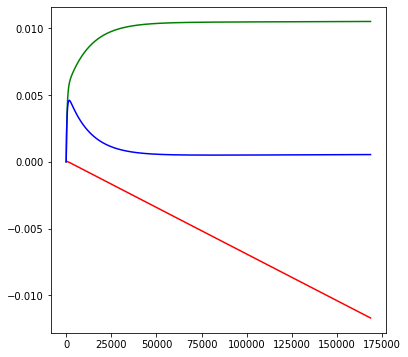

In [203]:
plt.figure(figsize=(6, 6))
plt.plot(count_iter, theta0_iter,  color='r')
plt.plot(count_iter, theta1_iter,  color='g')
plt.plot(count_iter, theta2_iter,  color='b')
plt.show()

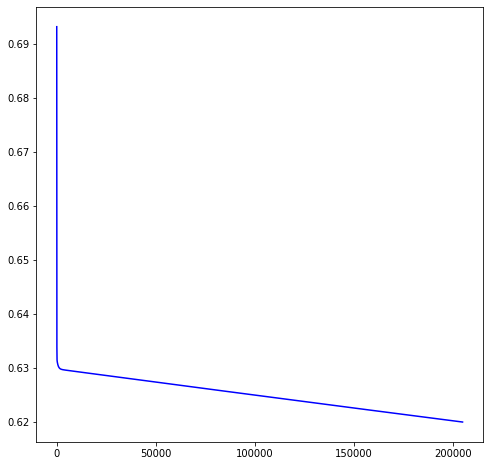

-0.1417967851635284
0.01140990918623422
0.0015538874712417946


In [197]:
plt.figure(figsize=(8, 8))
plt.plot(loss_count, loss_iter,  color='b' )
plt.show()
print(theta0)
print(theta1)
print(theta2)


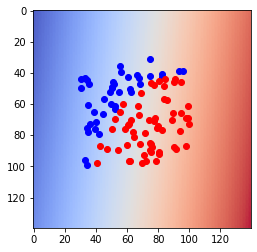

In [195]:
x = np.arange(30, 100, 0.5)
y = np.arange(30, 100, 0.5)

'''
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
'''
t0, t1 = np.meshgrid(x, y)
z = []
for i in y:
    line = []
    for j in x:
        line.append(theta0 + theta1*j +theta2*i)
    z.append(line)

tz = np.array(z)
plt.imshow(tz,cmap='coolwarm',alpha=0.9)
plt.scatter(x_label0, y_label0, alpha=1, c='b')
plt.scatter(x_label1, y_label1, alpha=1, c='r')
#surf = ax.plot_surface(t0,t1,tz,cmap='coolwarm',linewidth=0,antialiased=True)


#ax.scatter3D(x_label0, y_label0, 0, alpha=0.3, c='b')
#ax.scatter3D(x_label1, y_label1, 1, alpha=0.3, c='r')
#plt.scatter(x, z, c = 'g')
plt.show()

